In [993]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [994]:
## loading the dataset
df = pd.read_csv('day.csv')

In [995]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [996]:
df.shape

(730, 16)

In [997]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [998]:
## there are no null values present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [999]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [1000]:
num_cols = list(df.select_dtypes(include= ['int', 'float']).columns) 

In [1001]:
print(num_cols)

['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [1002]:
cat_cols = list(df.select_dtypes(include= ['object']).columns) 

In [1003]:
print(cat_cols)

['dteday']


In [1004]:
len(num_cols)

15

In [1005]:
len(cat_cols)

1

In [1006]:
unique_count_dict = {}
for i  in cat_cols:
    a= df[i].nunique()
    unique_count_dict[i] = a

In [1007]:
unique_count_dict

{'dteday': 730}

### Correlation plot

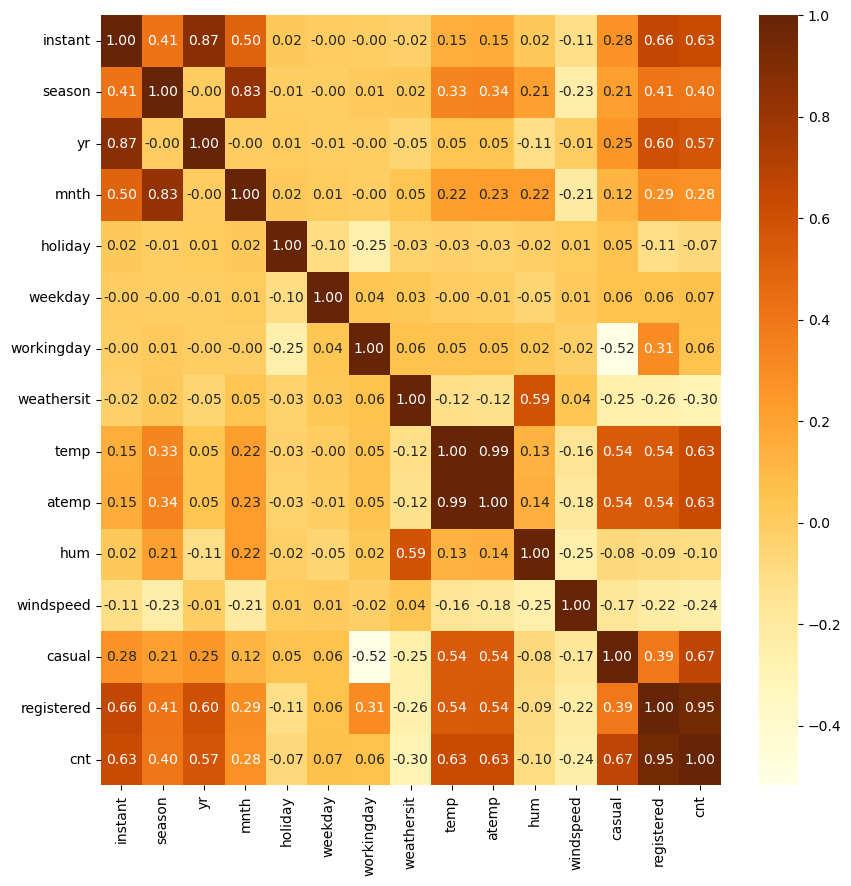

In [1008]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num_cols].corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()

### As we can see there is high correlation between (mnth & season) and (weathersit & hum)

<Axes: xlabel='mnth', ylabel='season'>

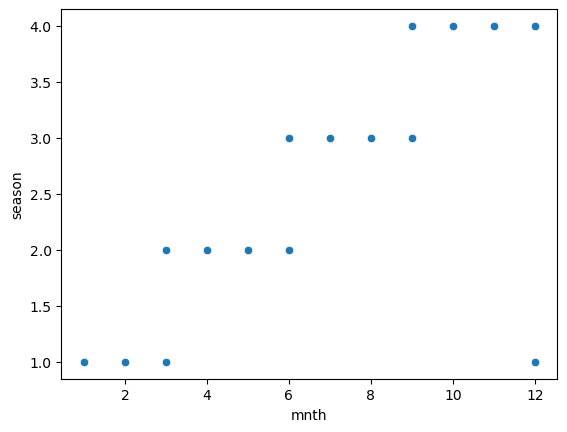

In [1009]:
sns.scatterplot(y = 'season',x = 'mnth',data = df)

<Axes: xlabel='weathersit', ylabel='hum'>

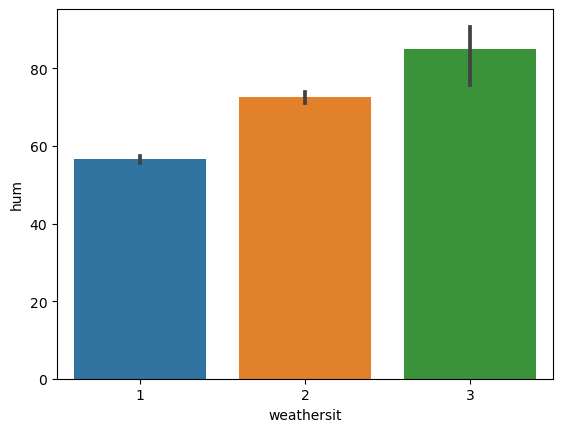

In [1010]:
sns.barplot(x = 'weathersit',y = 'hum',data = df)

In [1011]:
a = df.groupby(by = 'weathersit')['hum'].mean()

In [1012]:
a

weathersit
1    56.559439
2    72.556607
3    84.887248
Name: hum, dtype: float64

<Axes: >

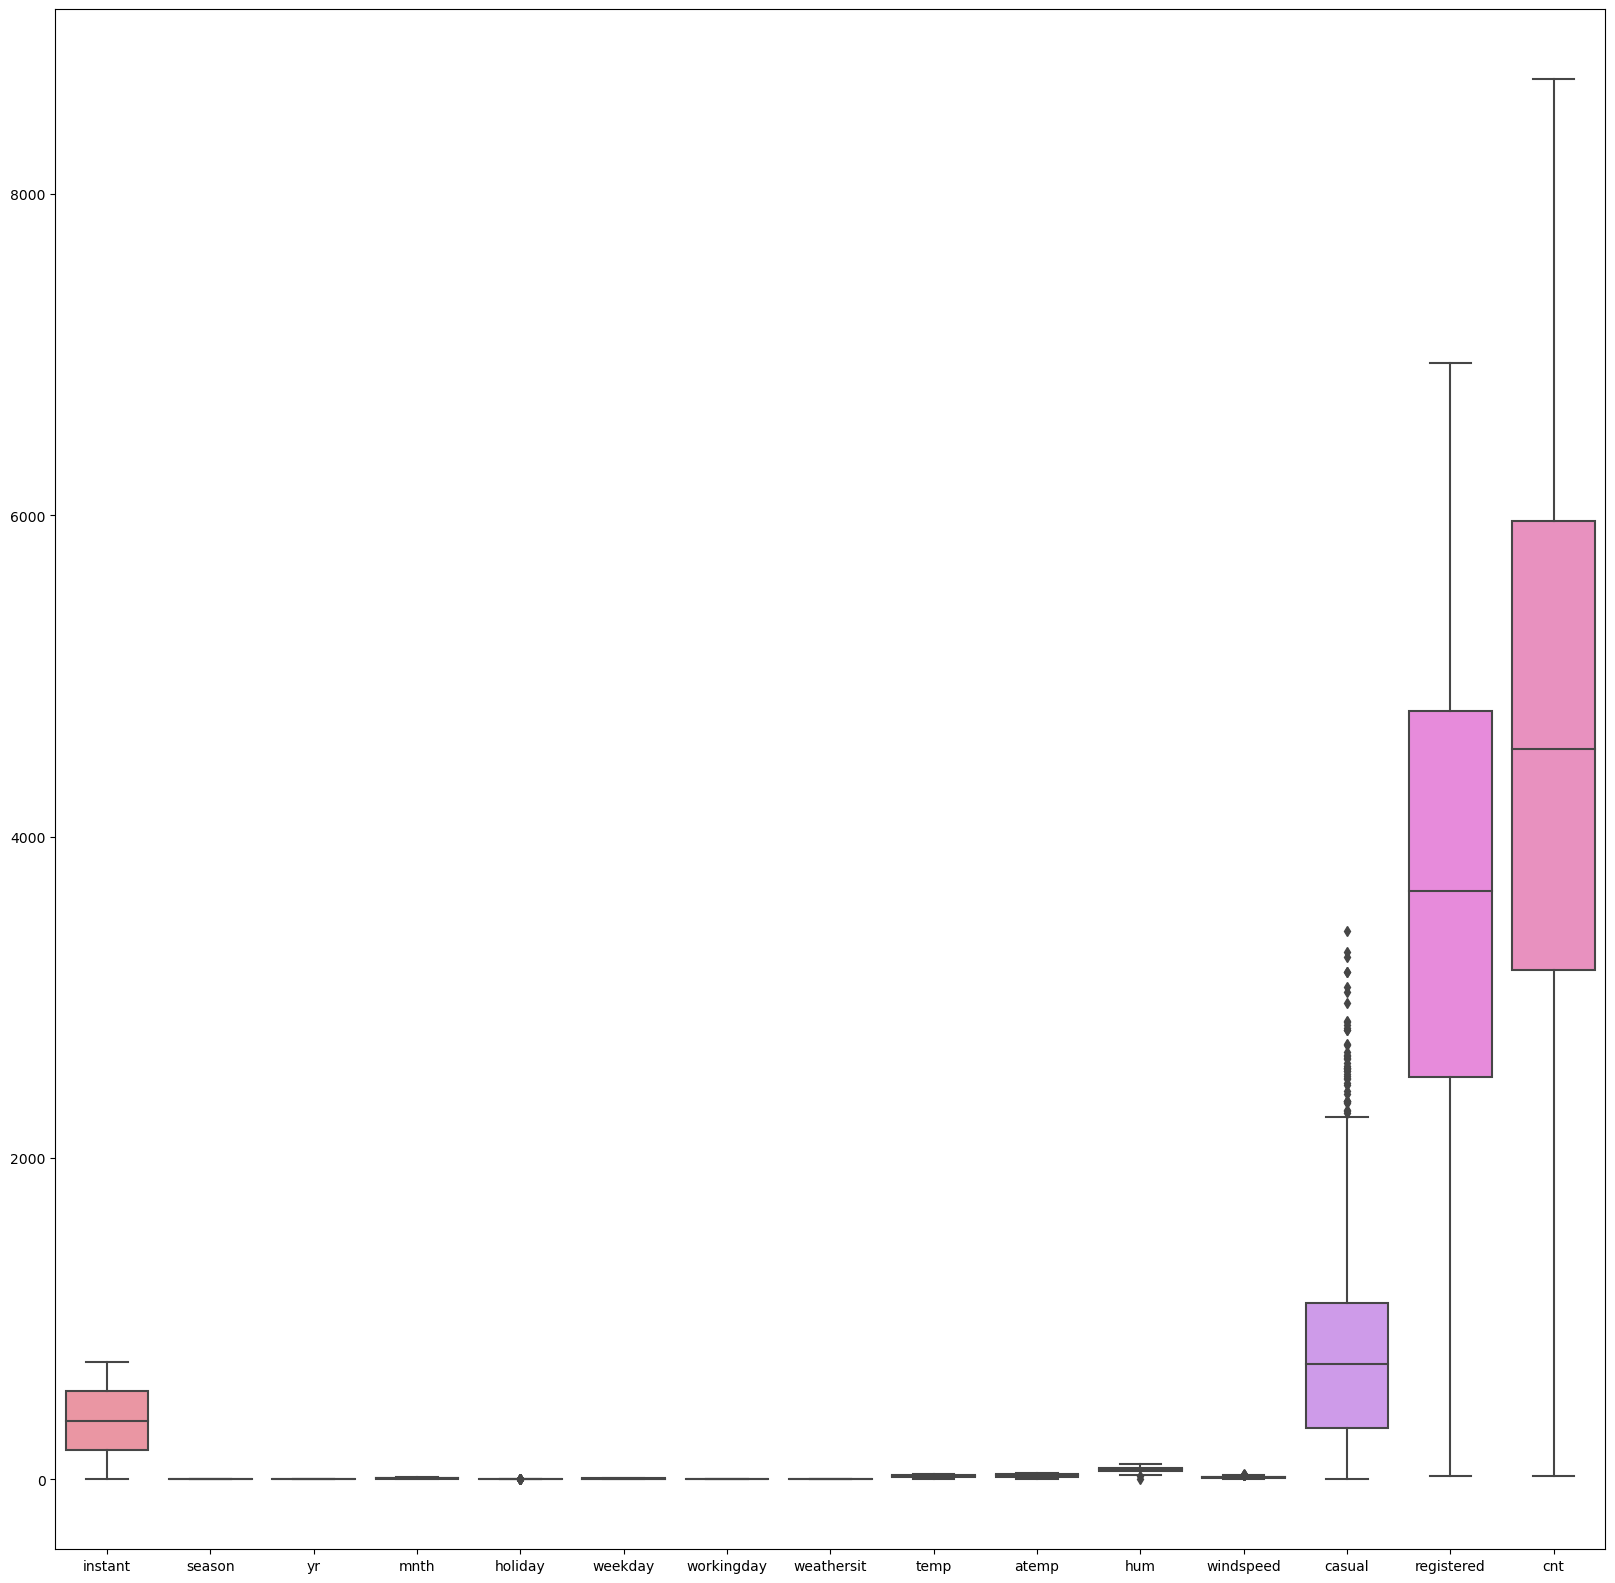

In [1013]:
plt.figure(figsize=(20,20))
sns.boxplot(data = df, orient = 'v')

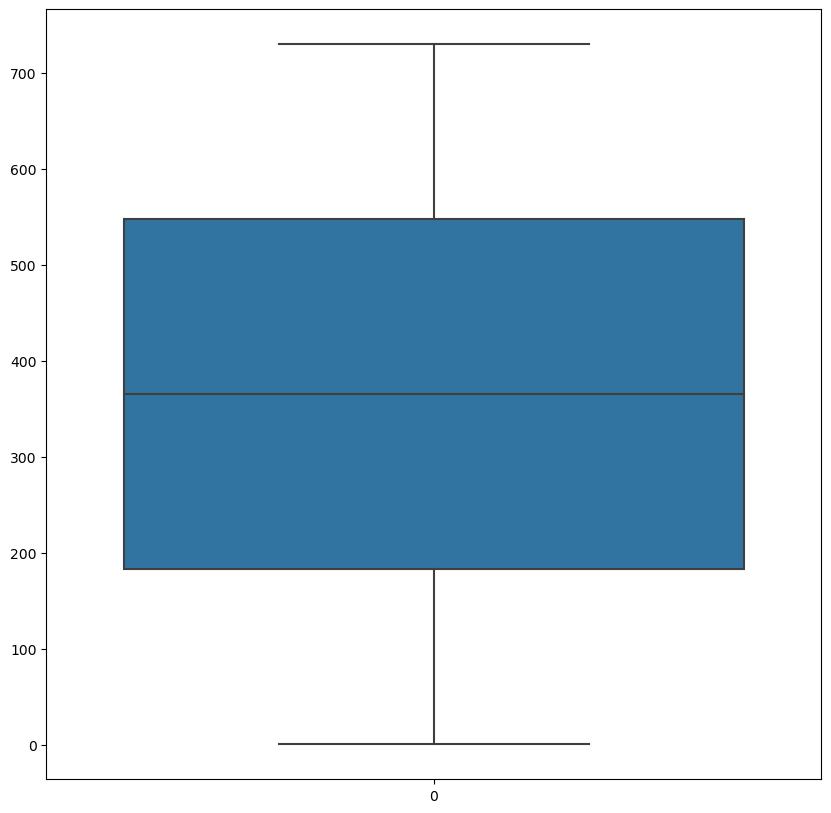

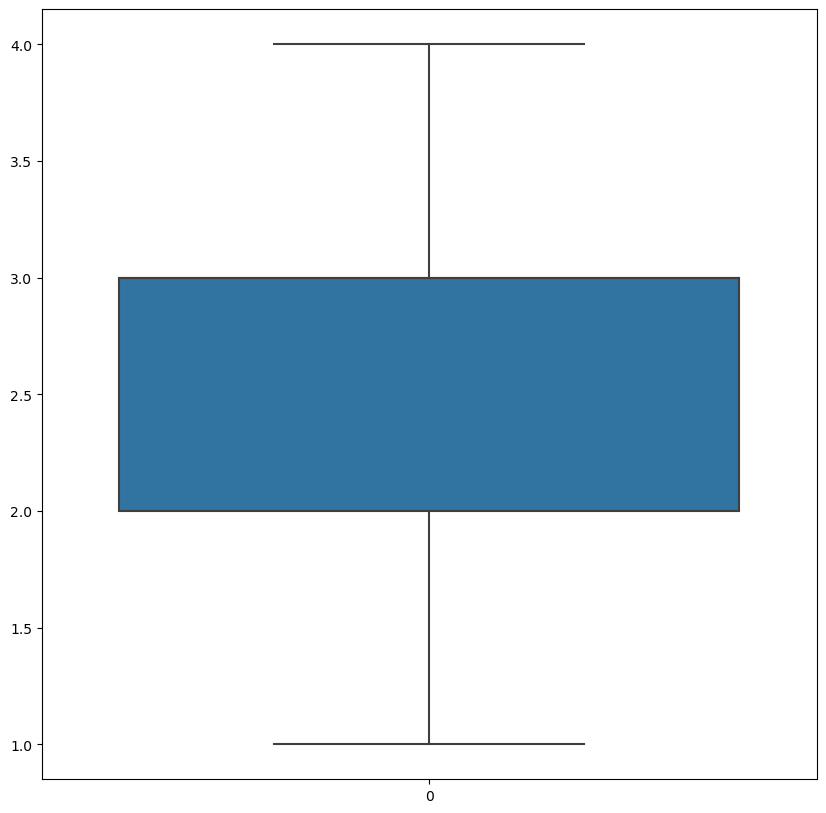

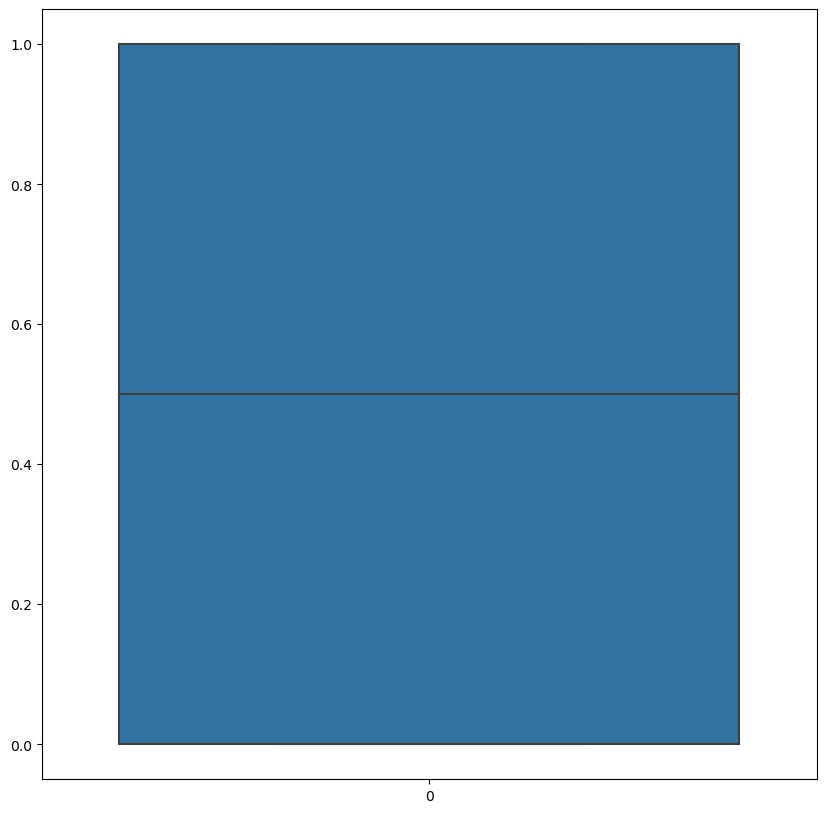

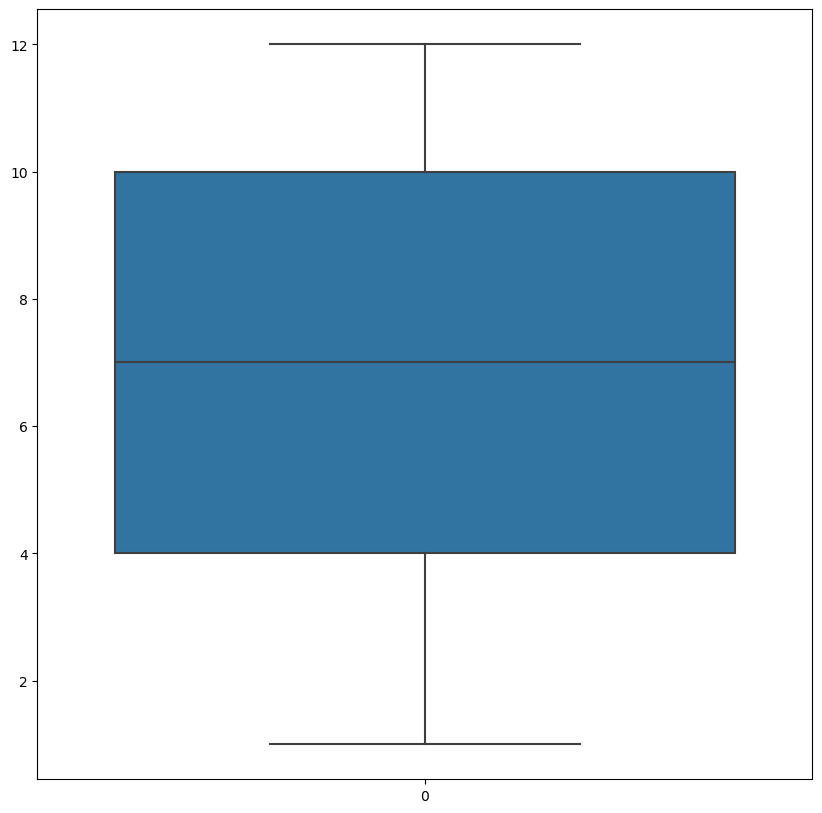

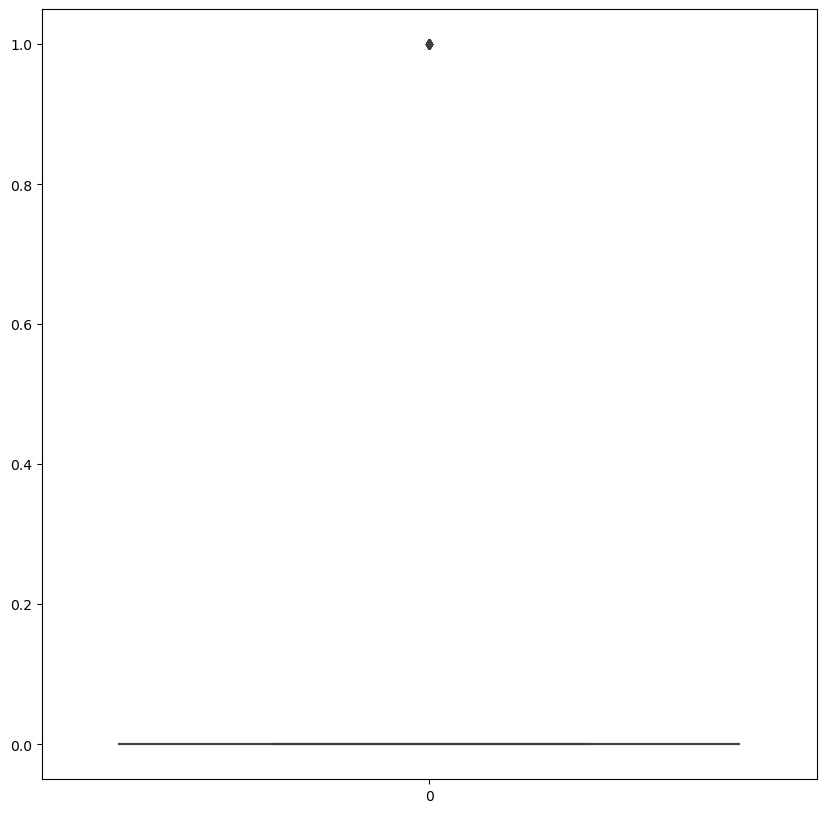

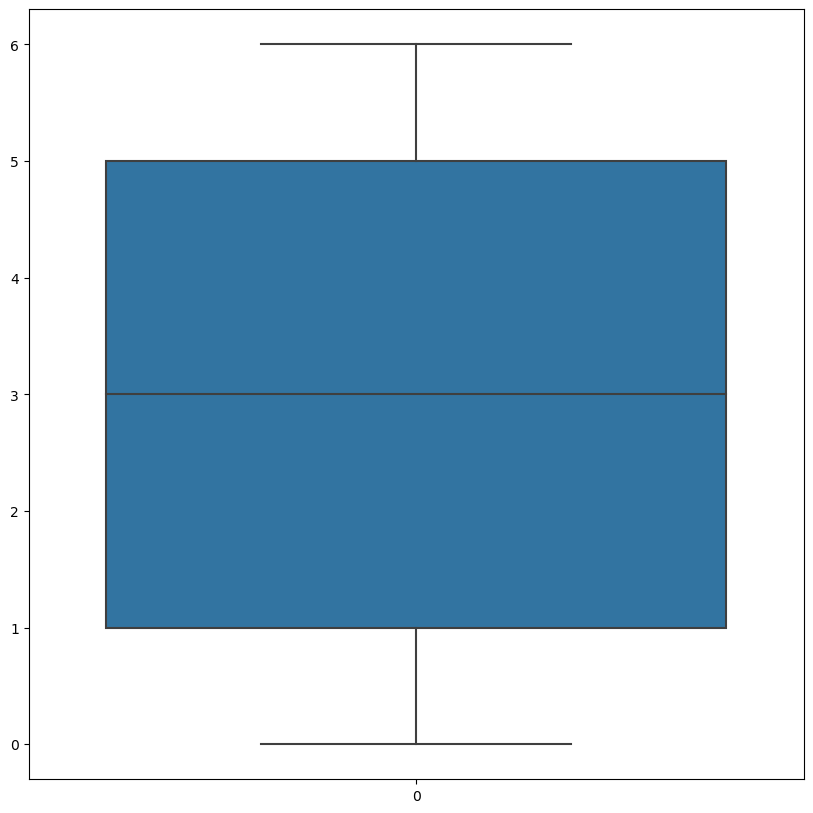

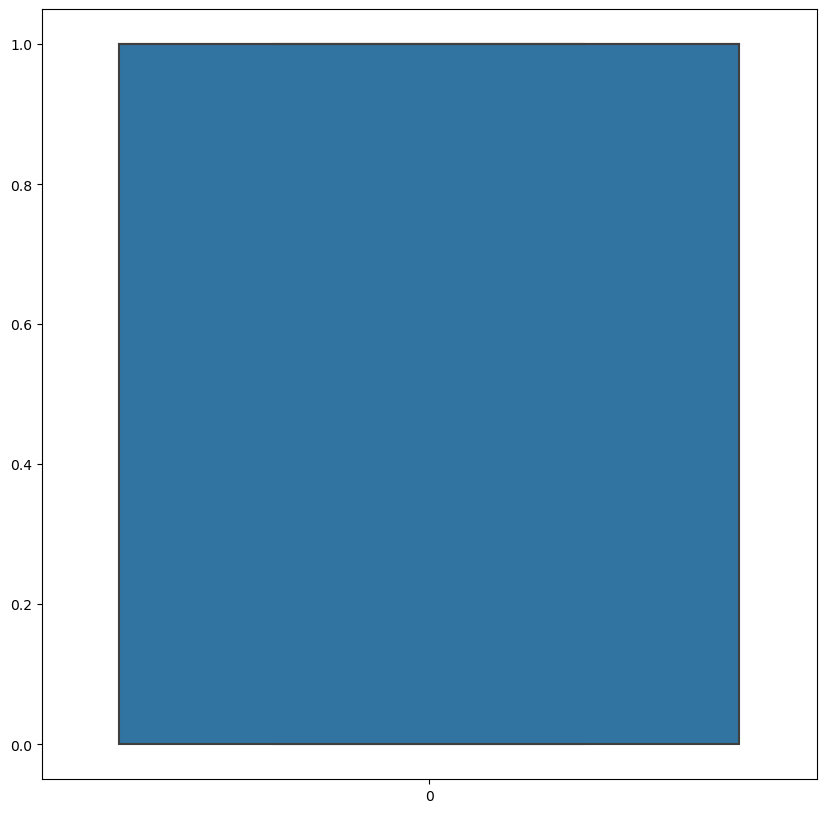

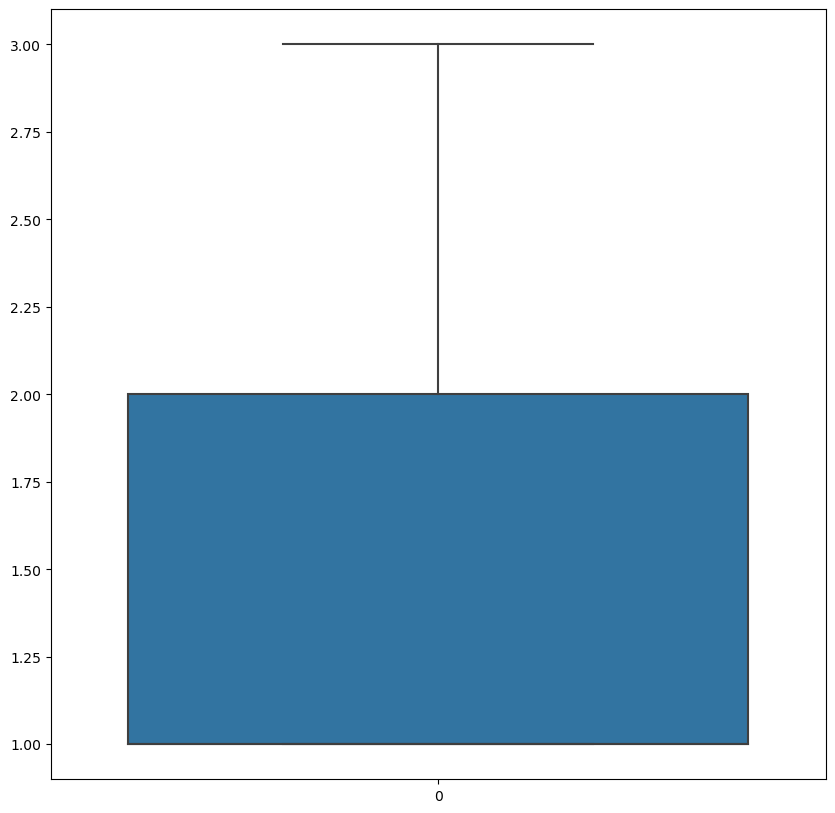

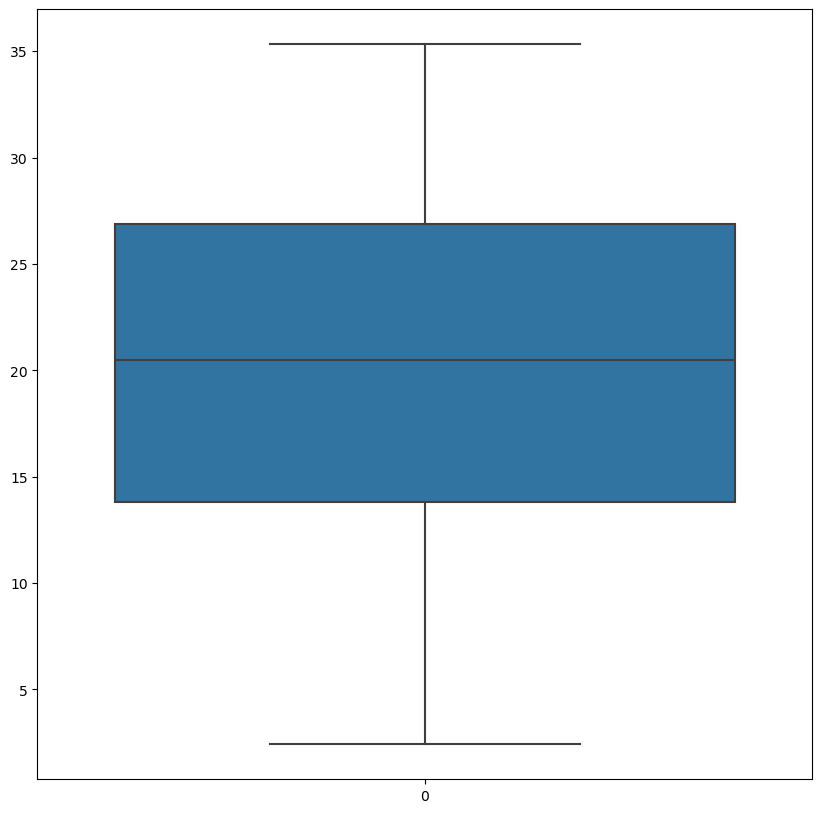

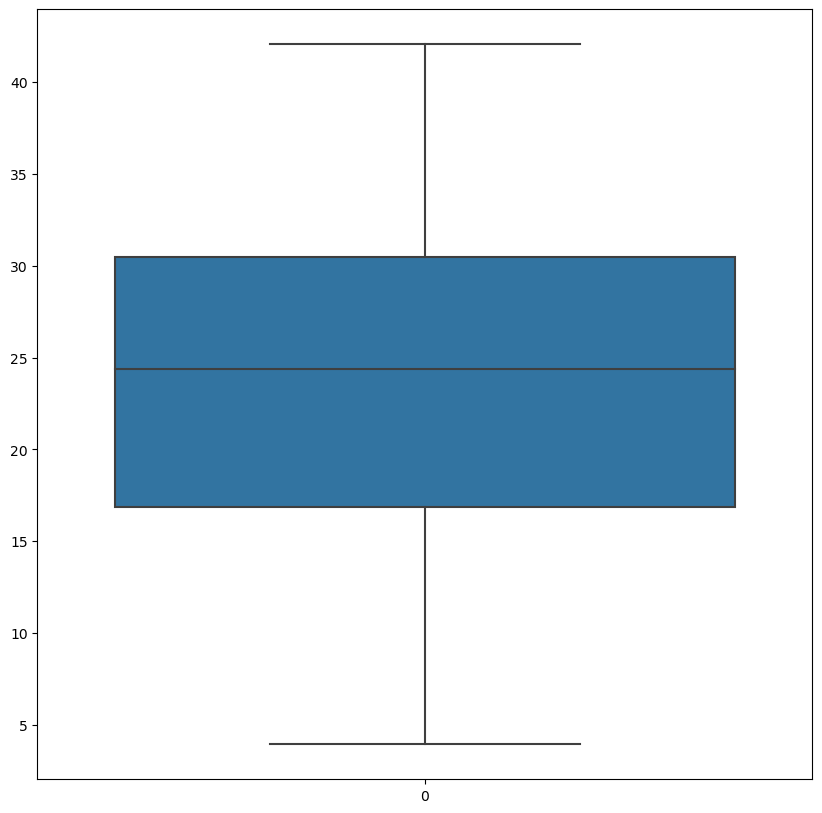

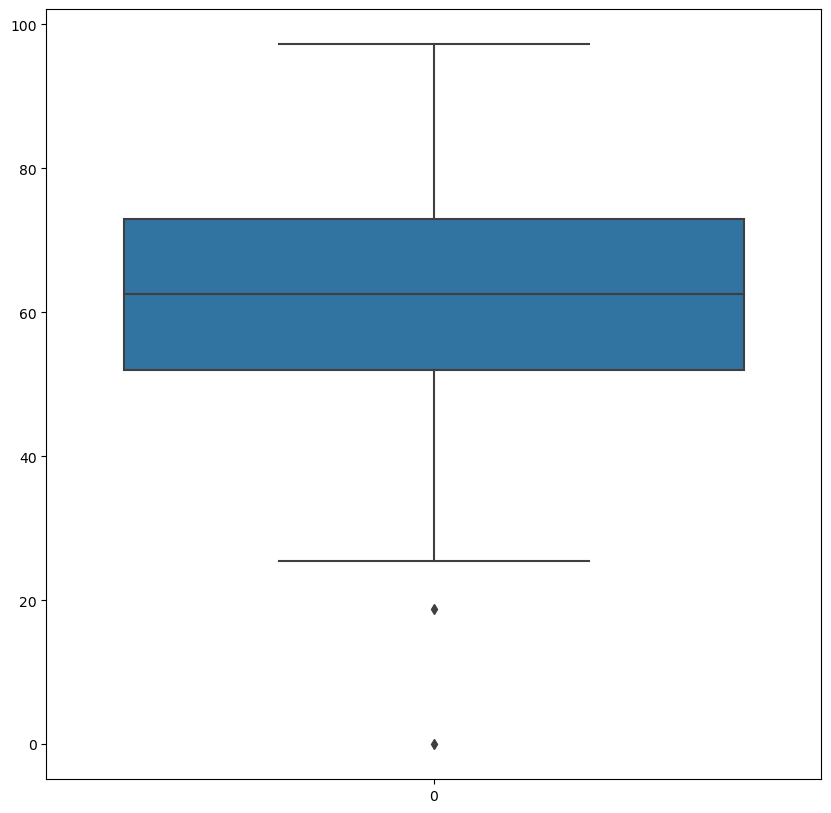

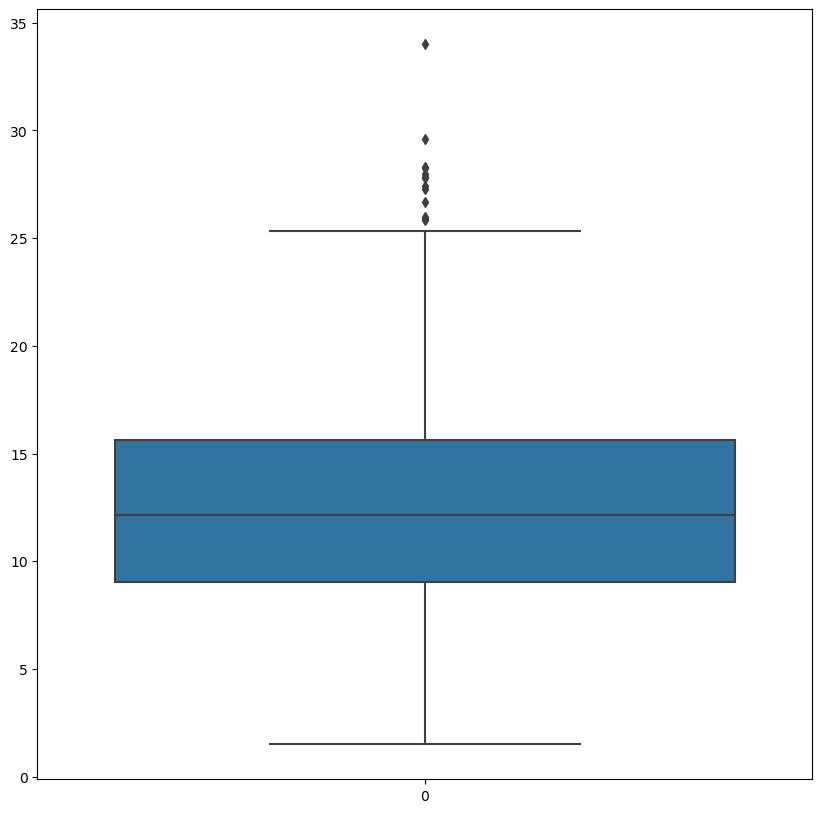

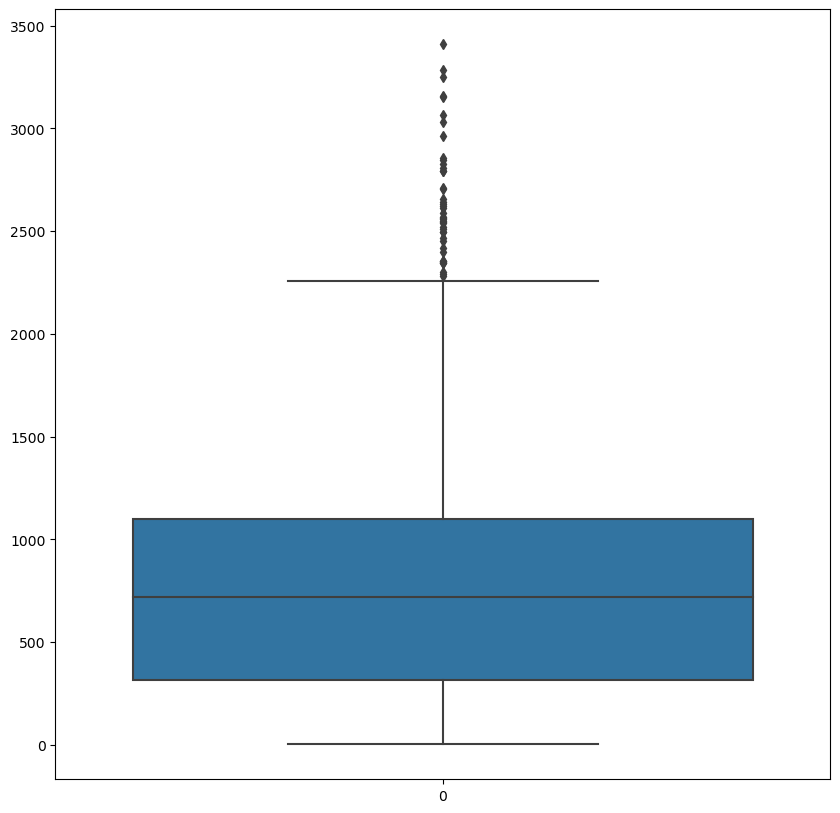

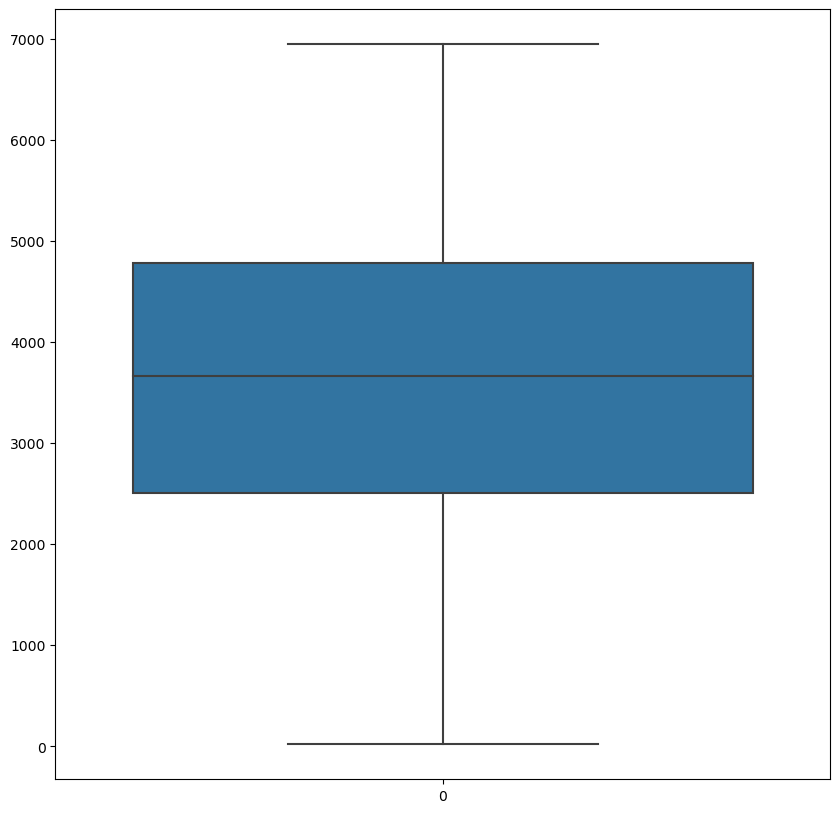

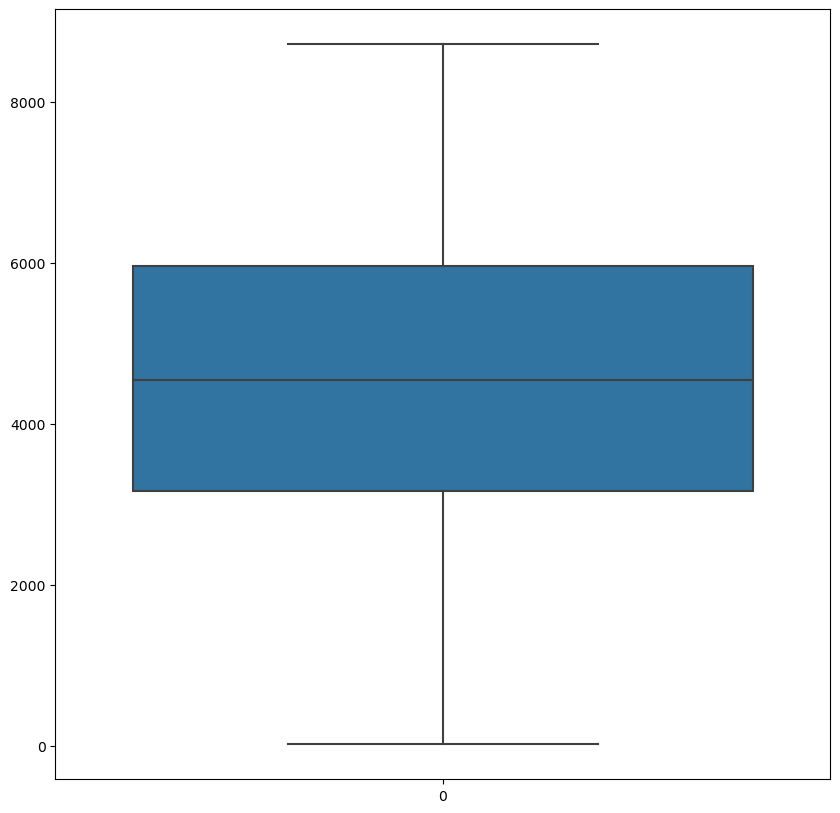

In [1014]:
for i in num_cols:
    plt.figure(figsize=(10,10))
    sns.boxplot(data = df[i], orient = 'v')
    plt.show()

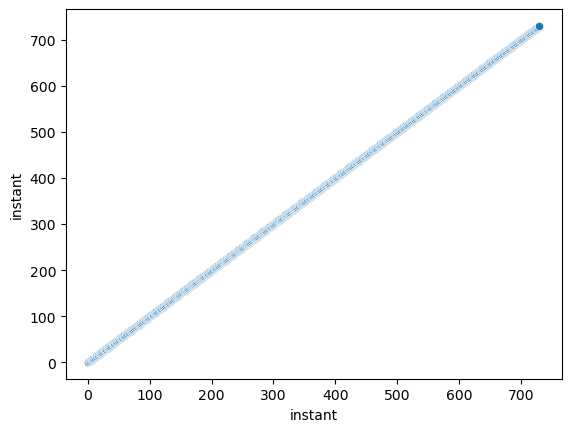

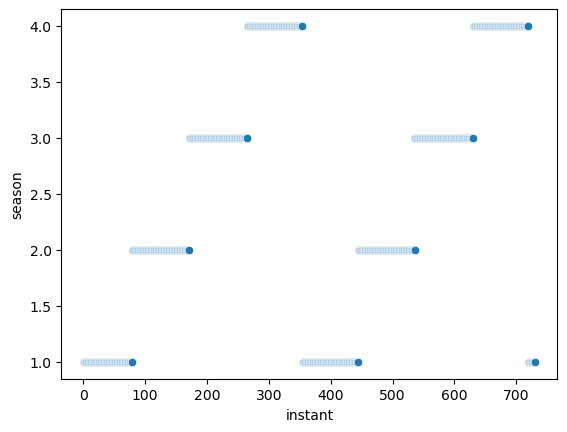

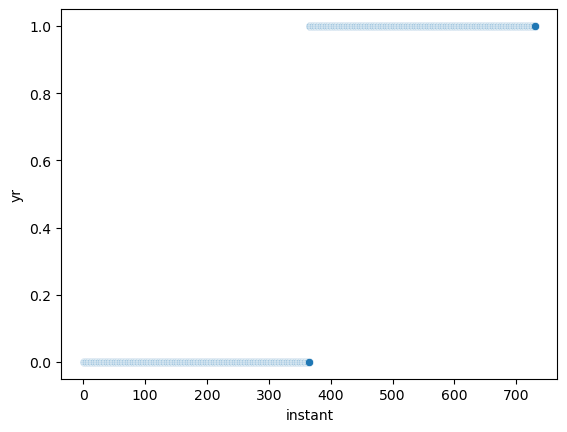

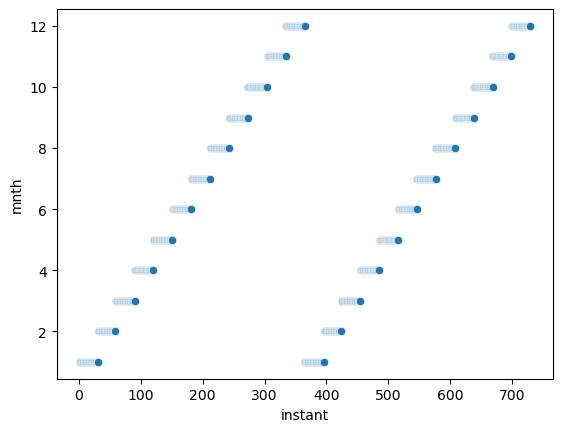

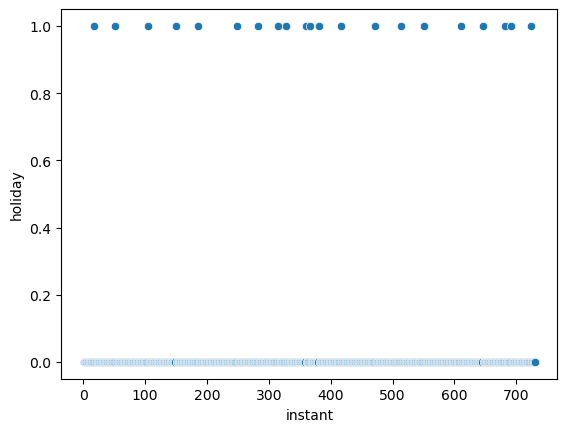

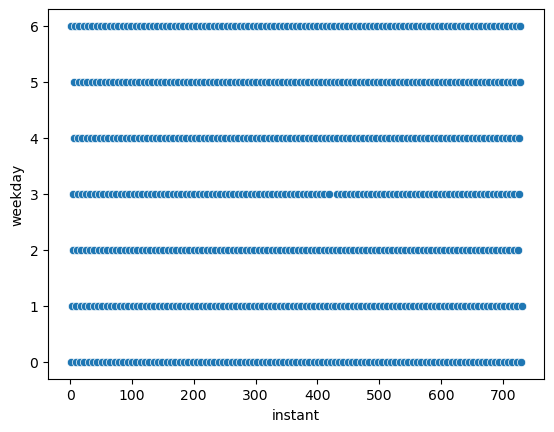

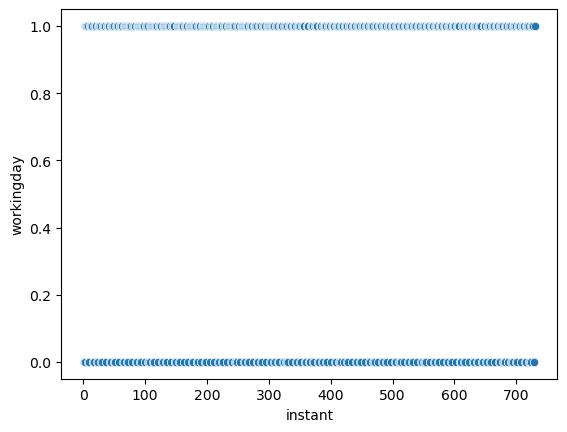

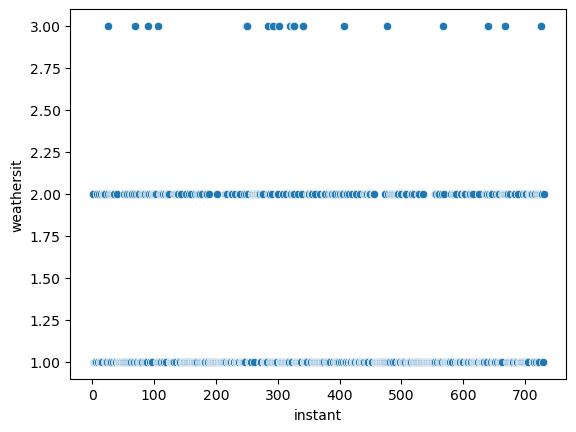

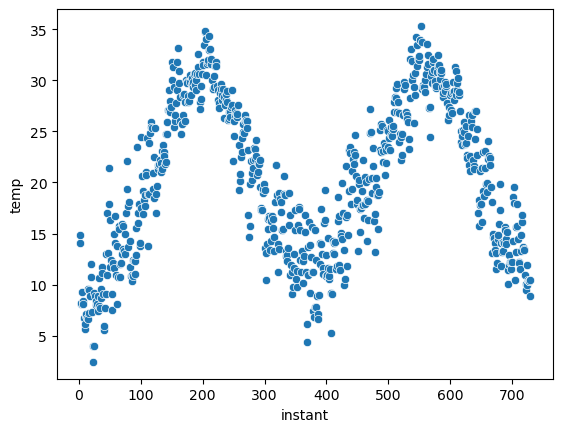

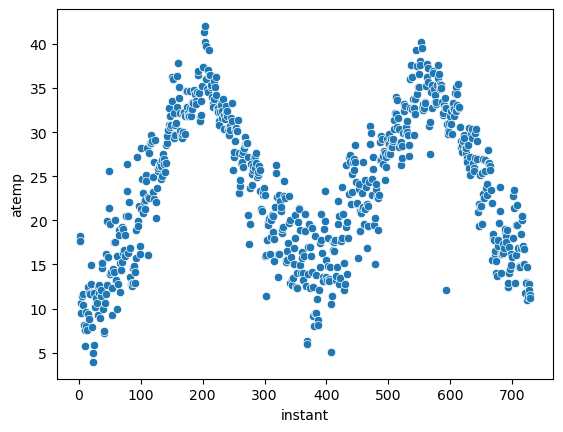

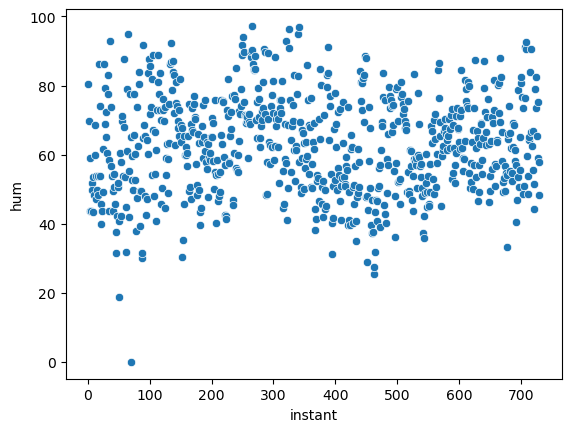

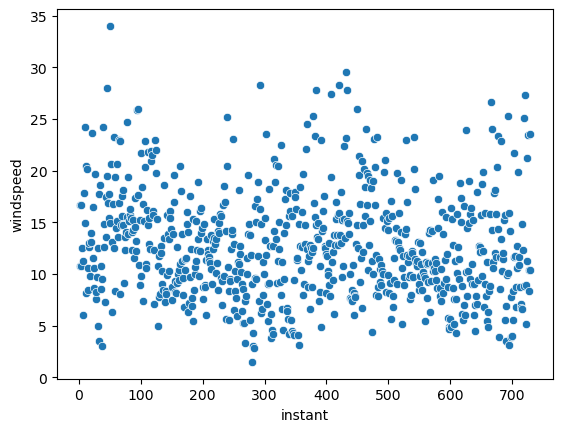

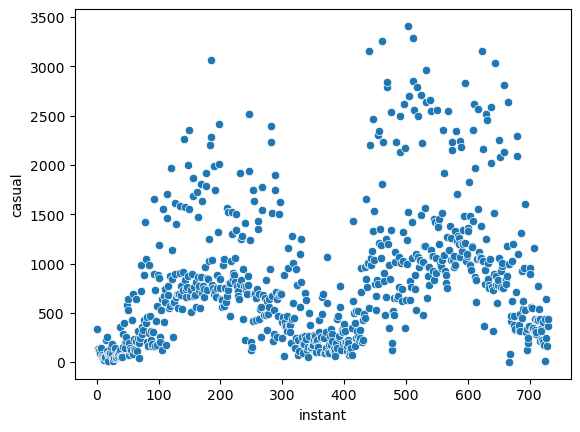

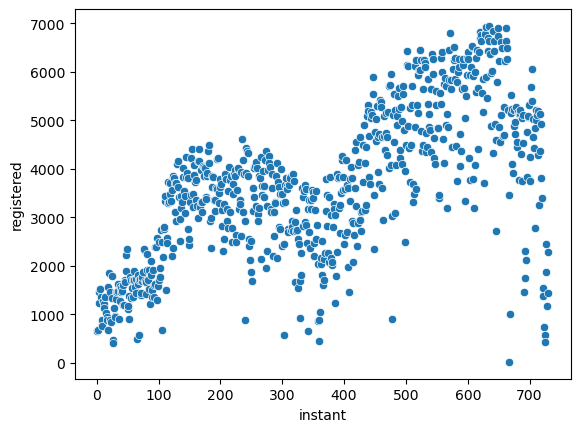

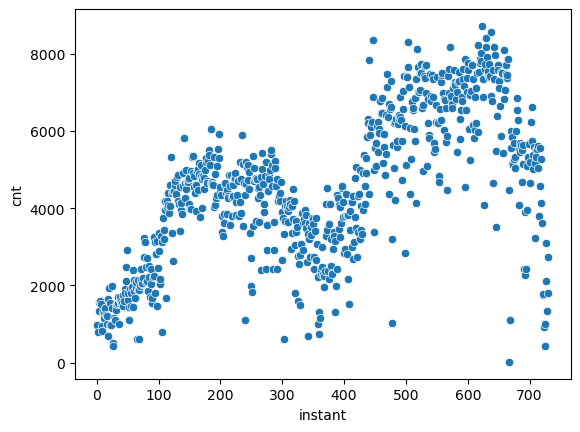

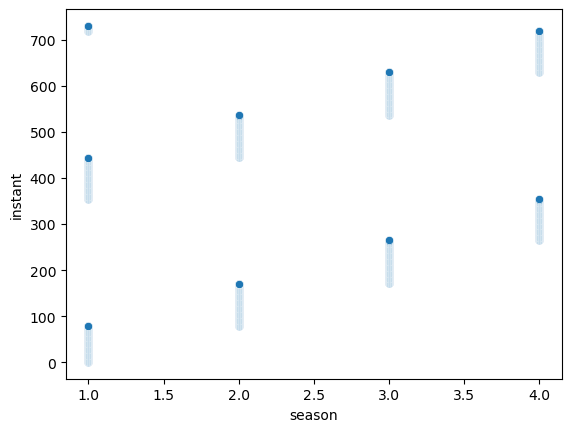

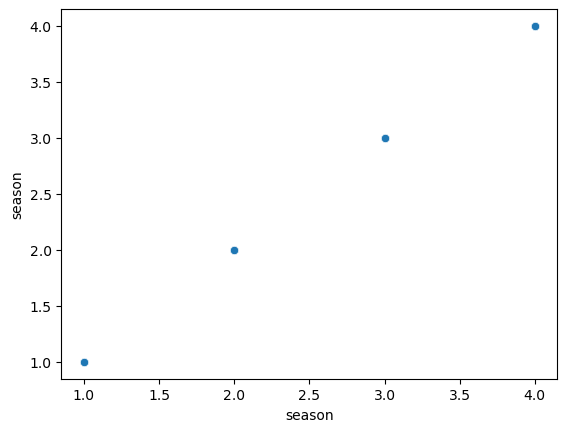

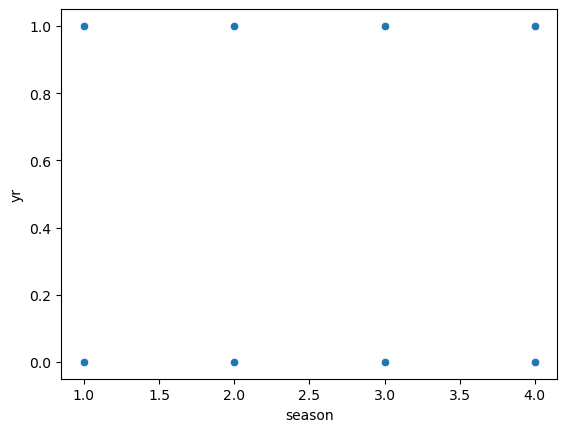

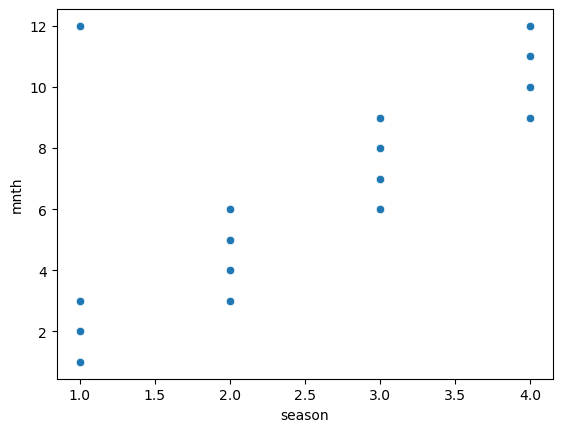

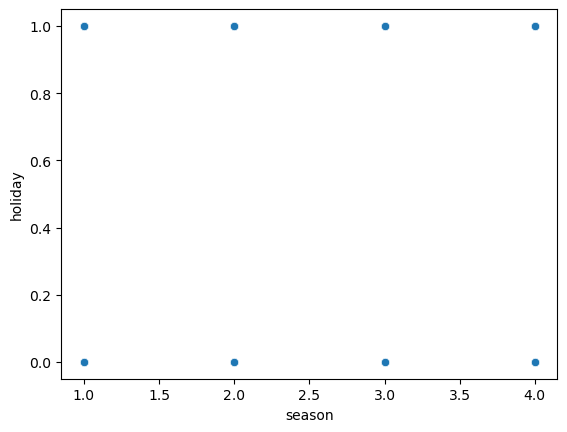

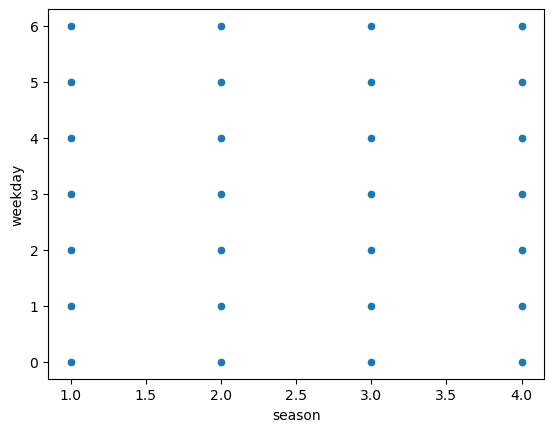

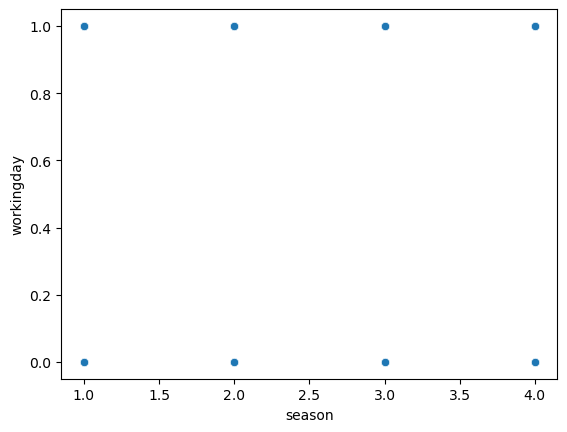

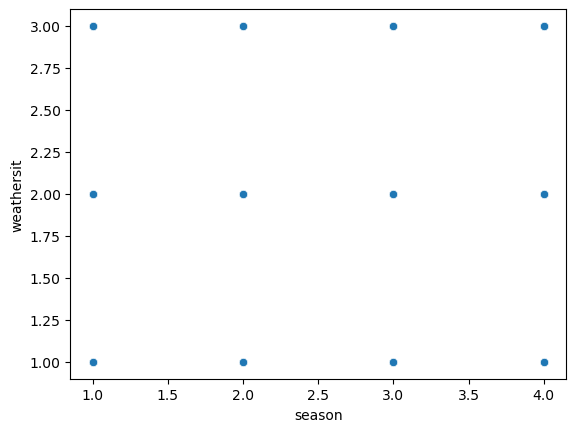

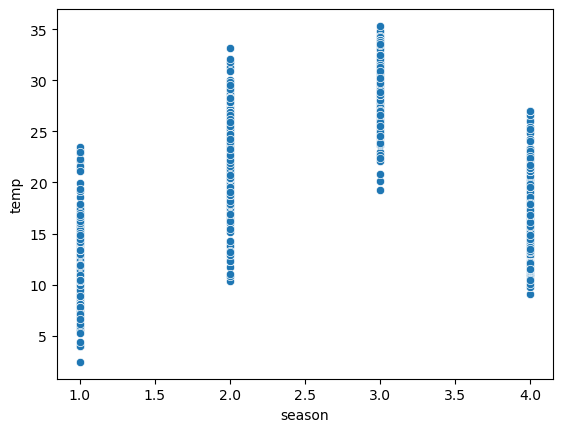

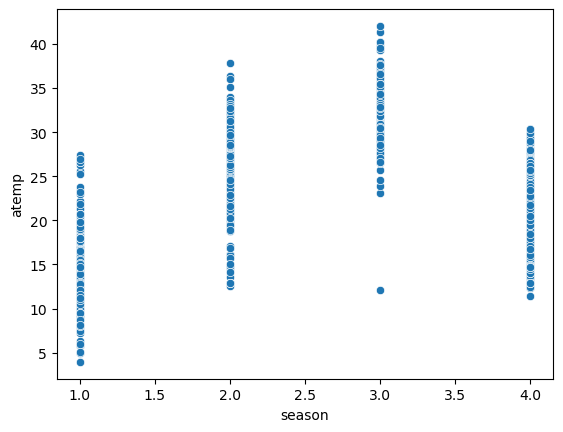

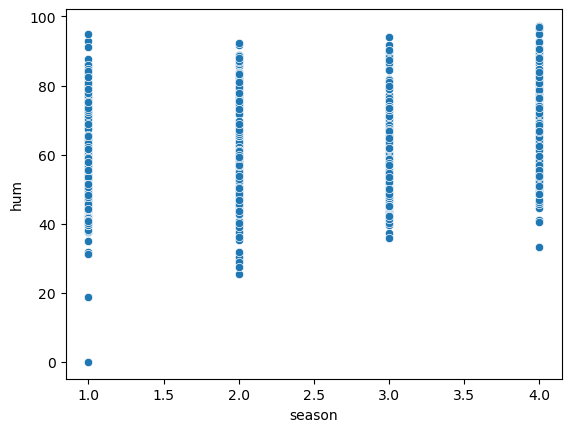

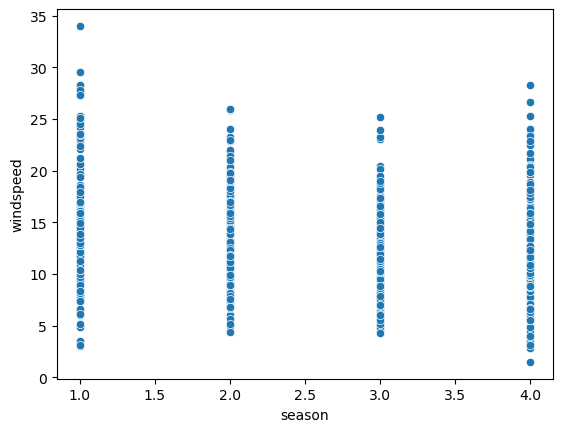

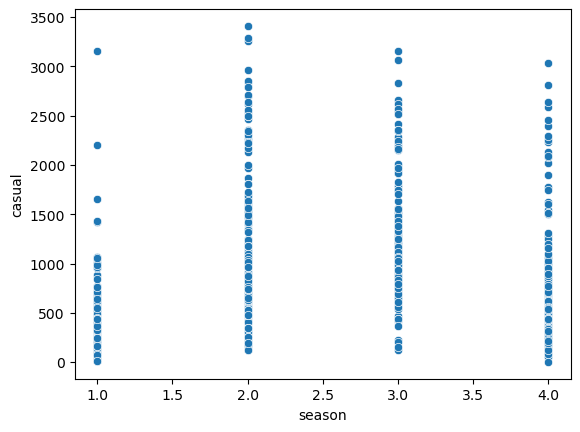

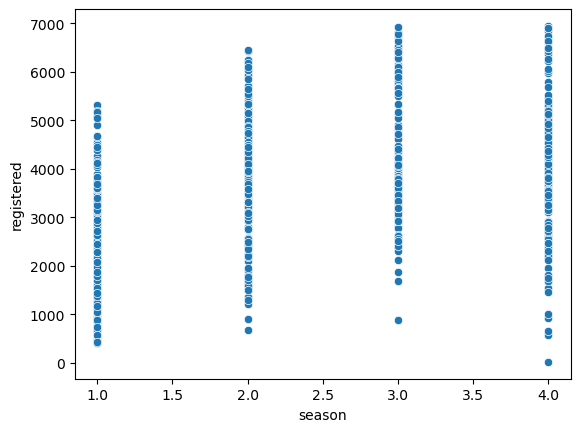

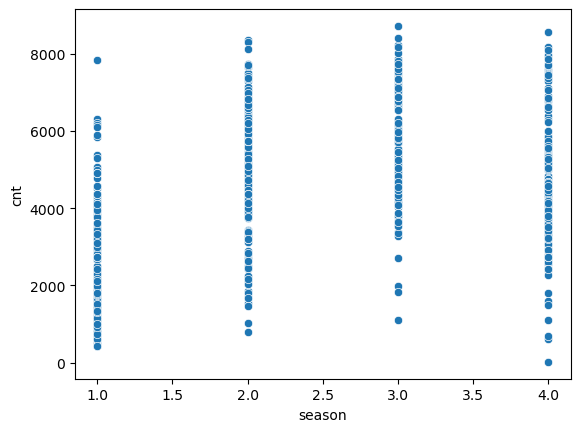

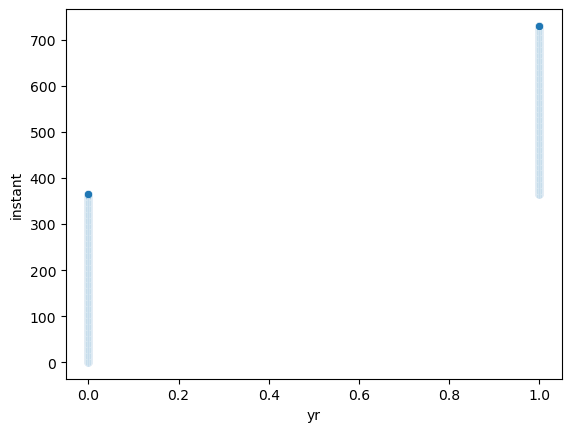

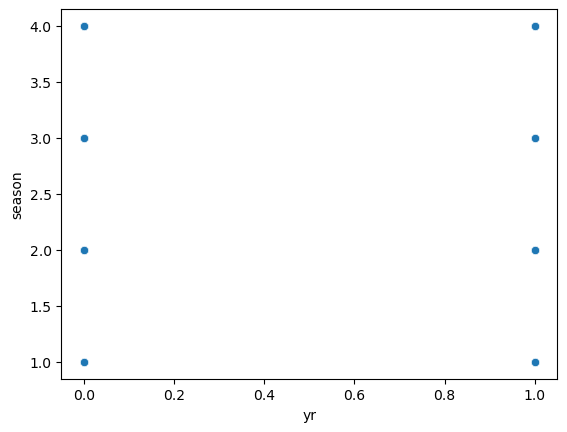

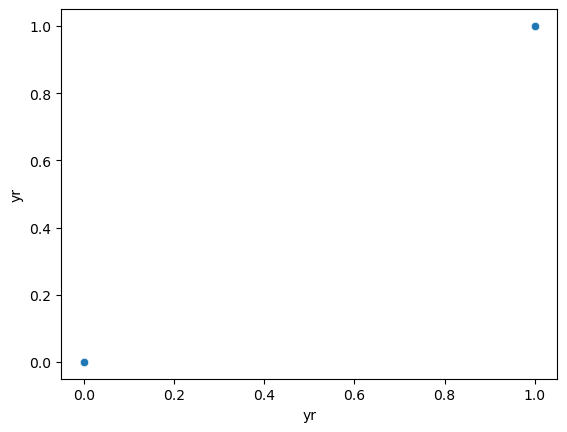

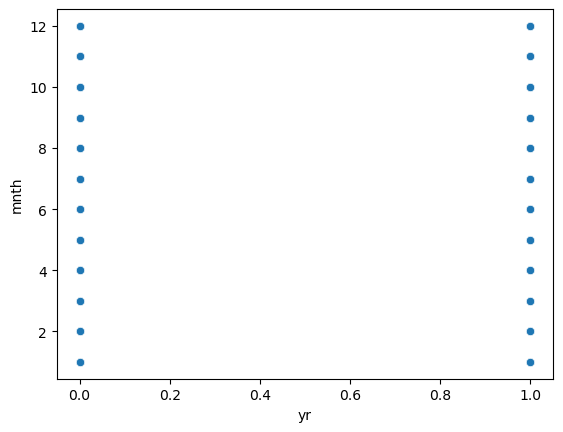

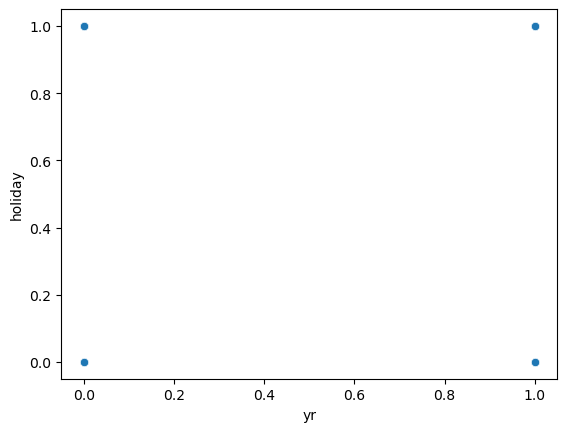

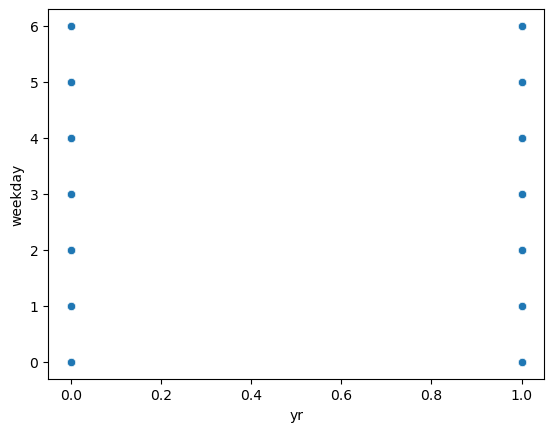

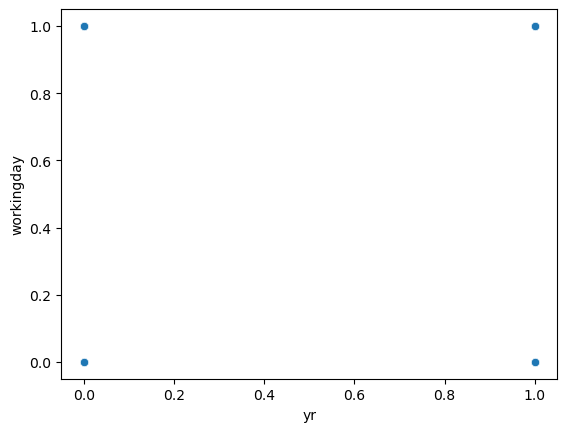

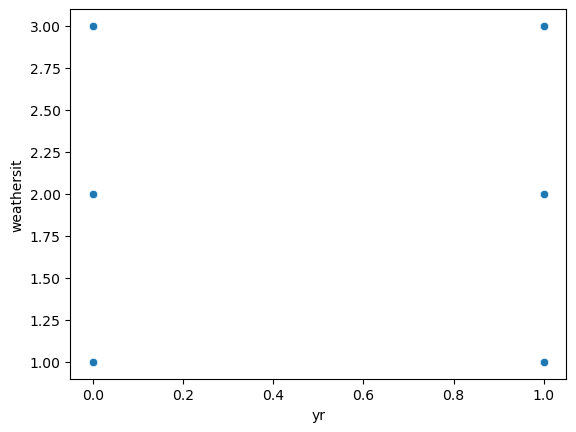

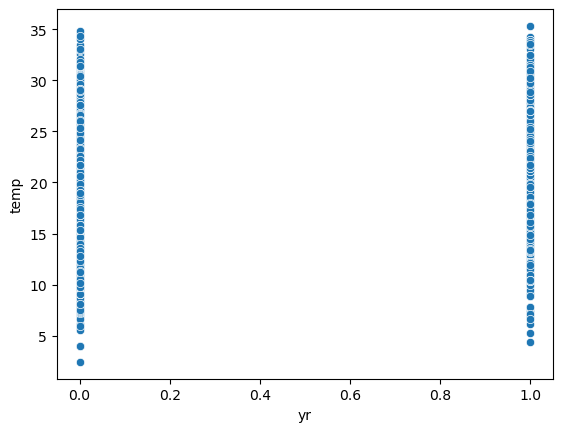

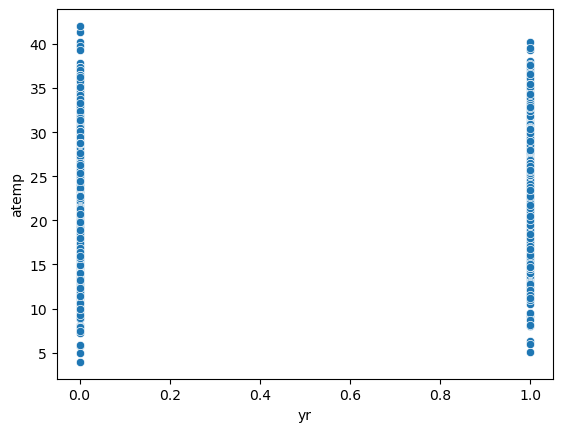

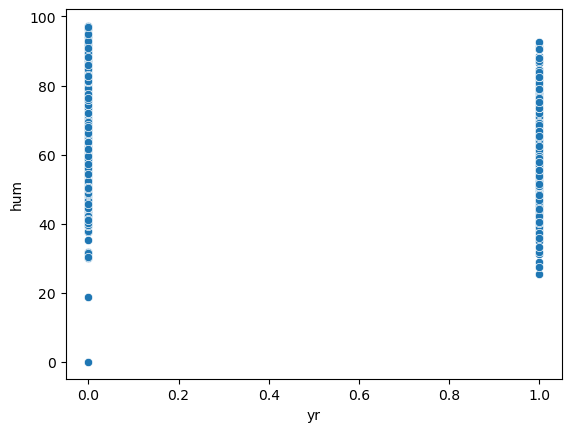

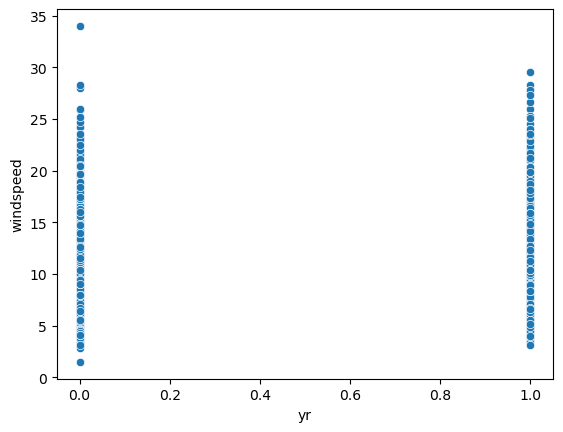

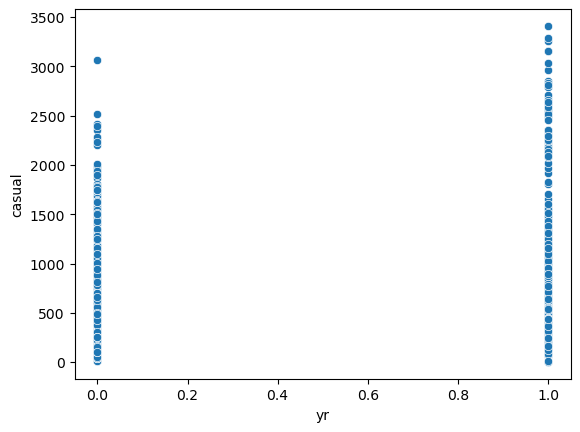

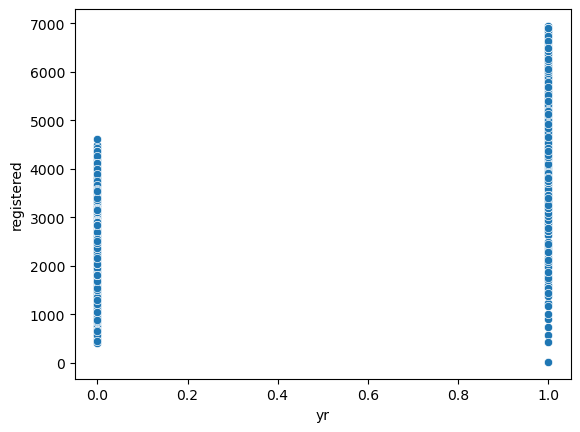

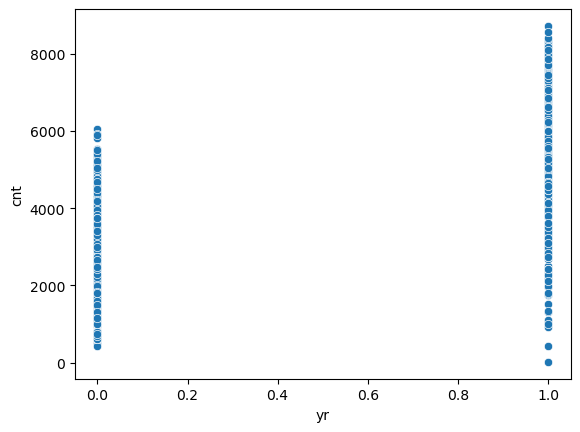

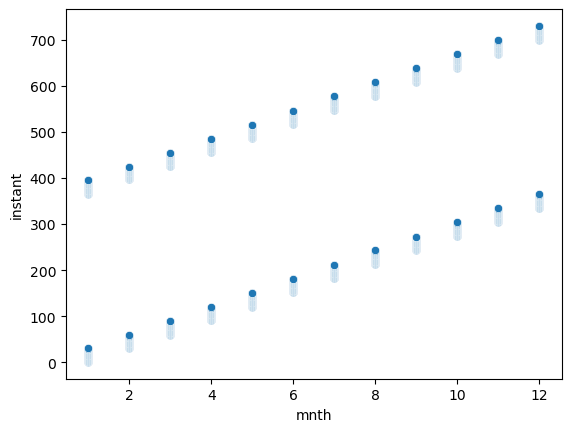

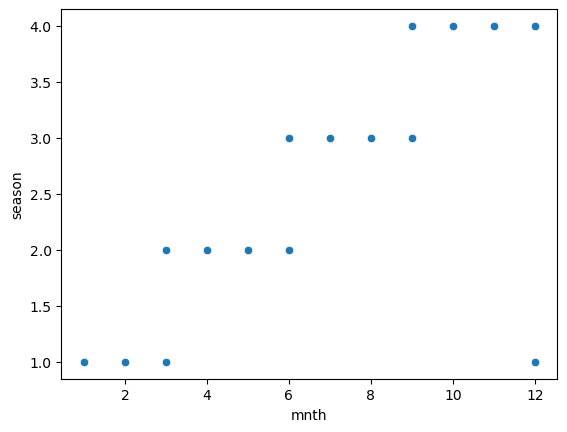

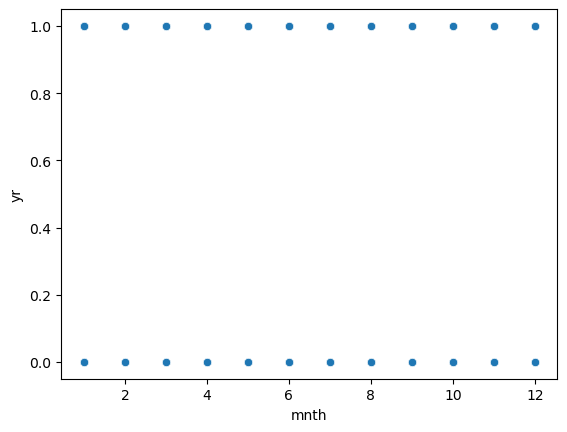

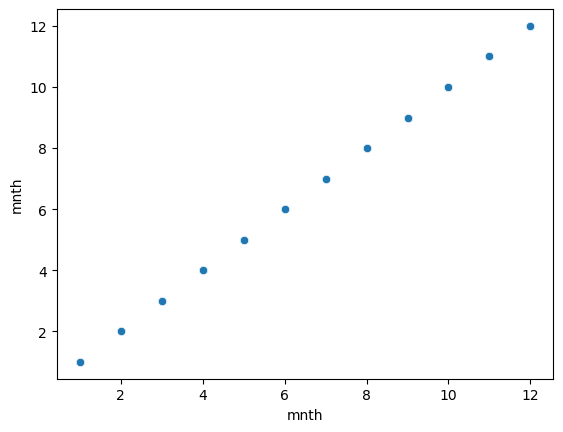

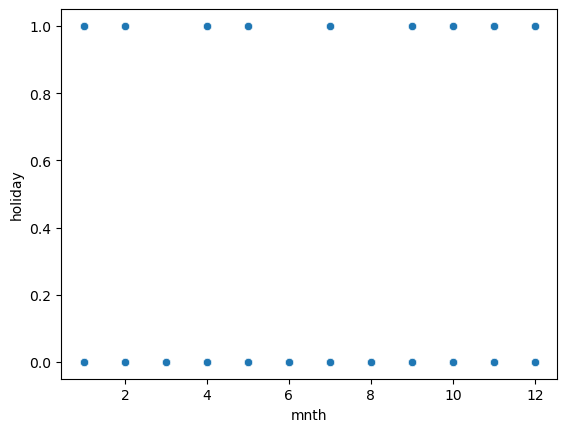

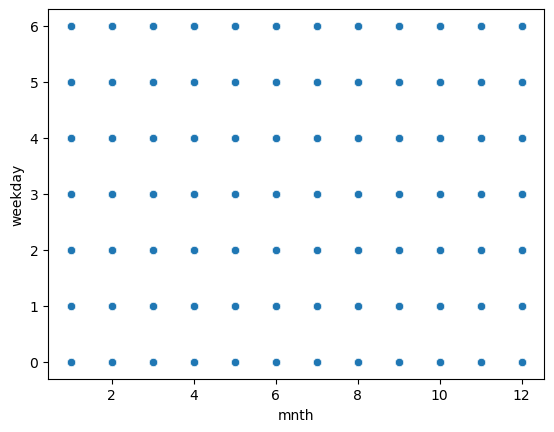

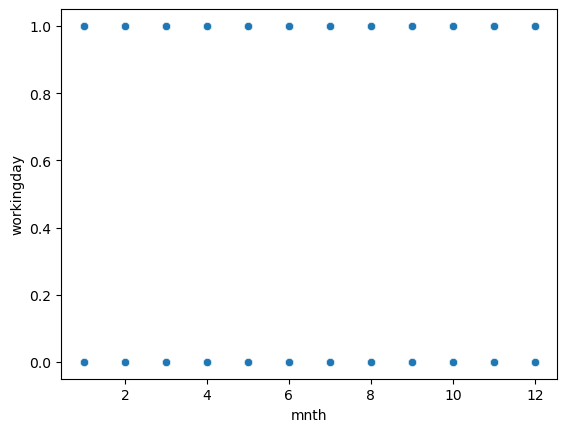

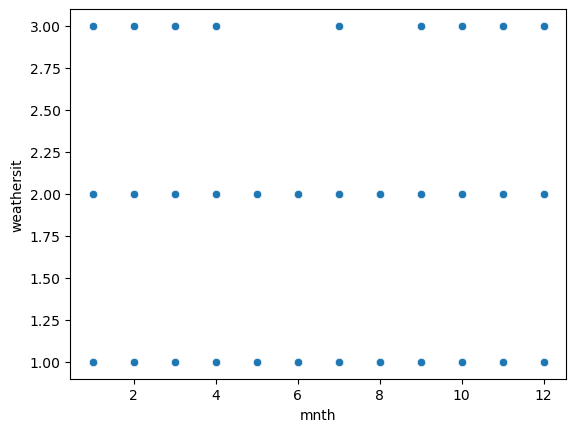

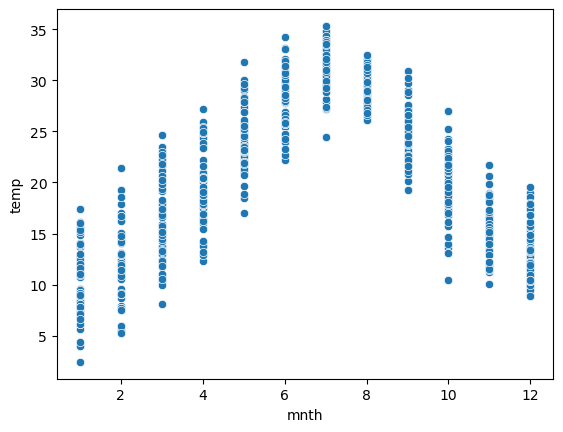

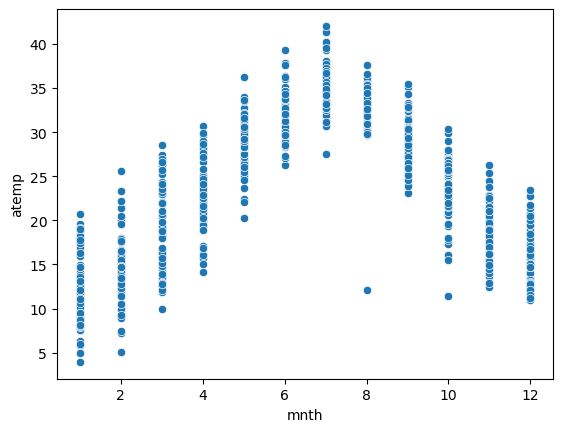

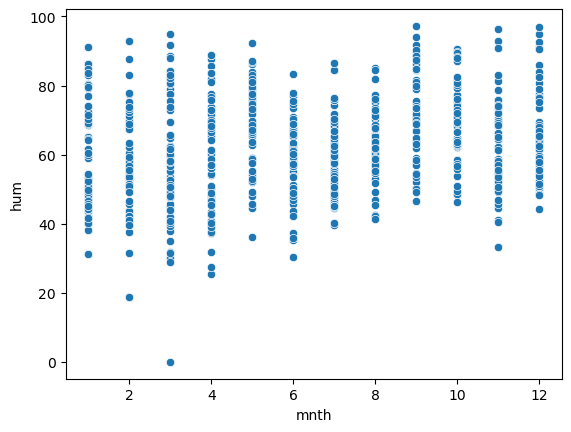

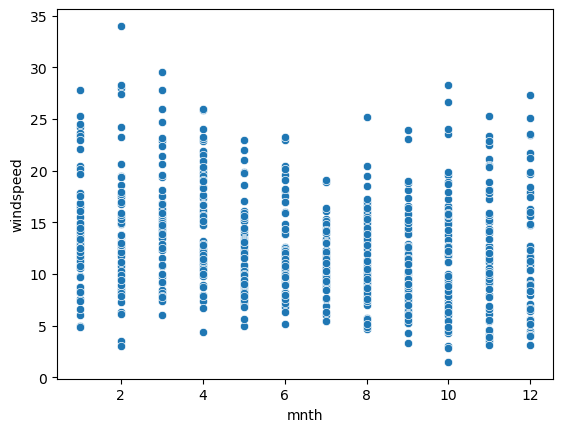

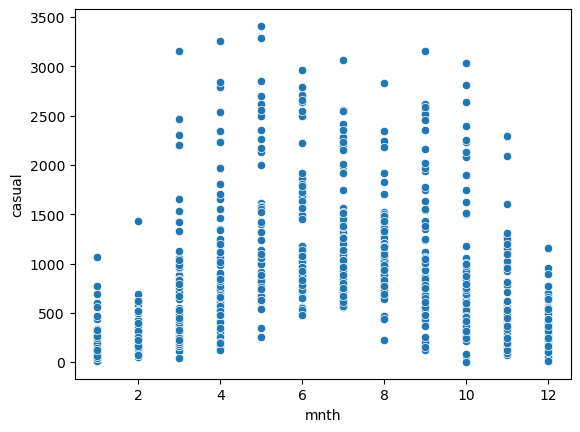

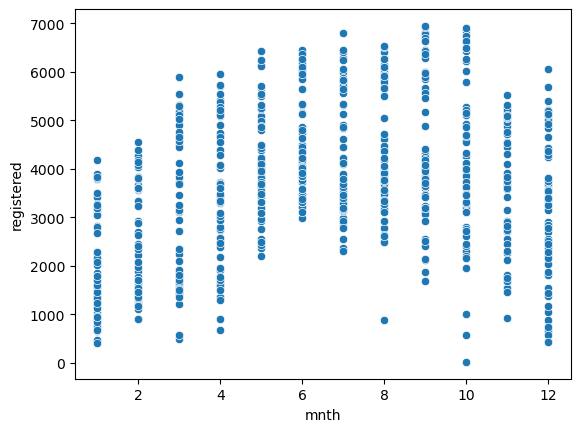

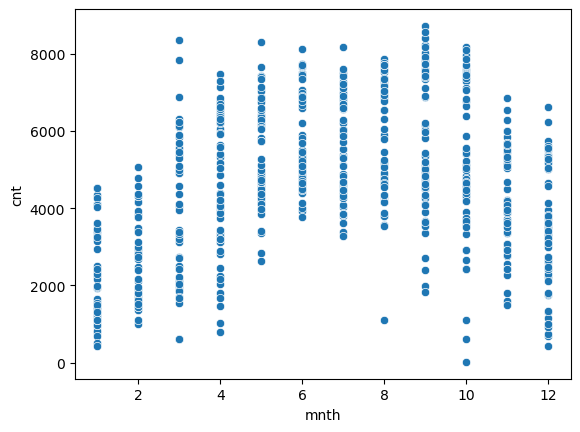

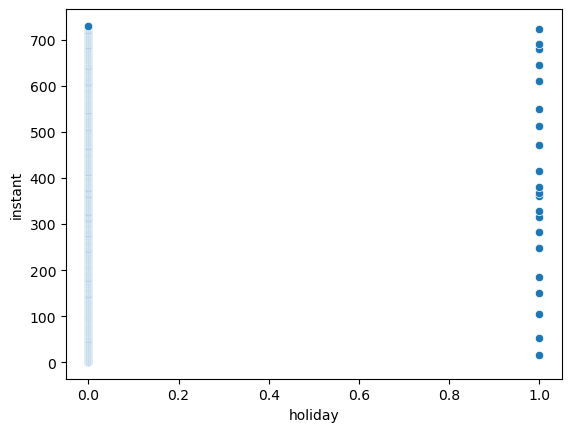

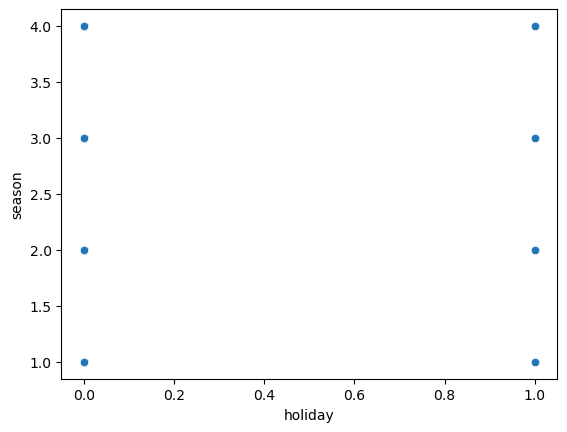

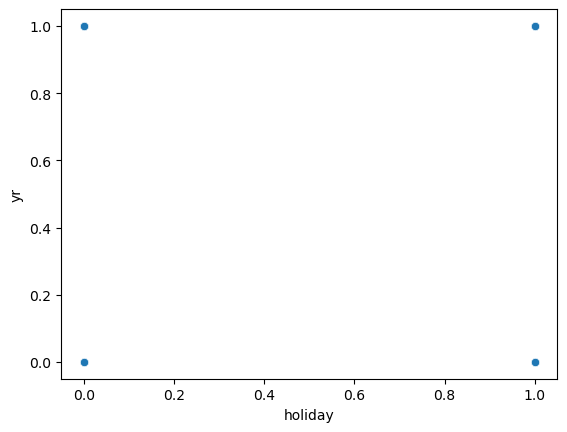

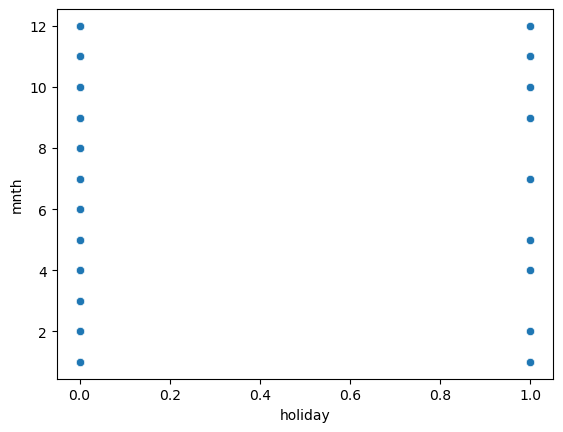

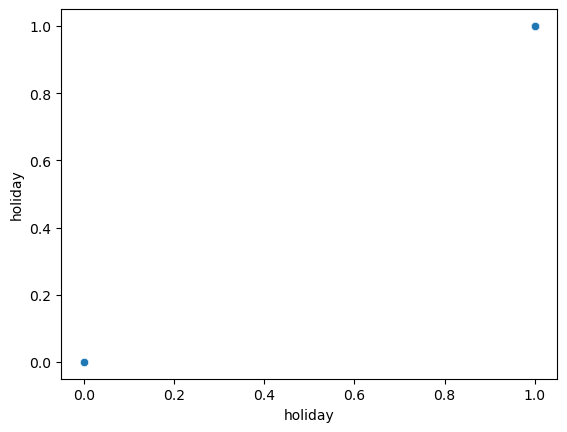

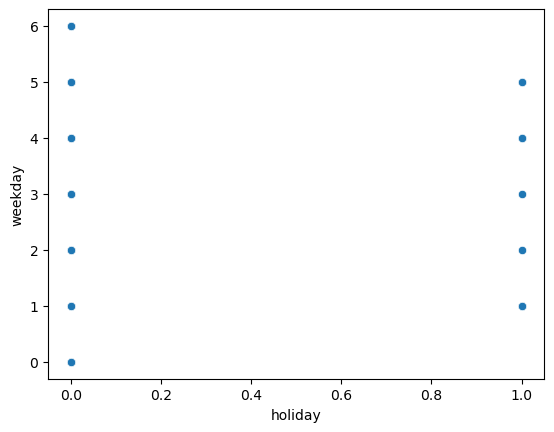

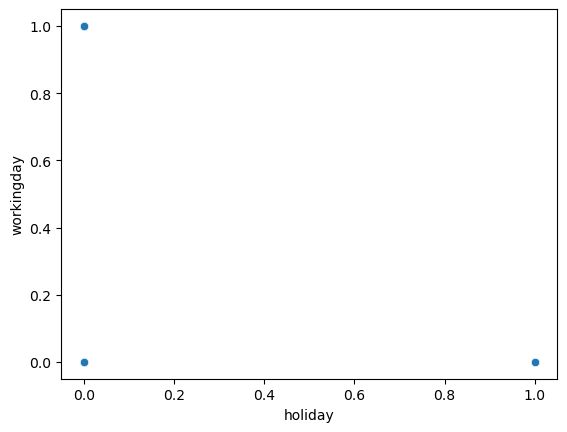

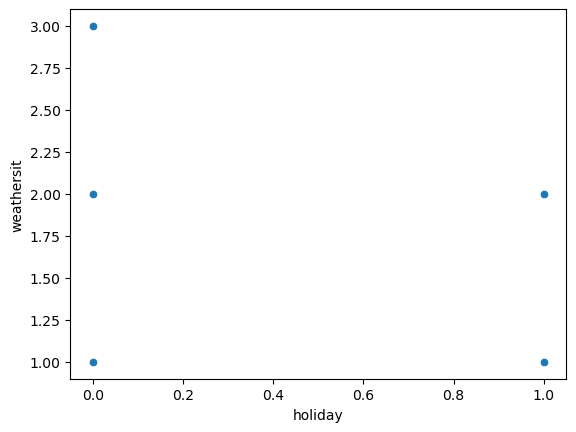

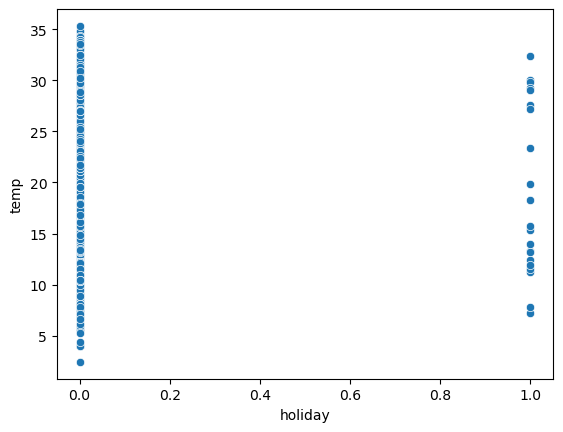

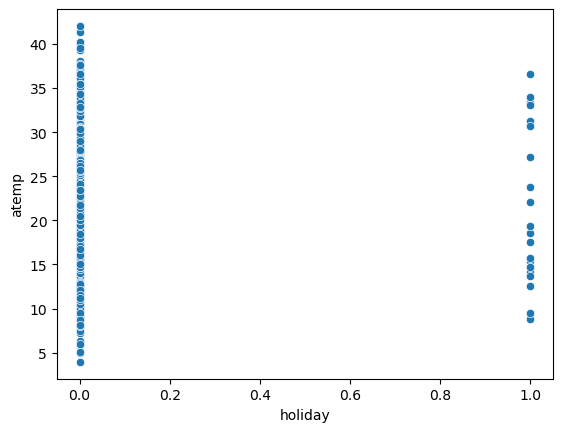

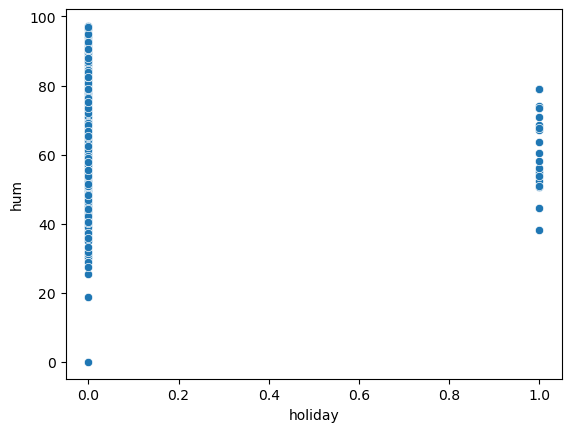

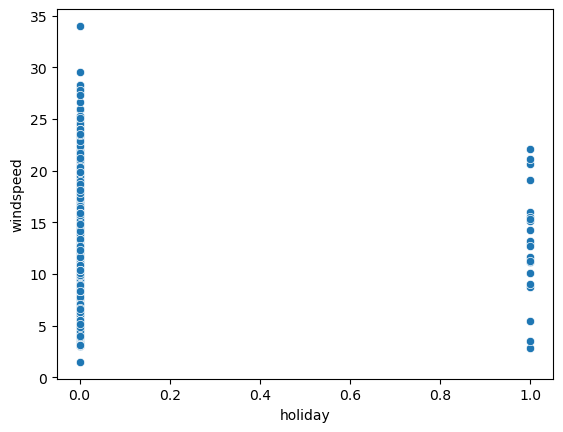

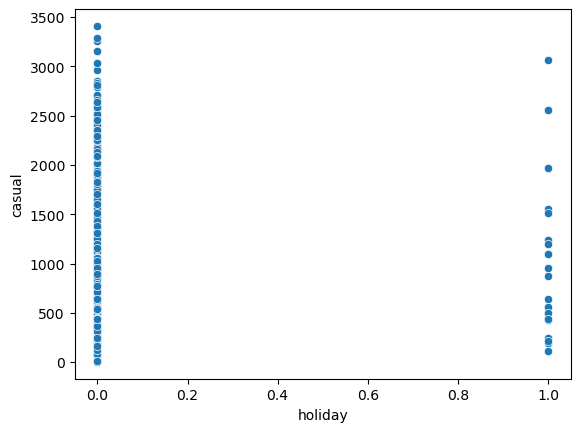

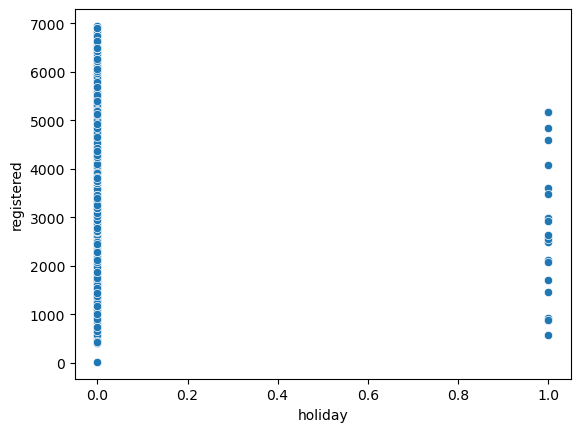

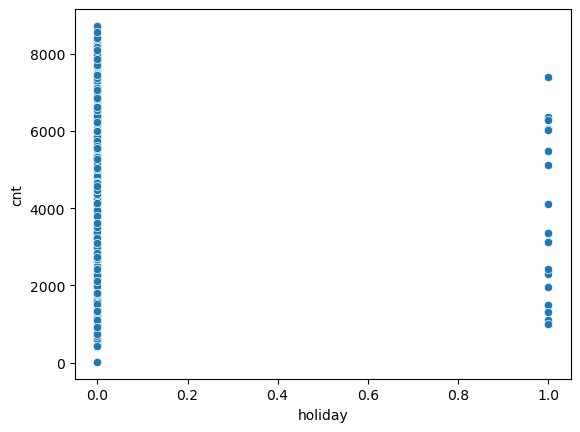

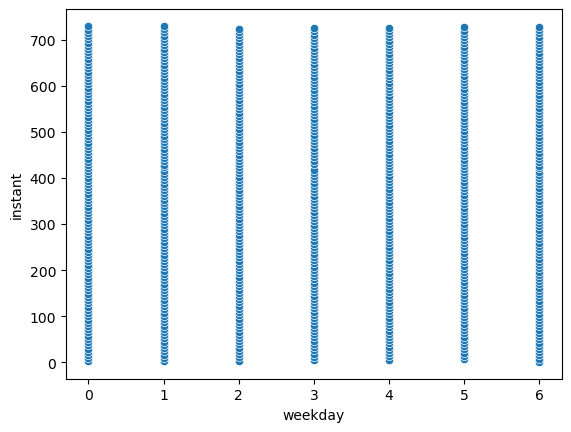

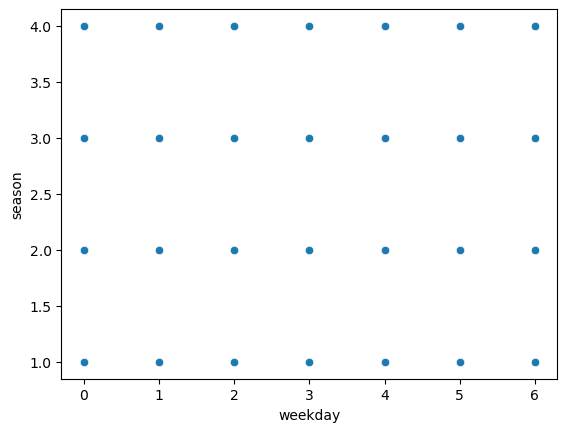

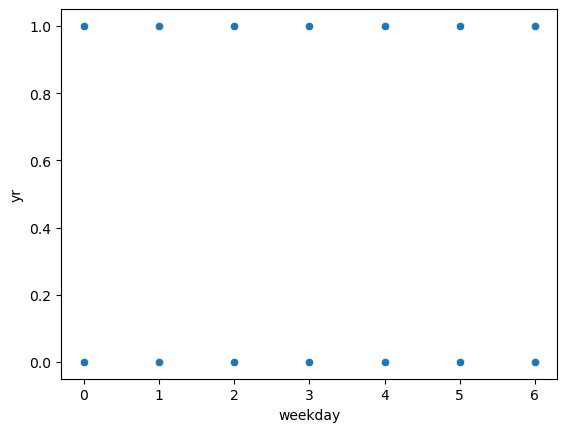

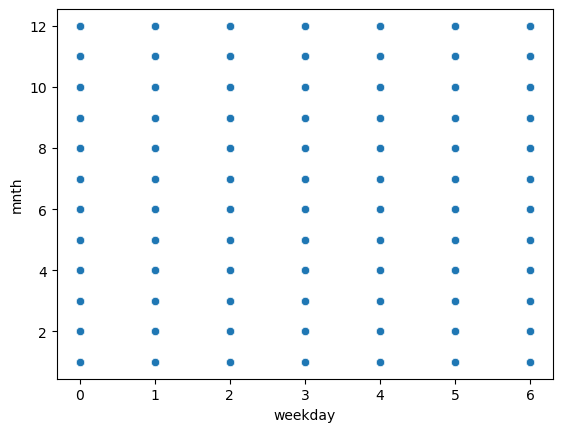

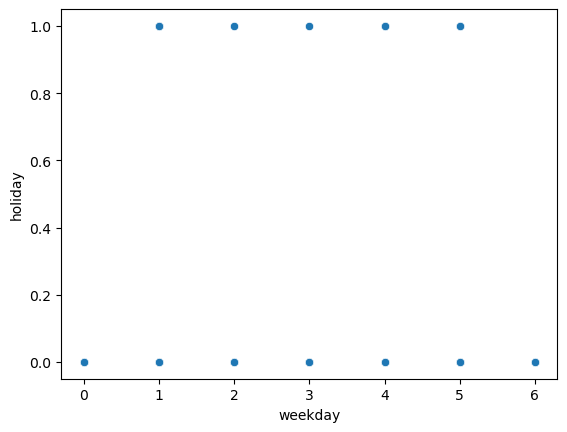

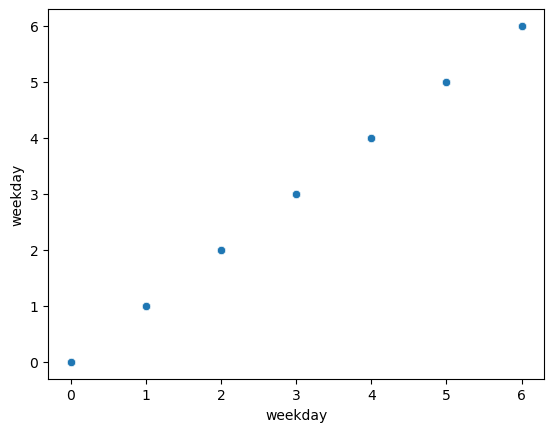

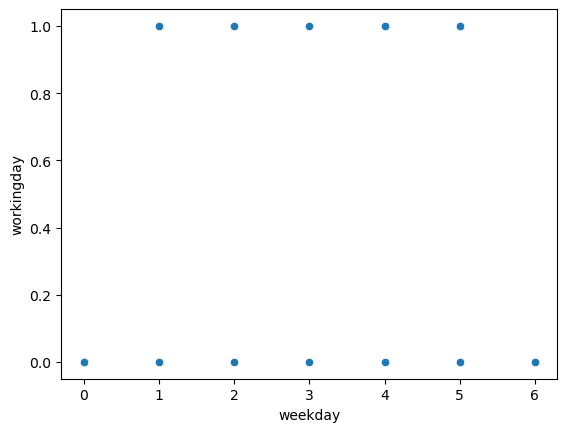

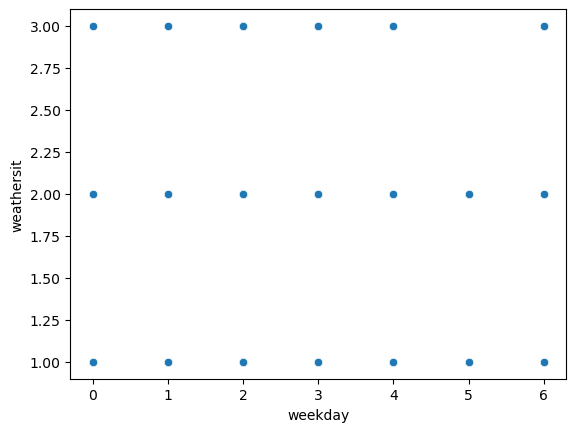

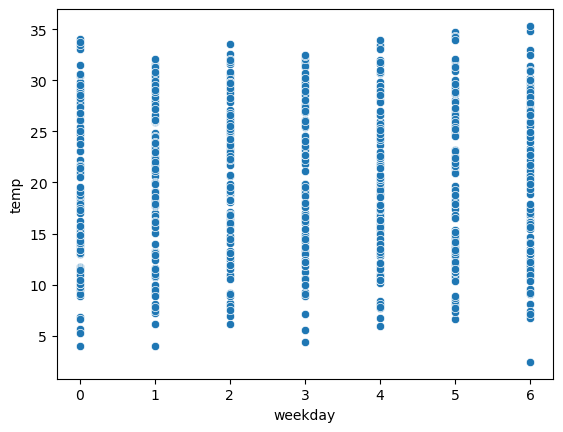

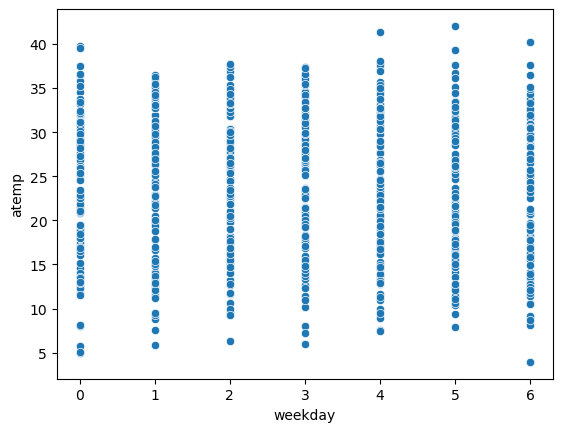

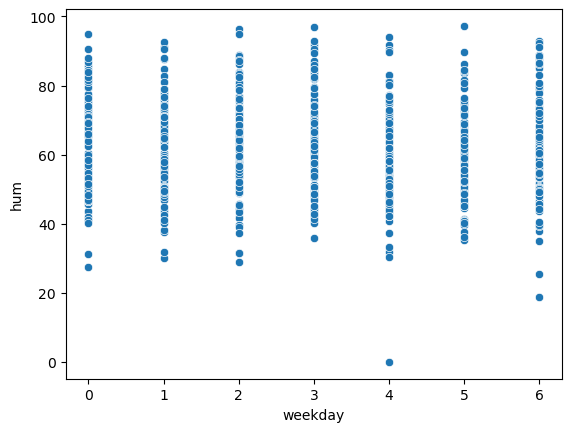

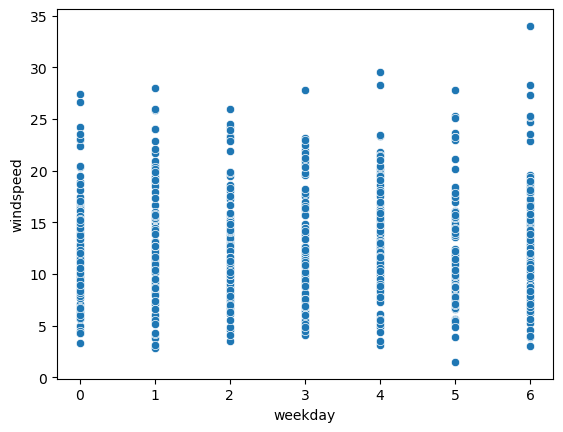

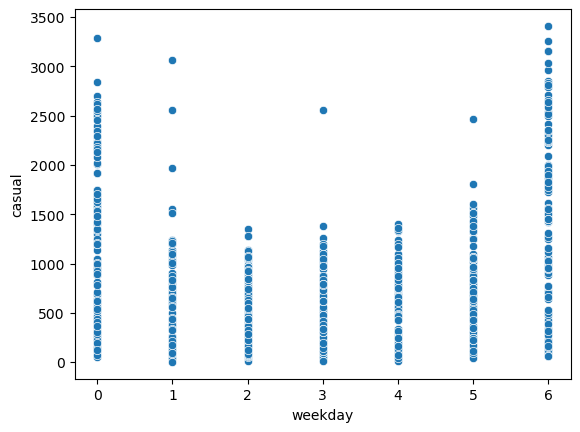

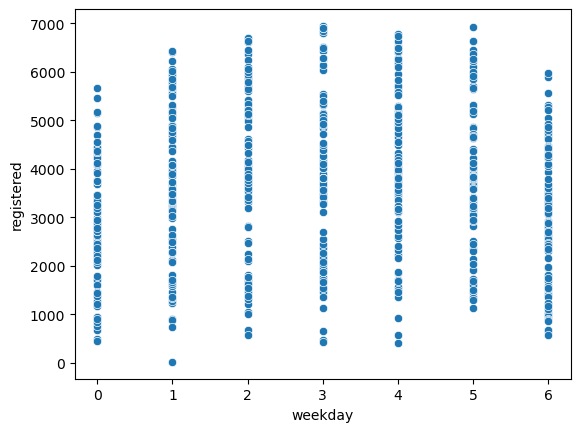

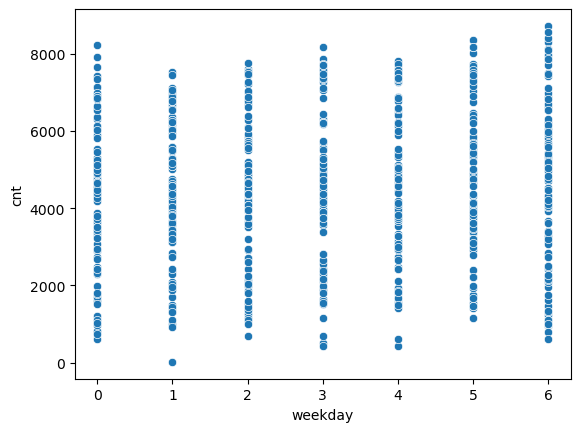

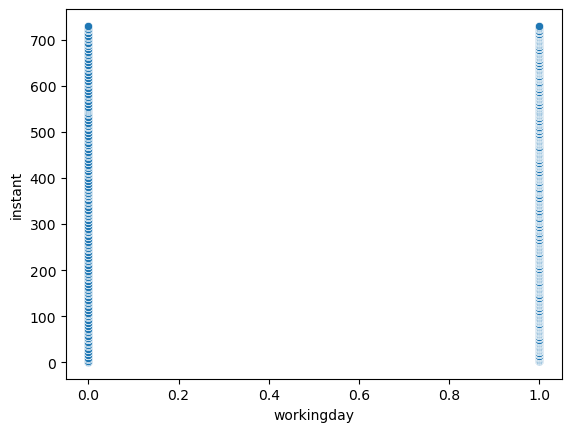

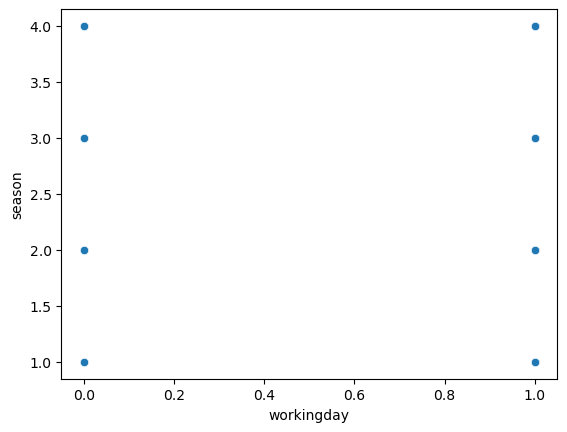

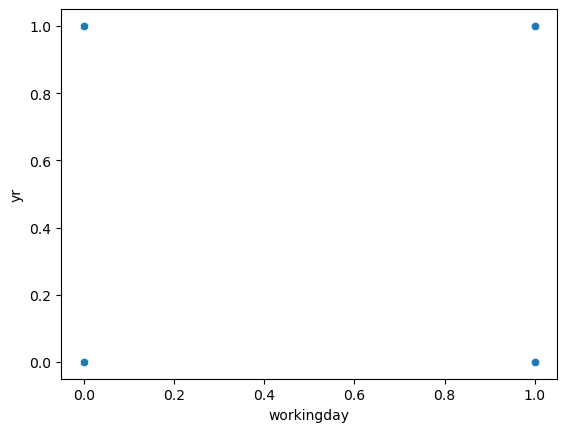

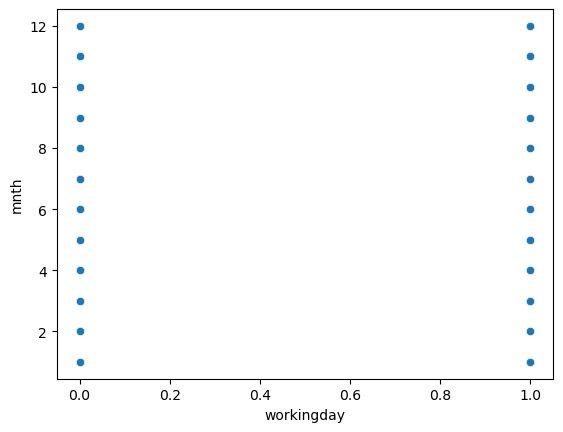

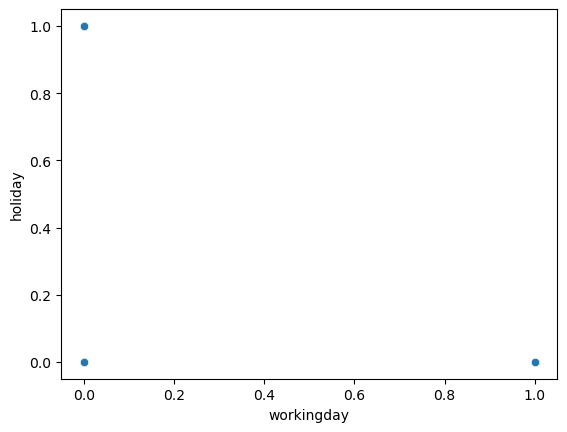

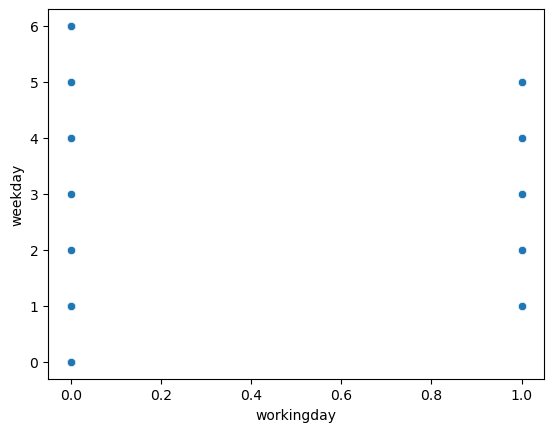

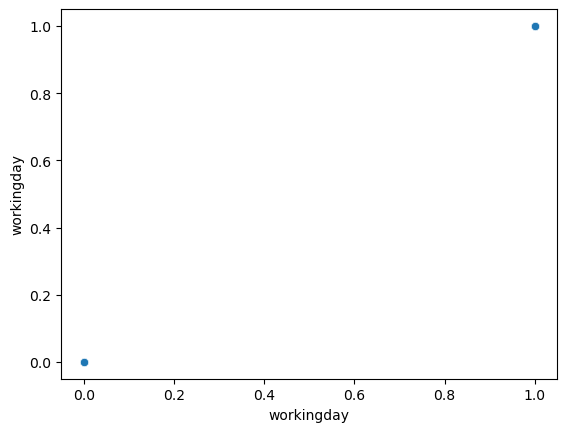

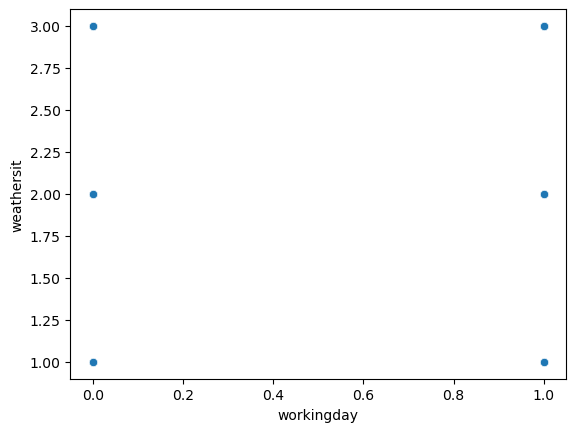

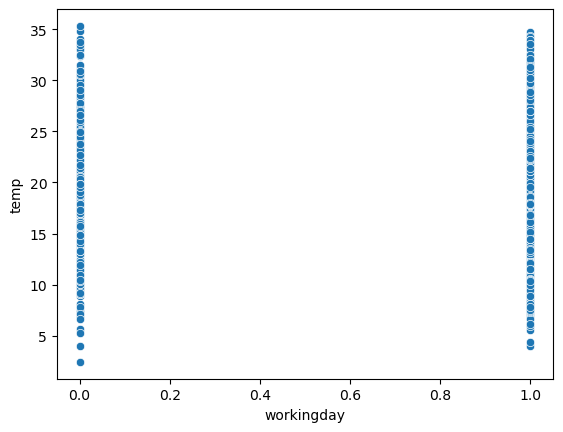

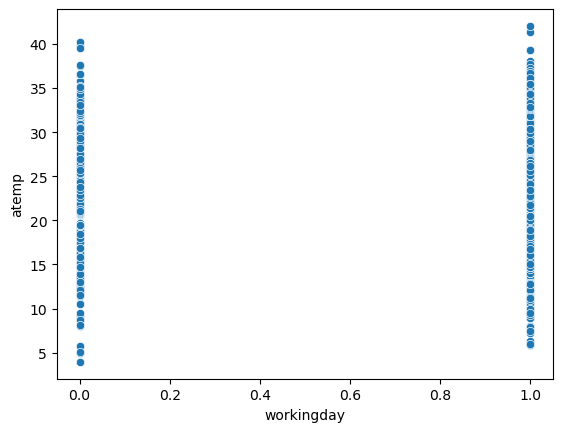

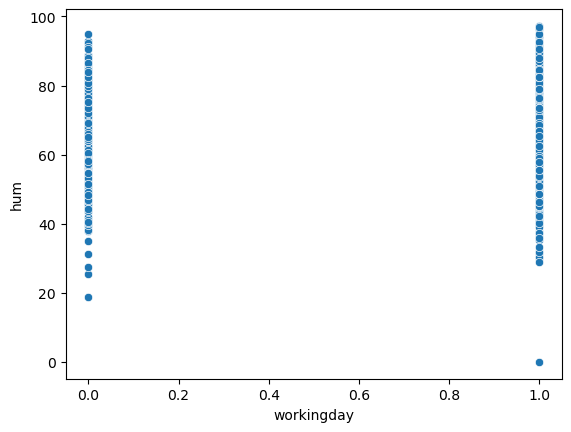

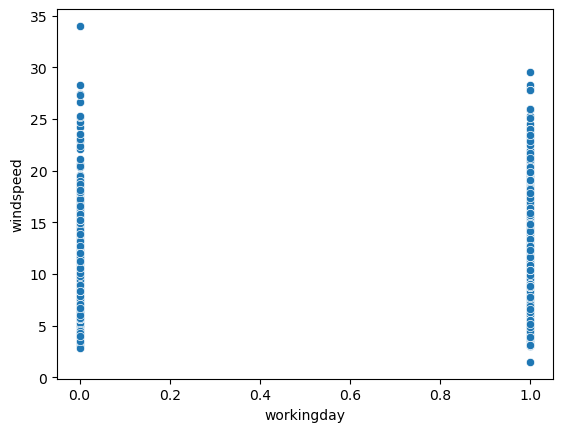

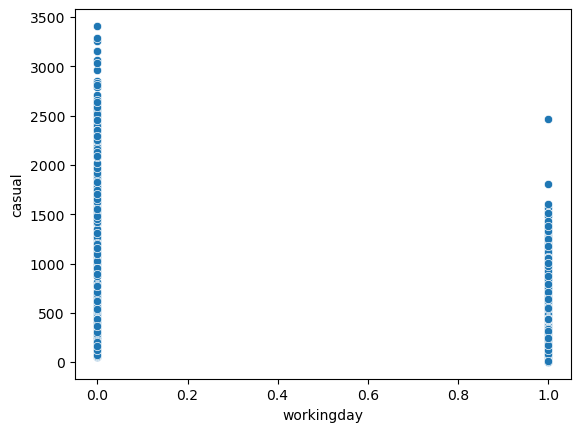

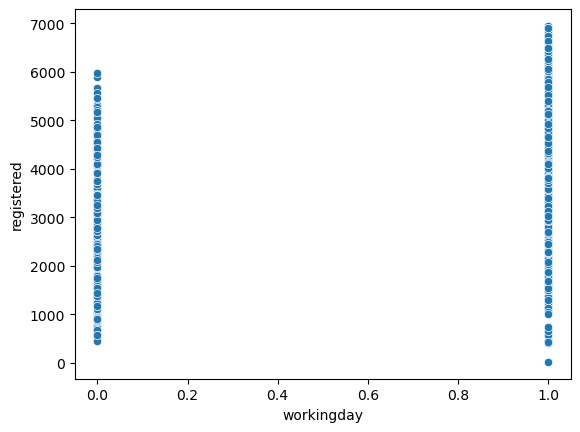

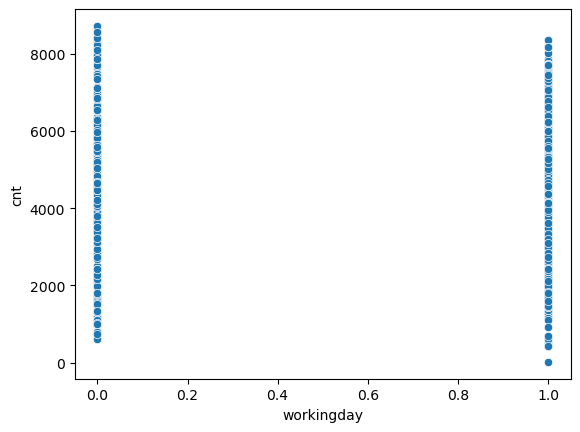

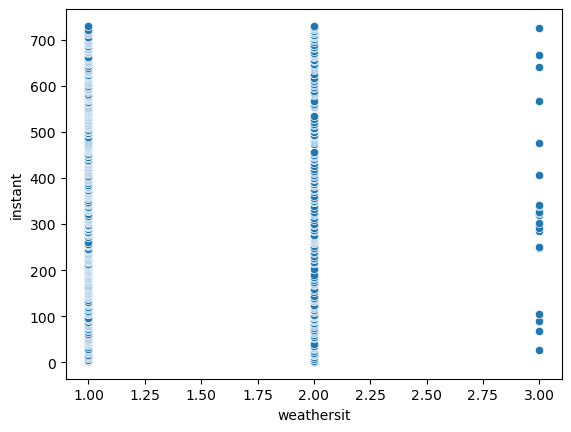

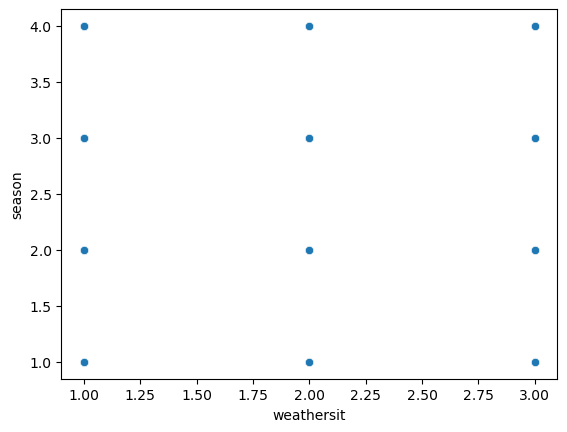

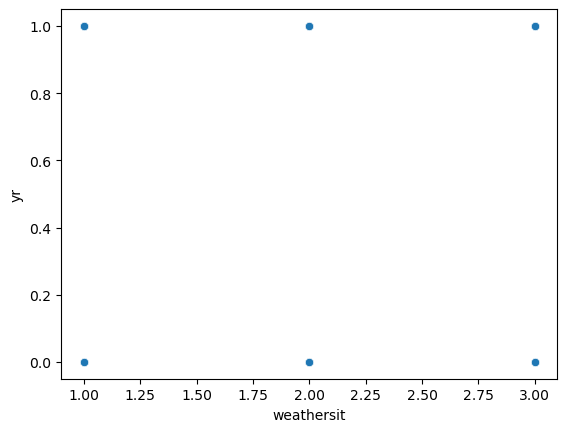

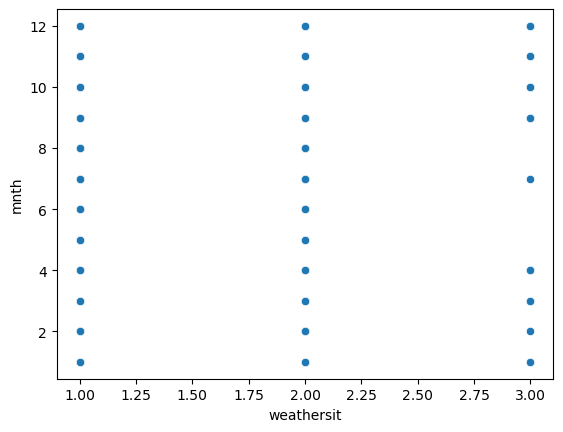

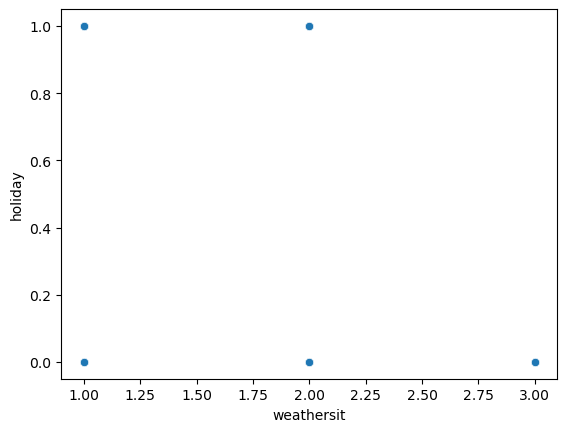

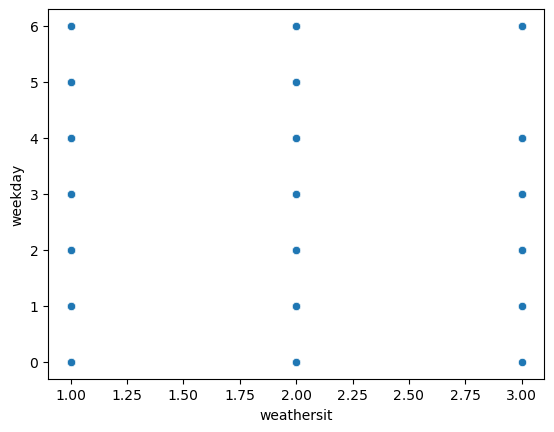

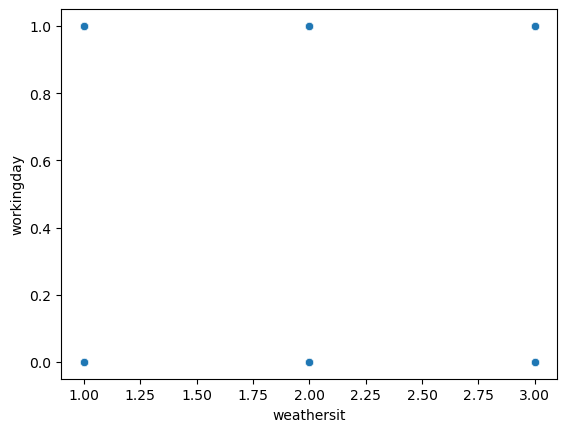

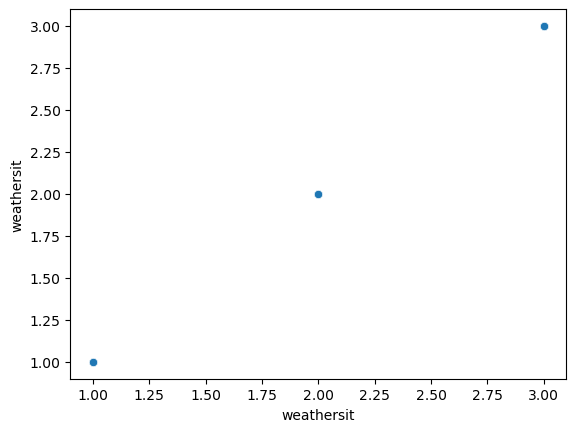

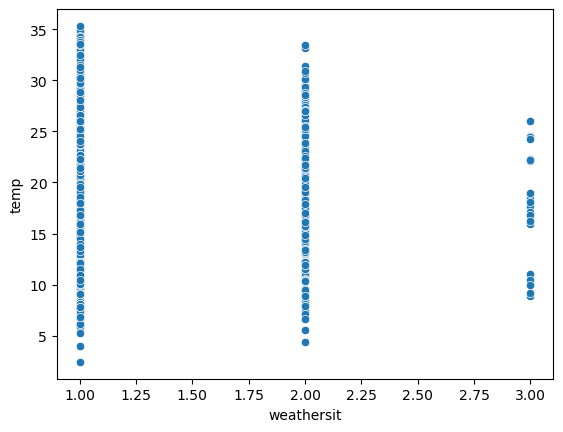

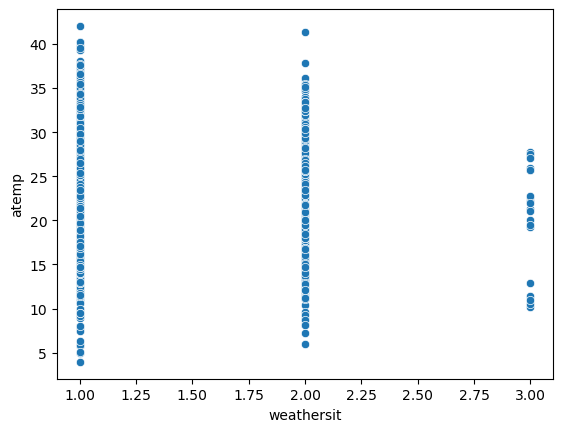

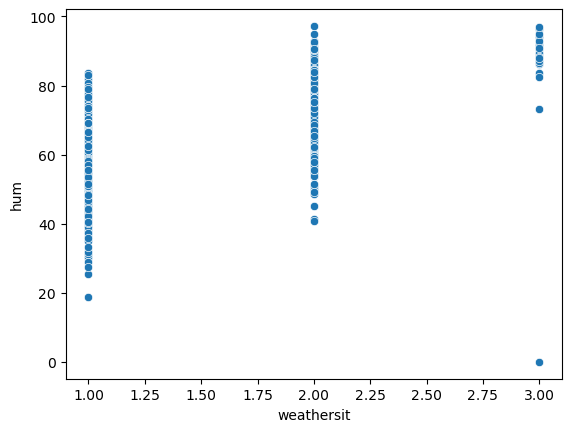

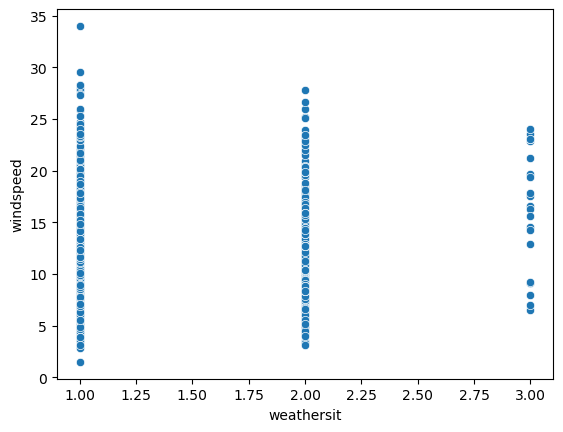

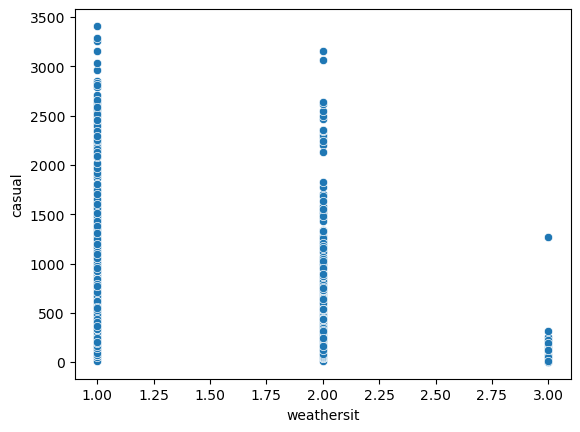

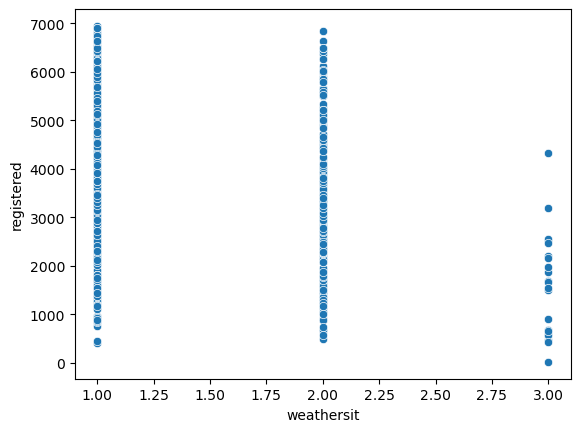

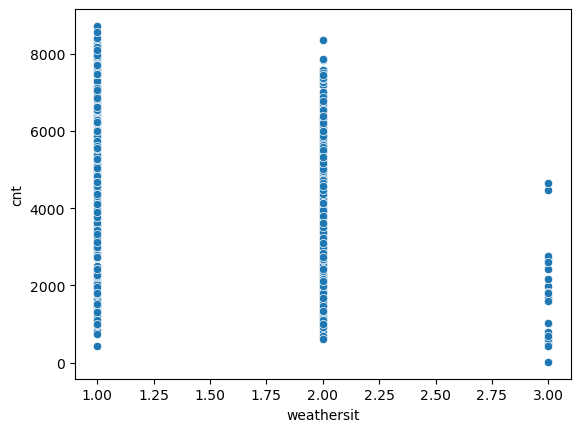

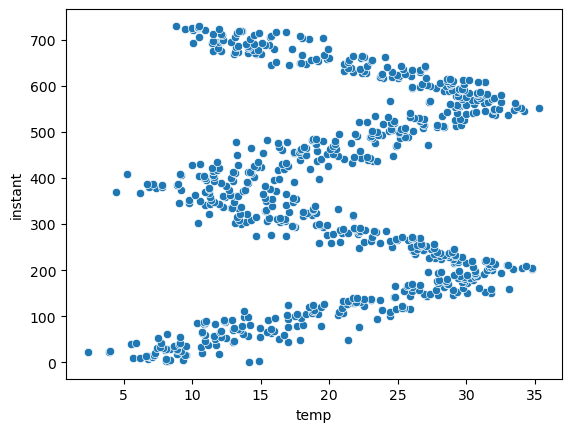

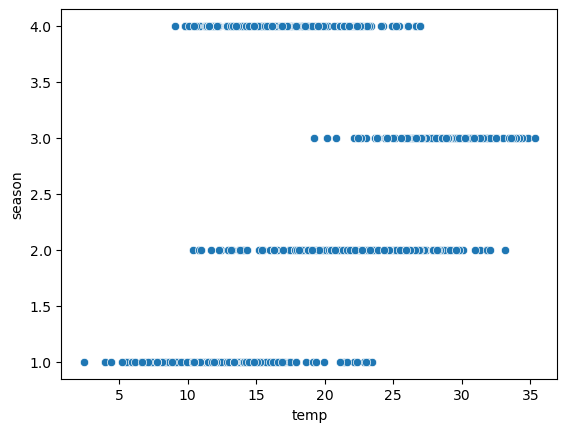

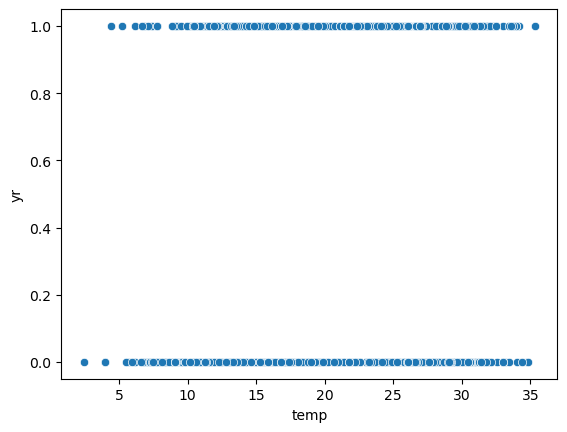

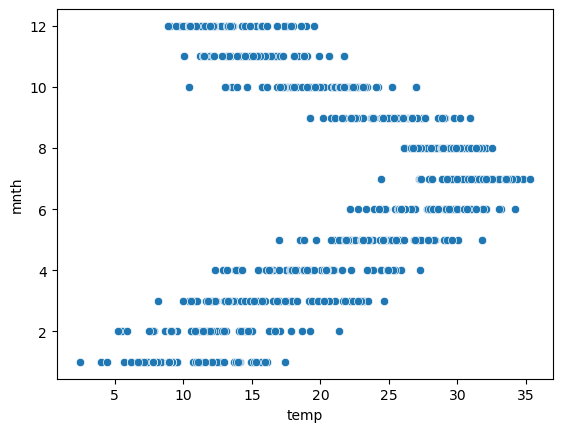

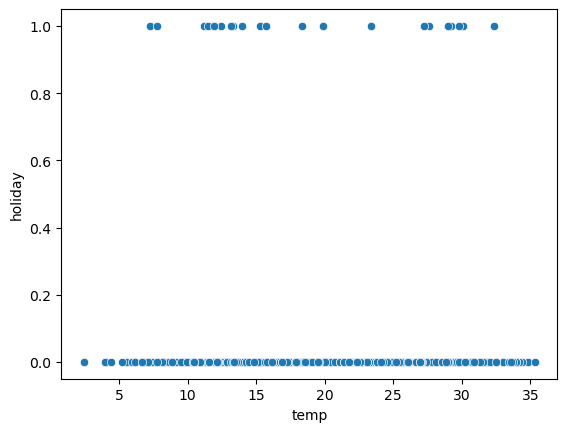

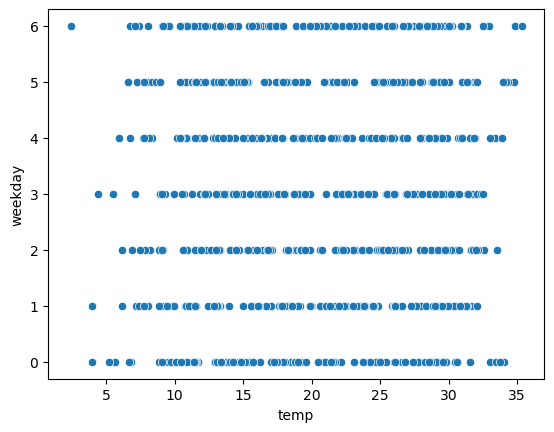

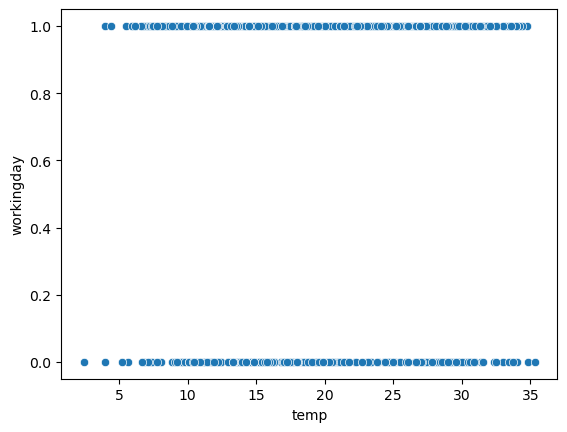

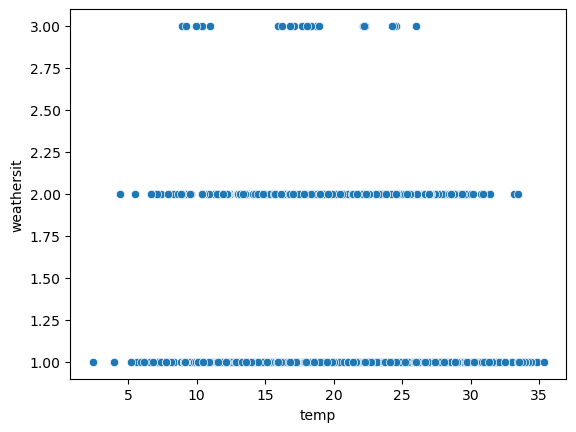

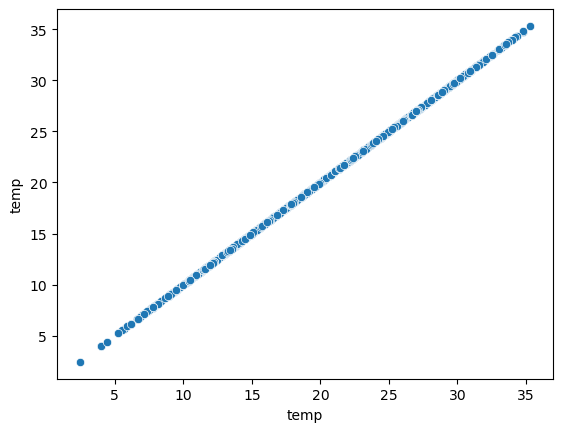

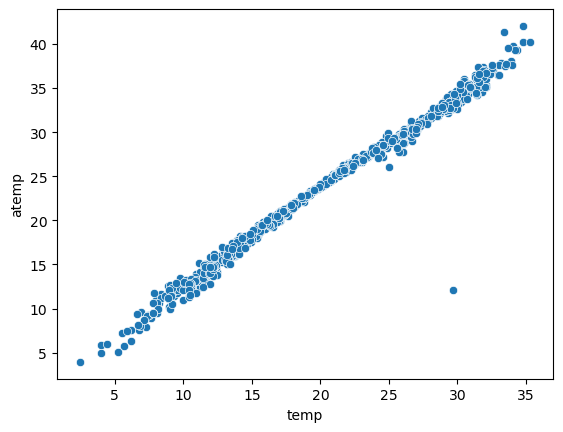

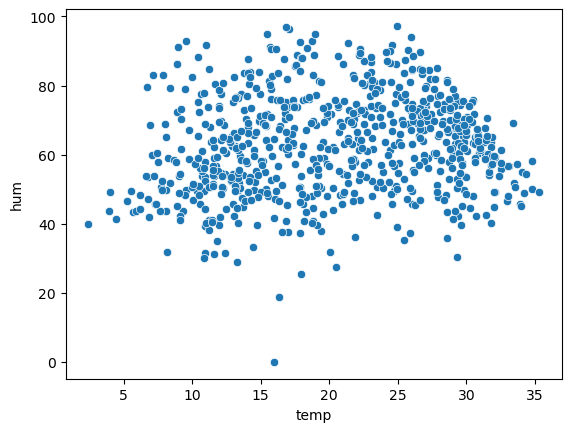

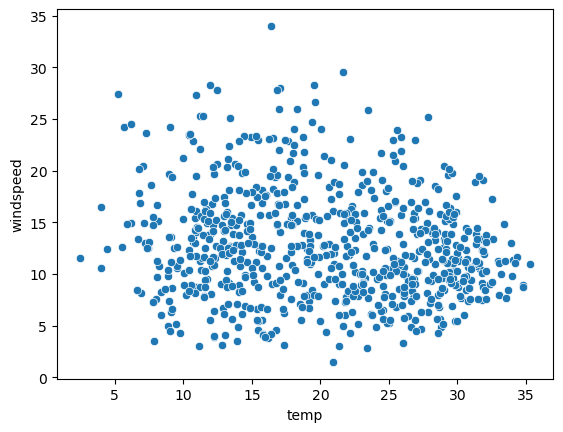

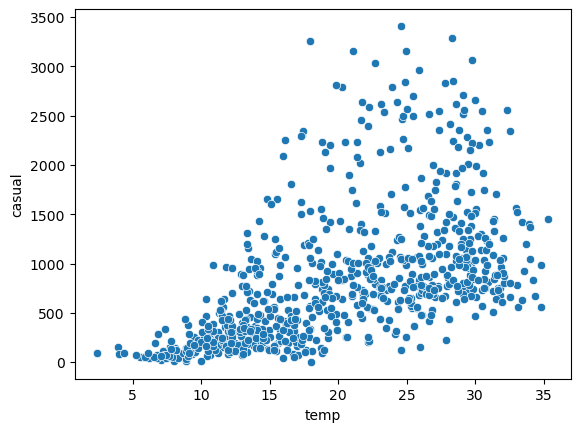

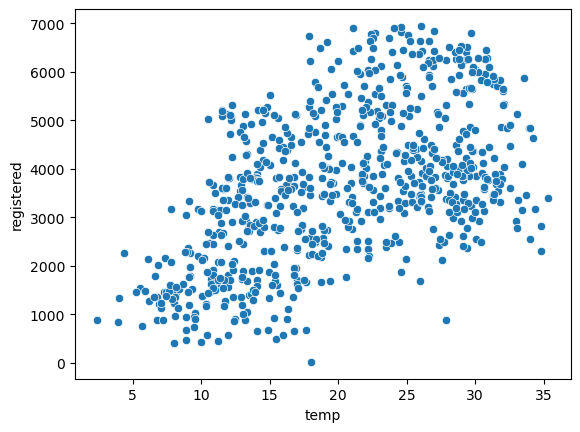

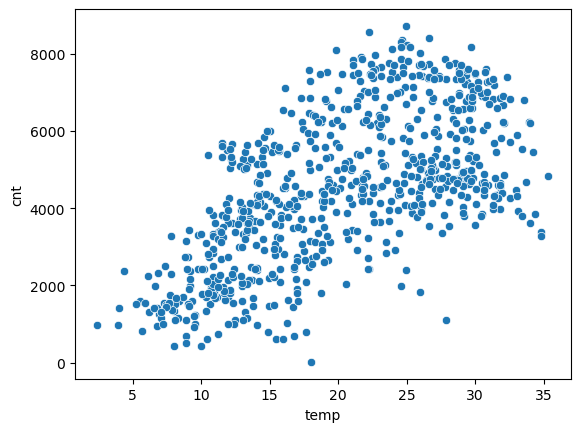

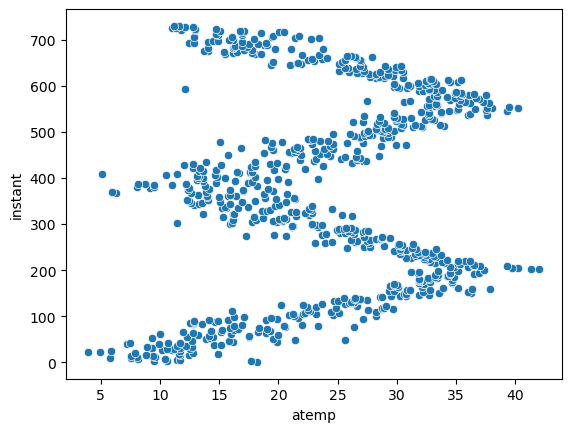

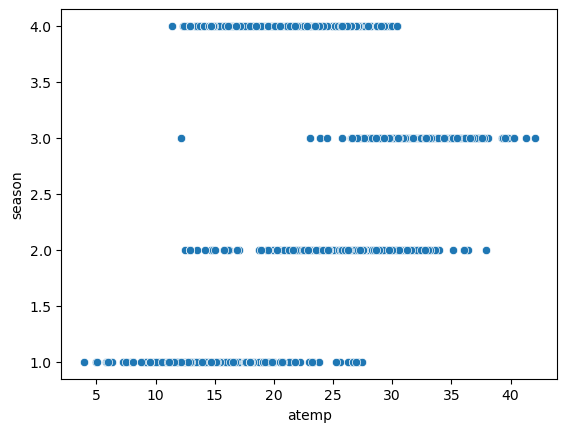

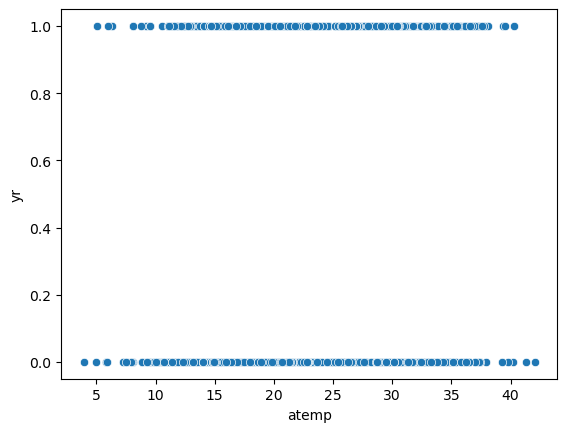

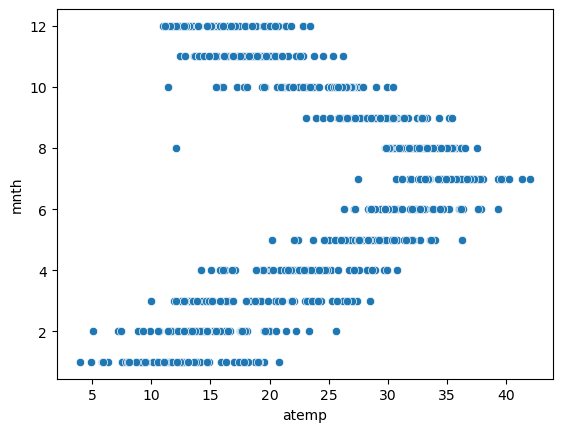

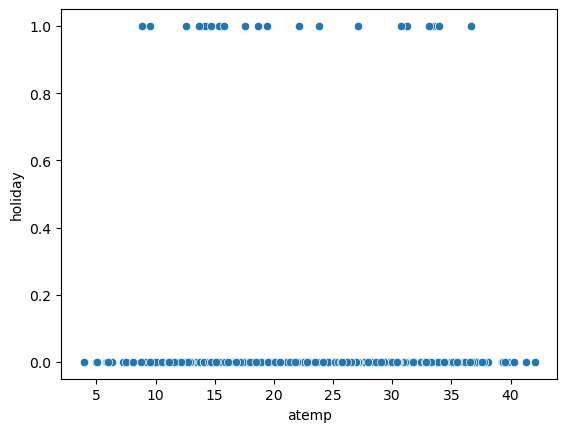

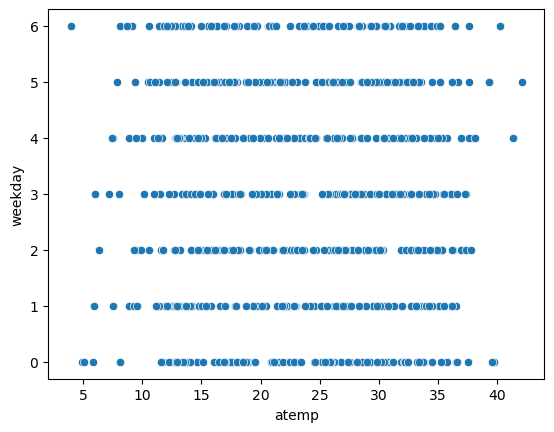

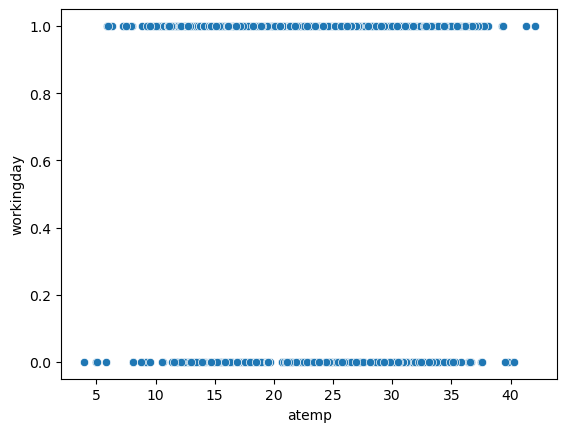

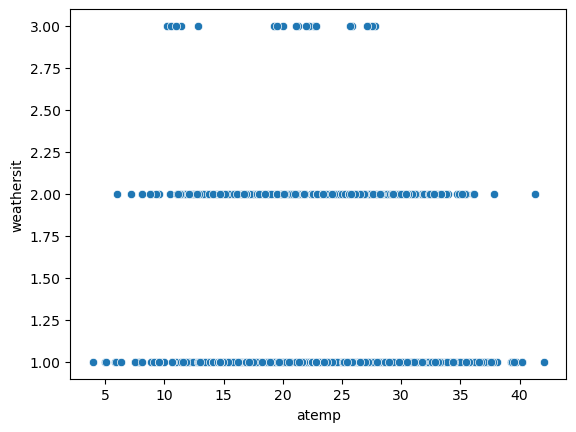

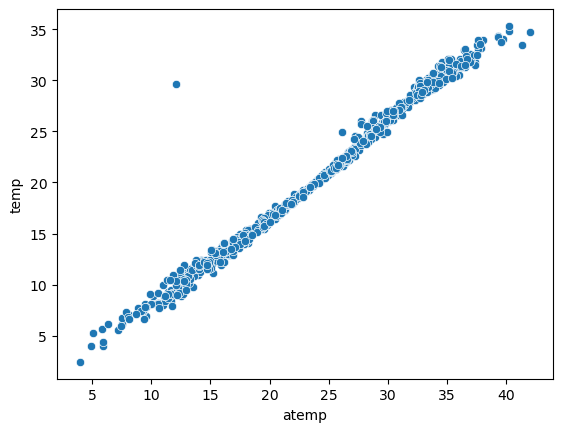

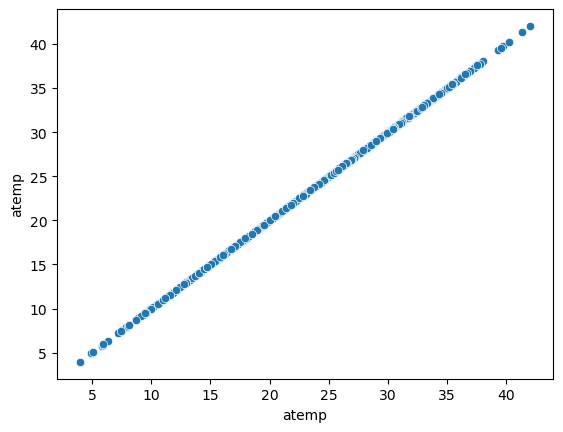

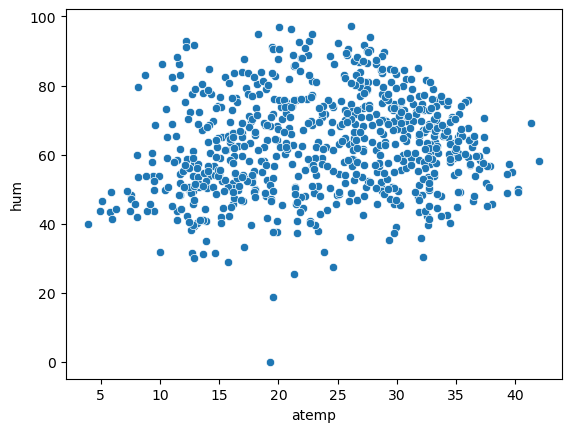

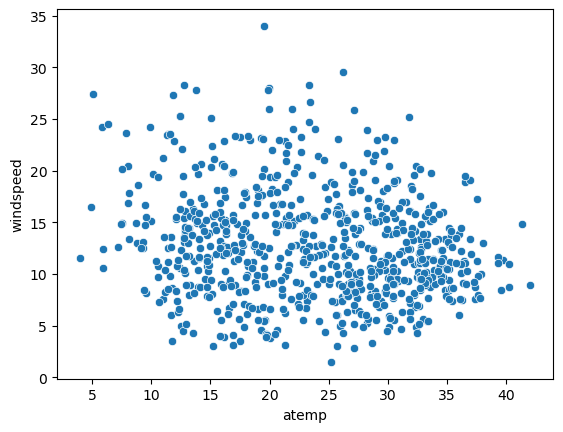

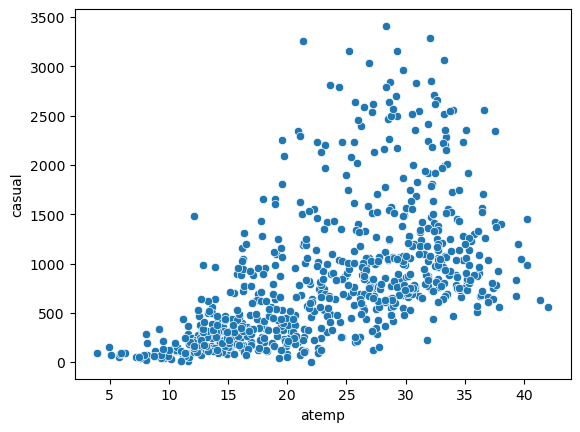

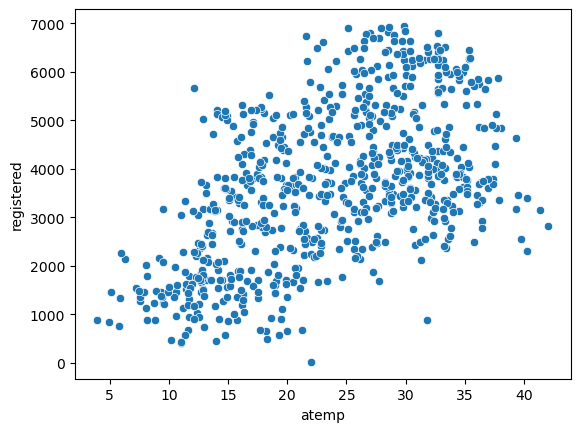

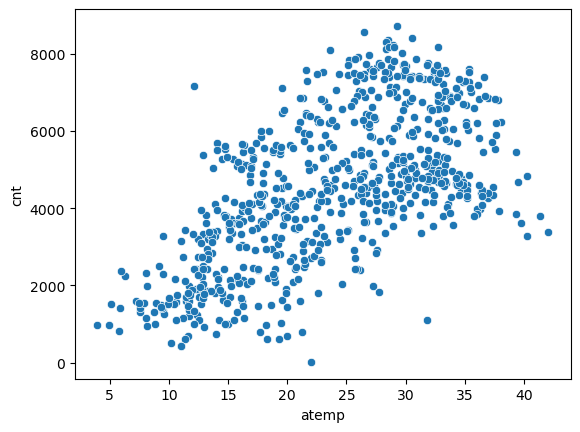

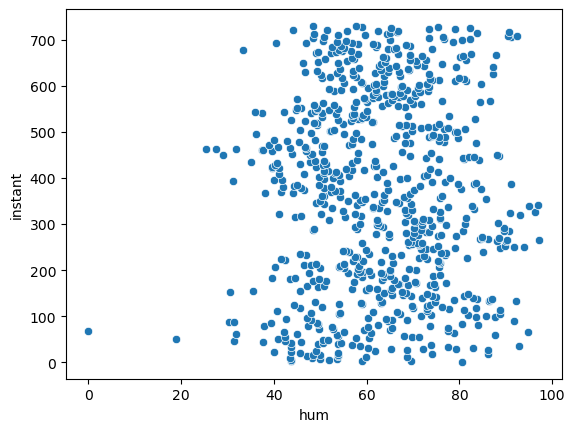

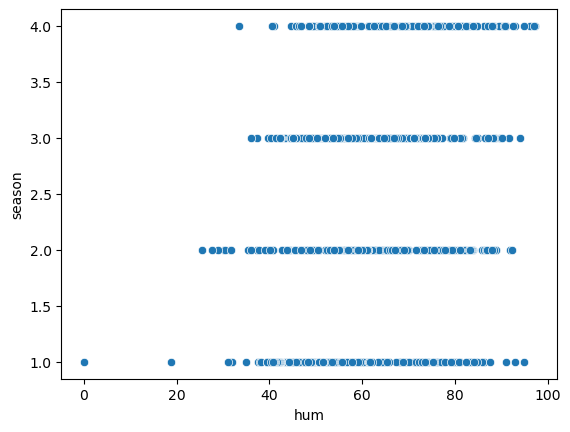

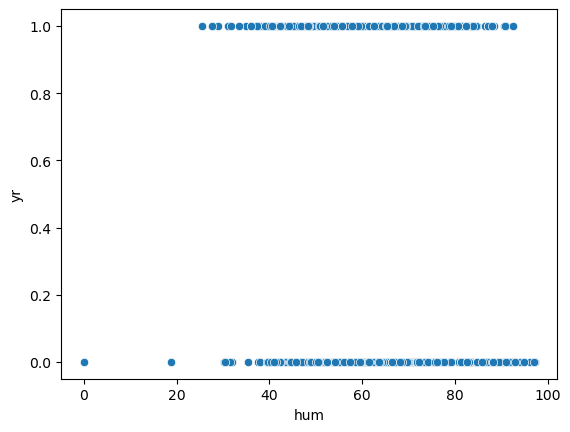

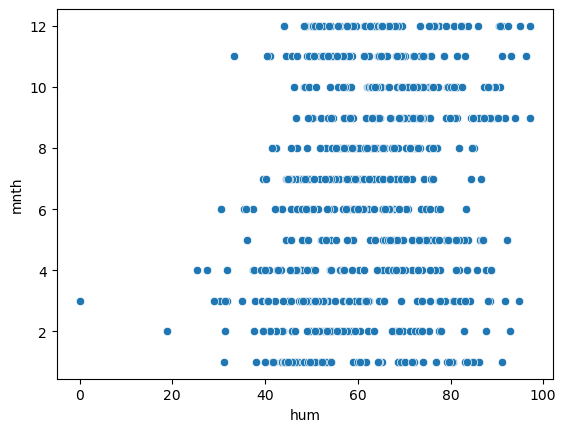

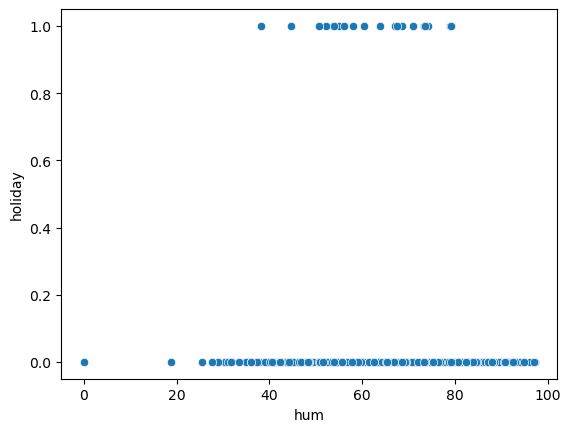

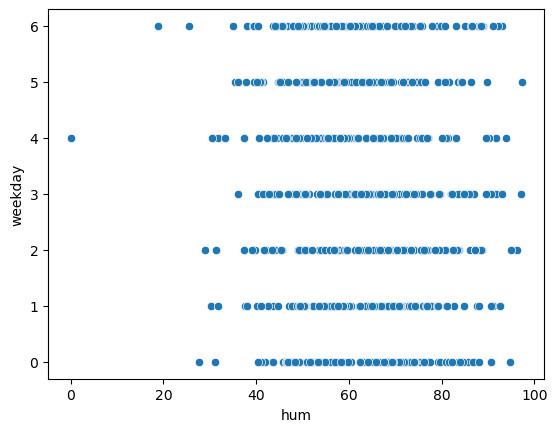

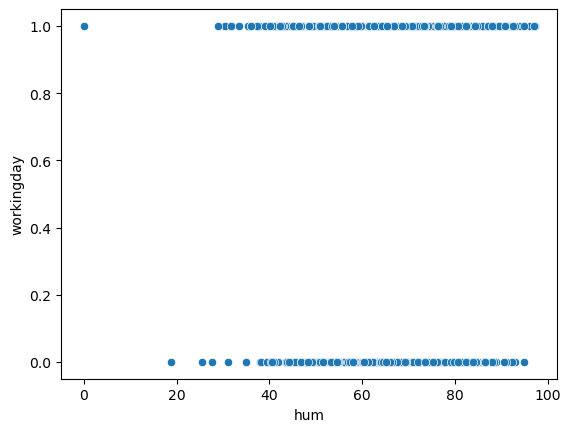

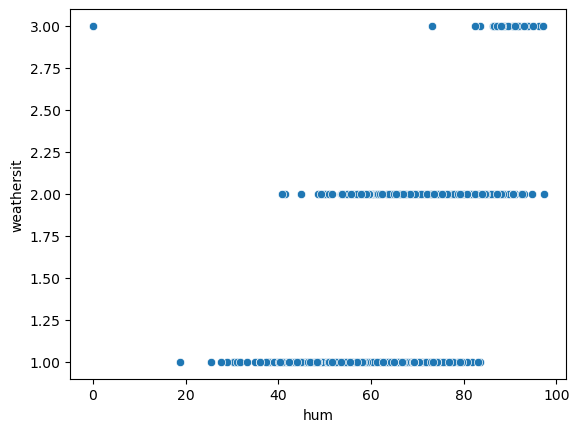

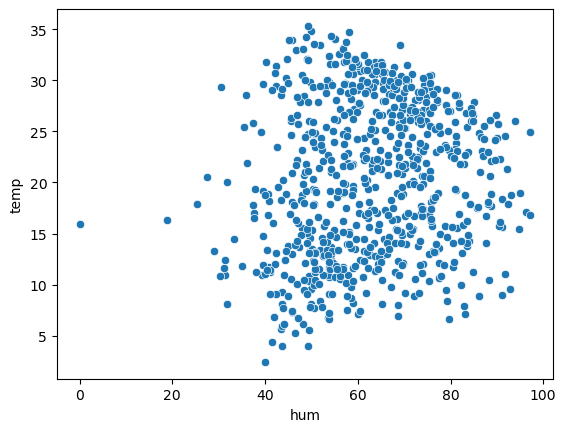

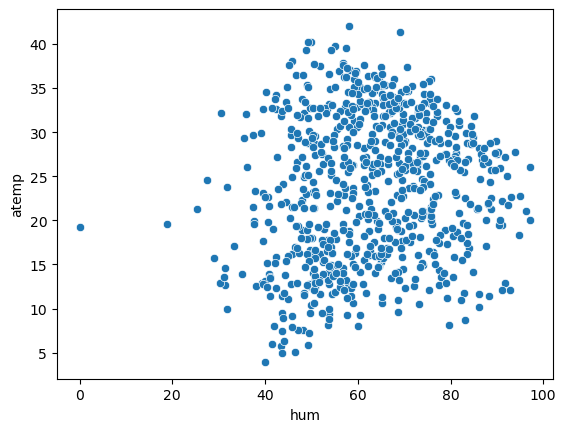

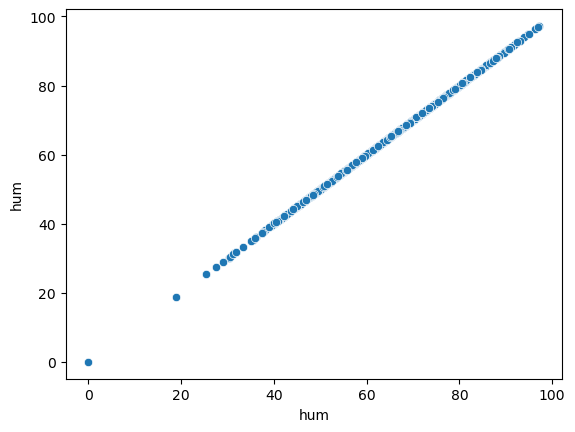

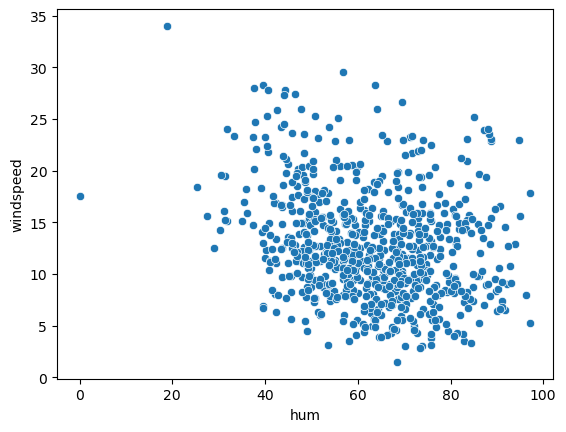

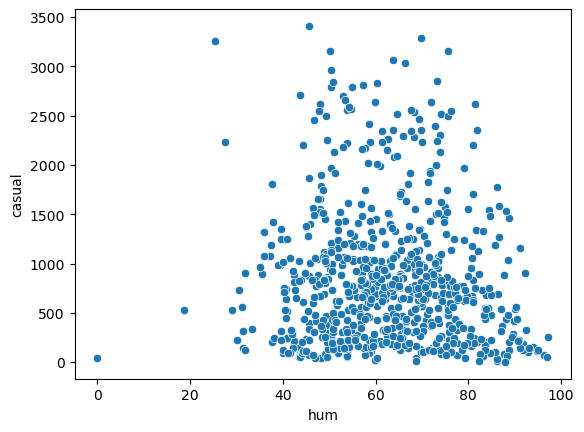

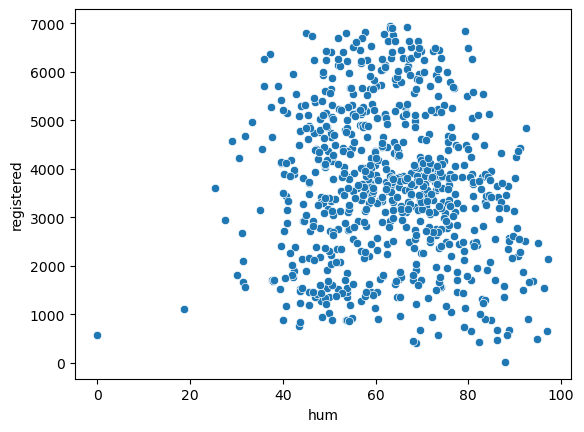

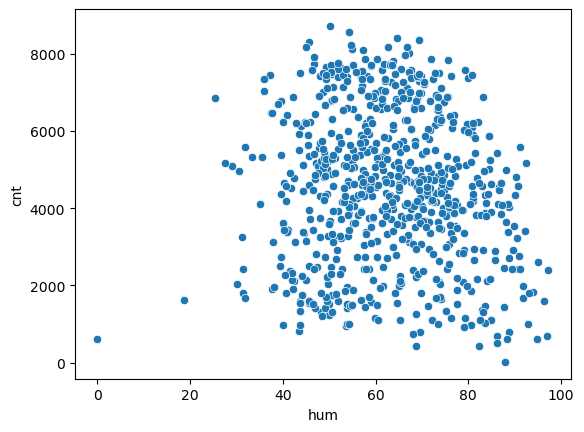

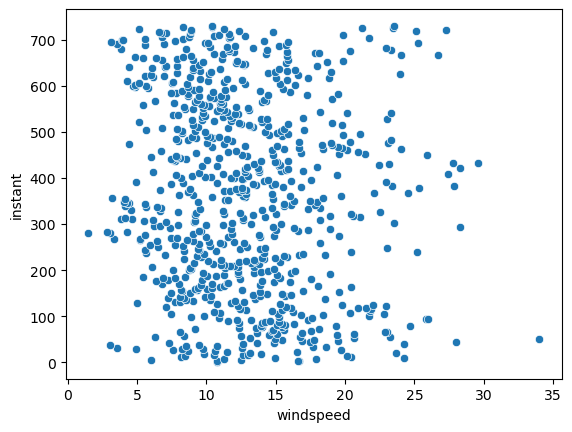

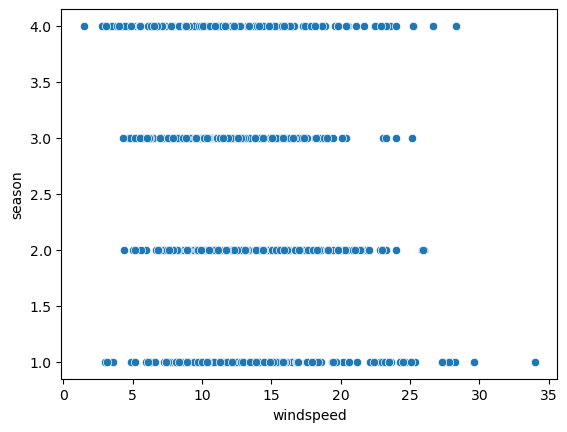

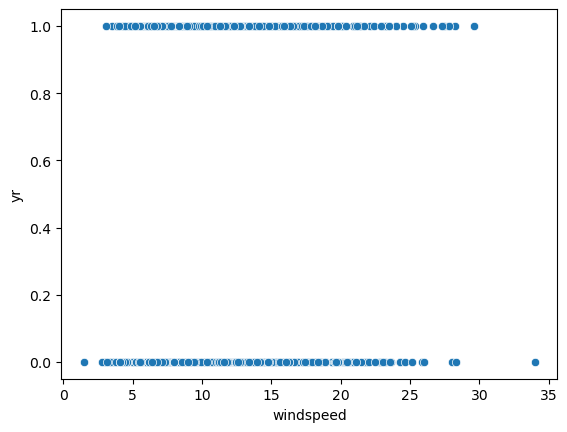

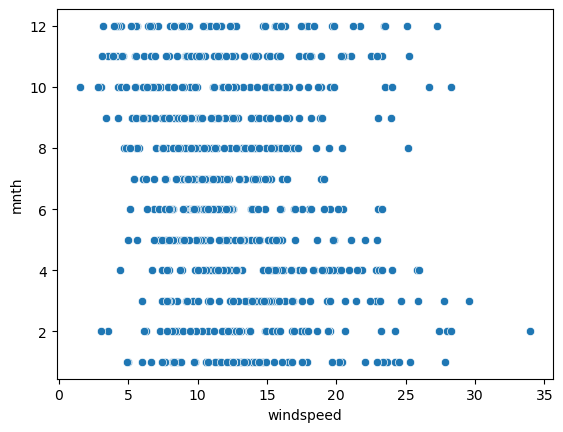

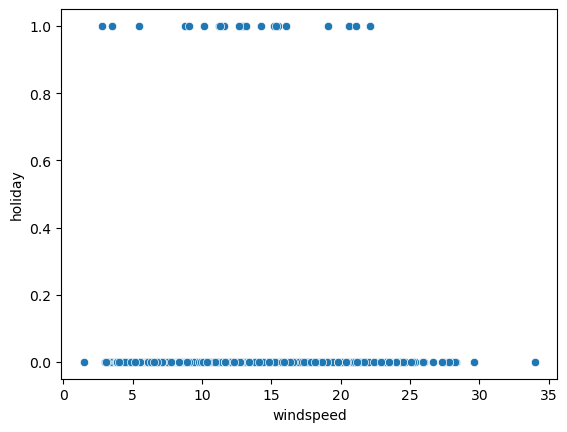

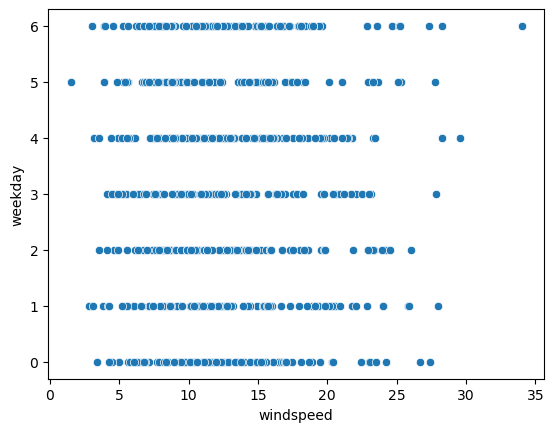

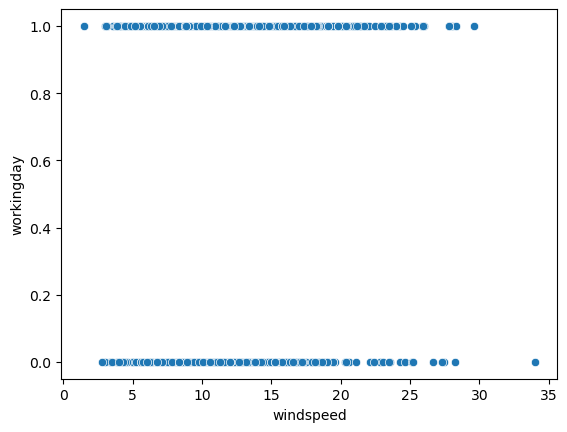

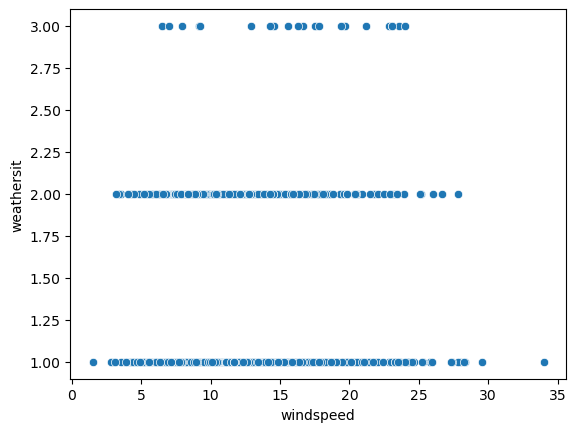

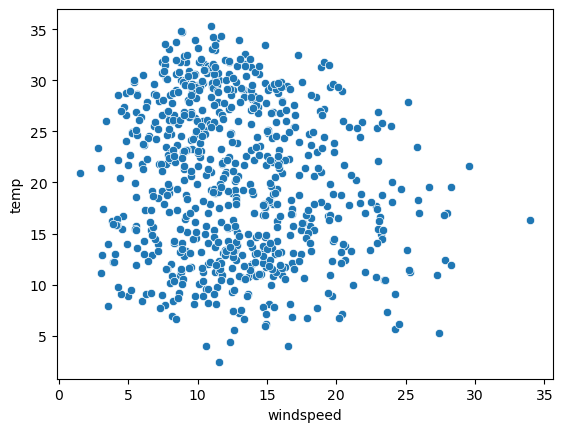

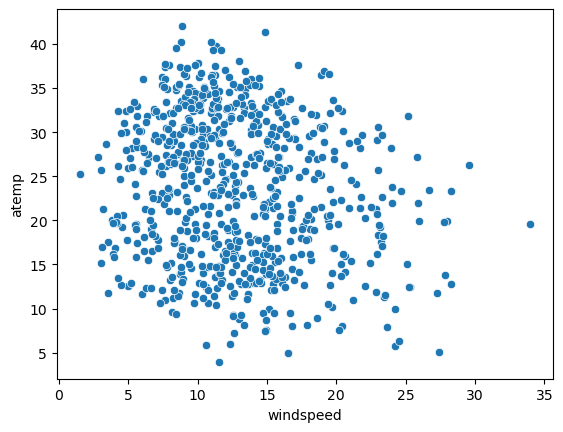

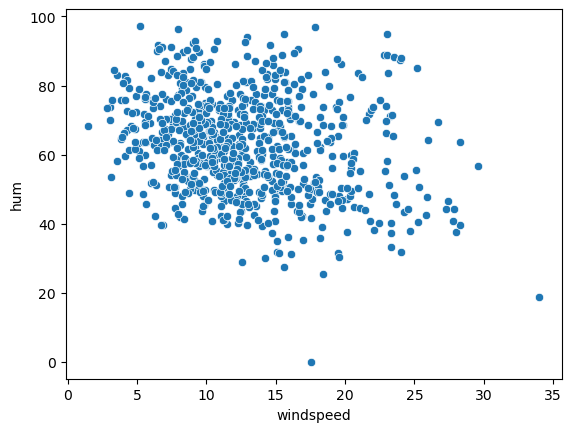

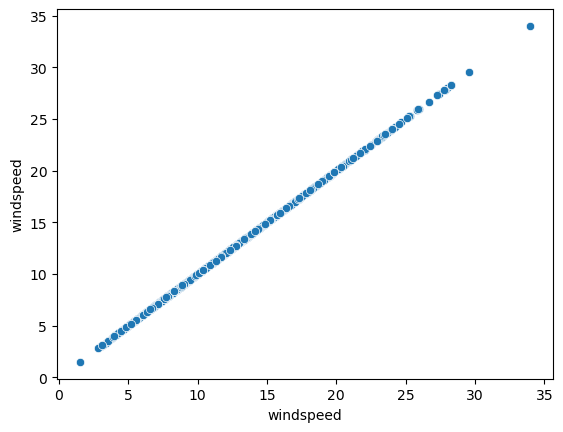

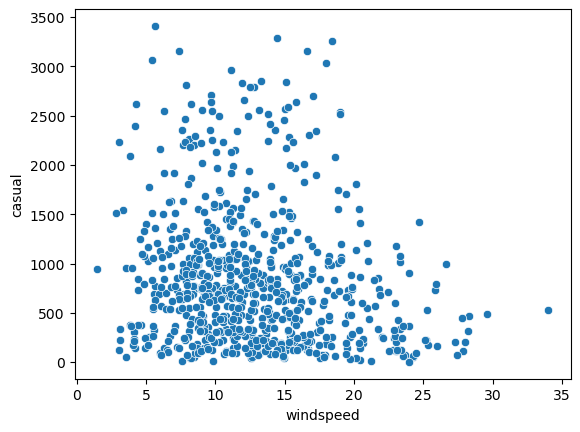

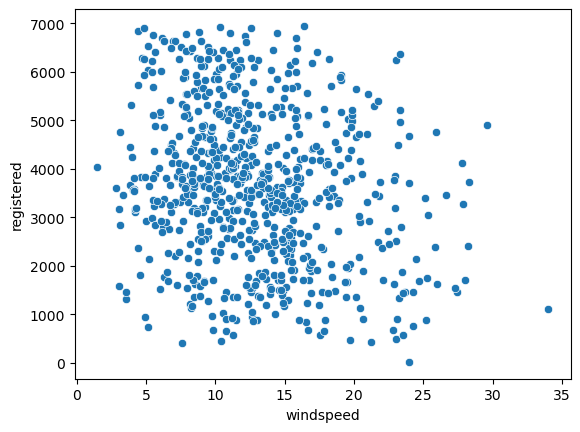

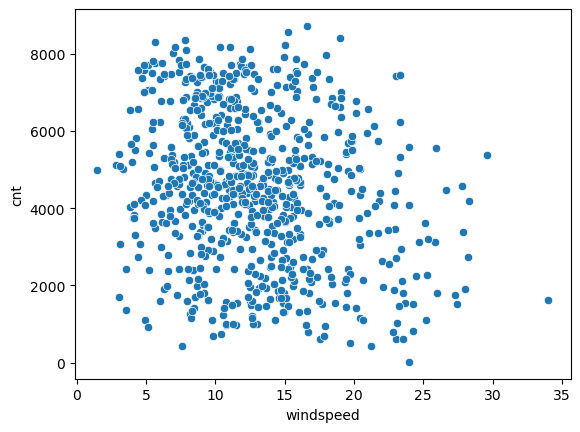

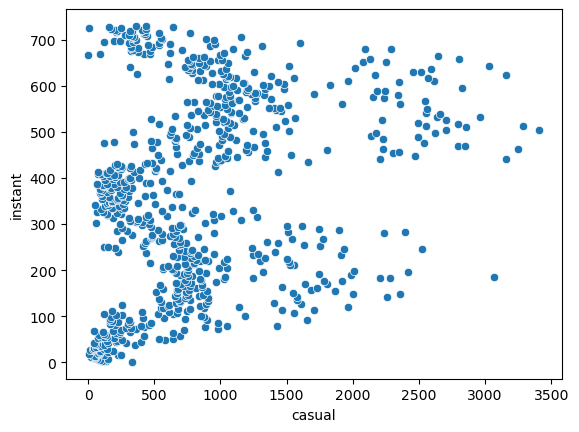

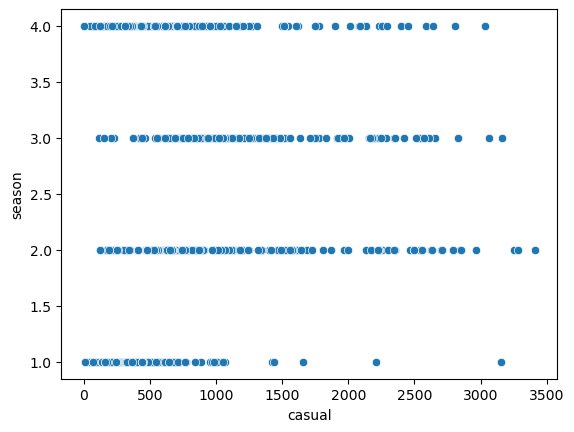

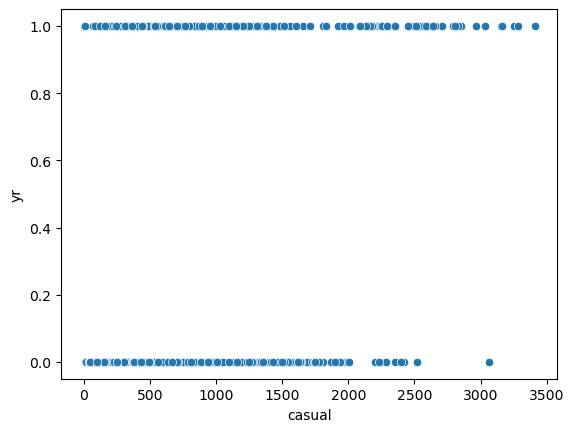

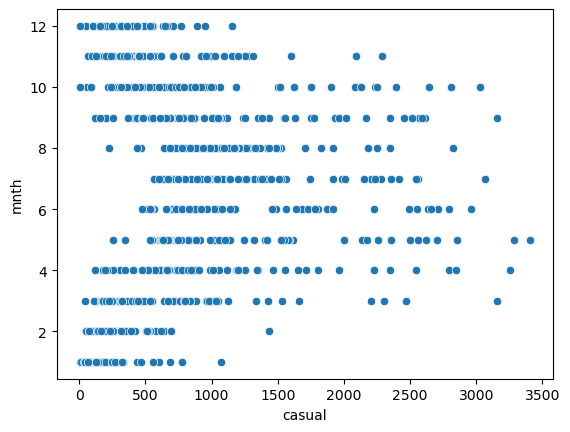

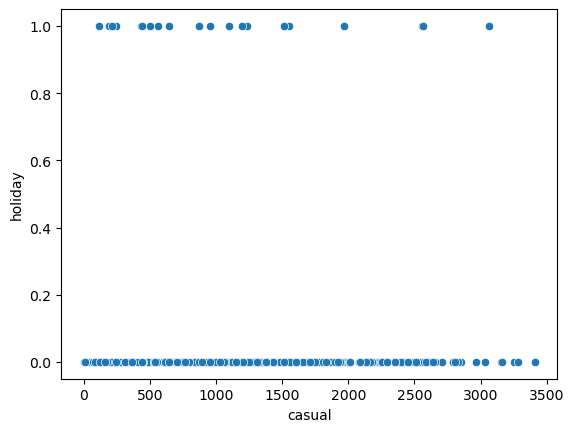

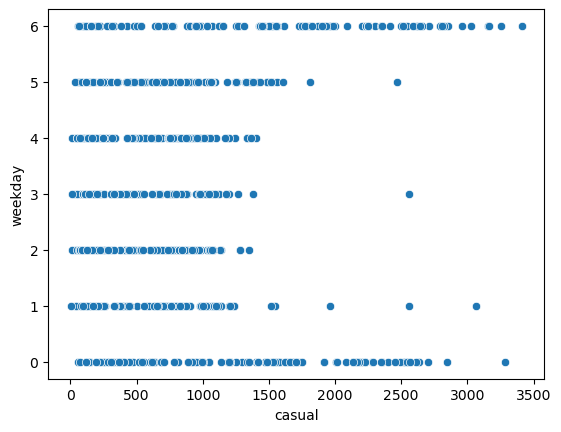

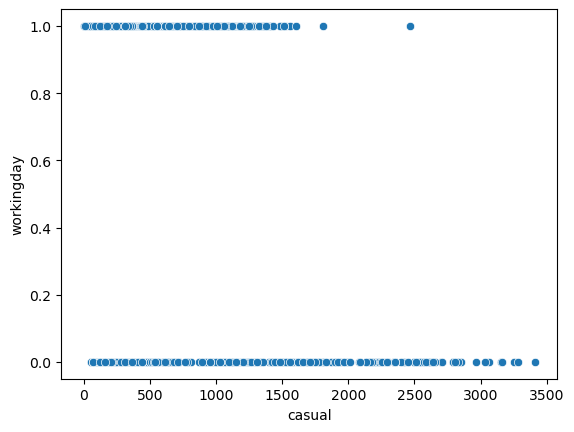

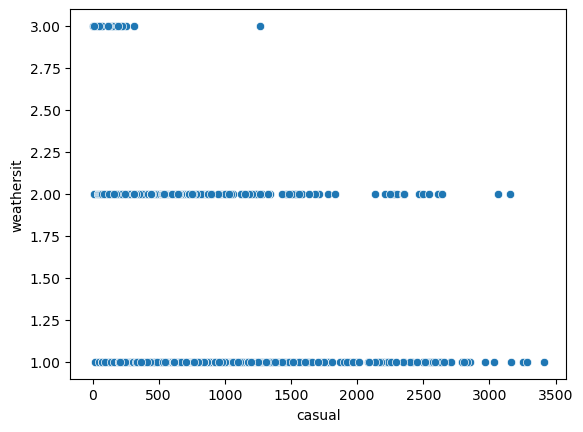

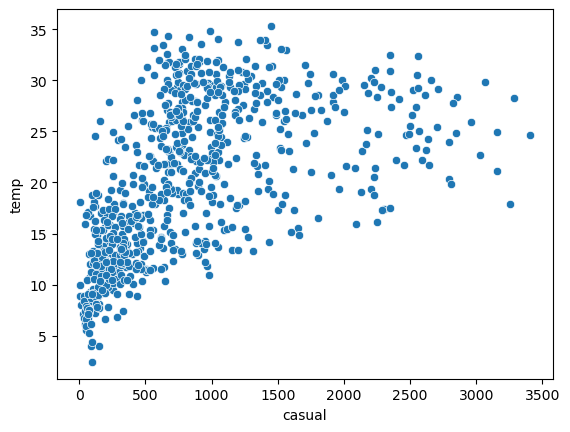

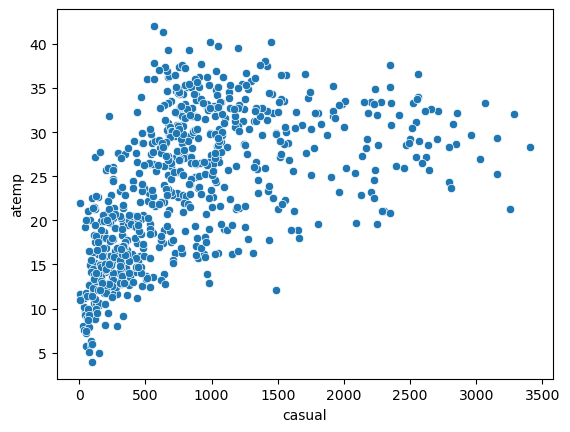

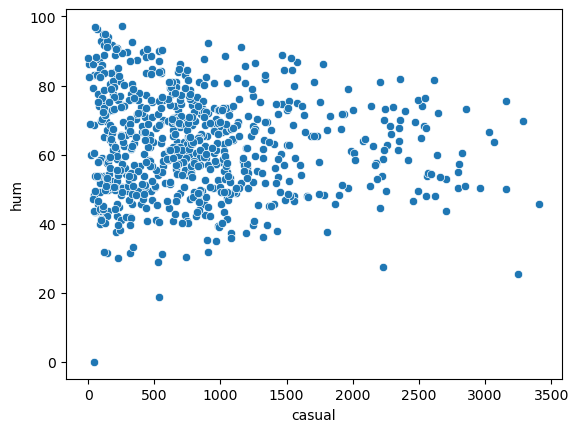

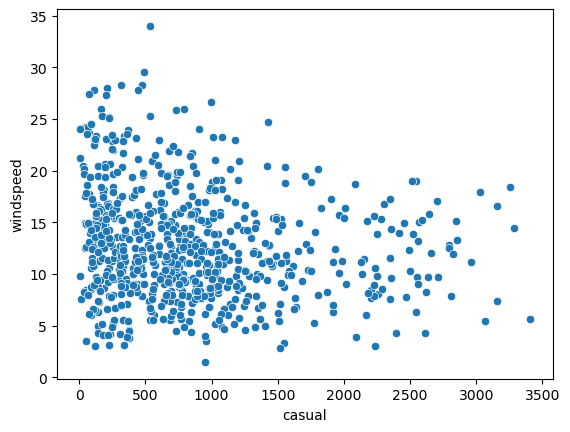

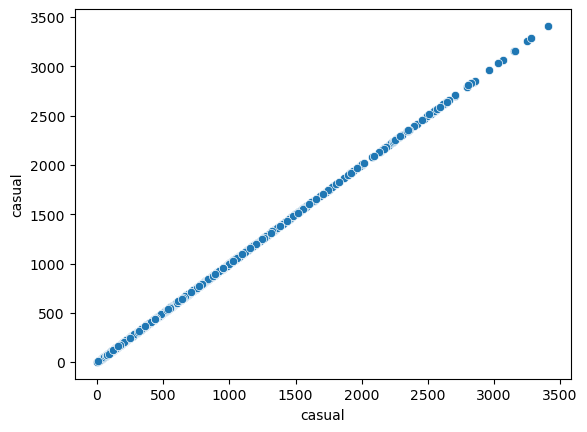

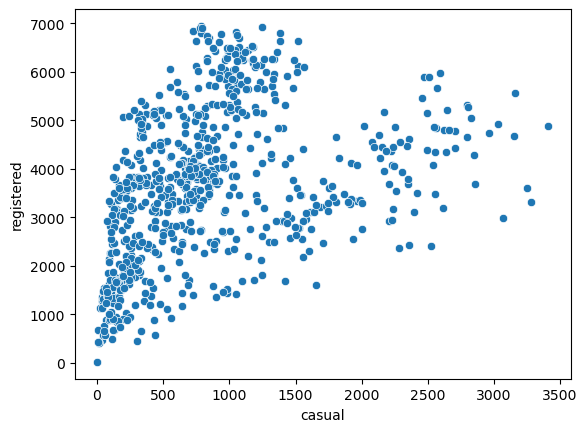

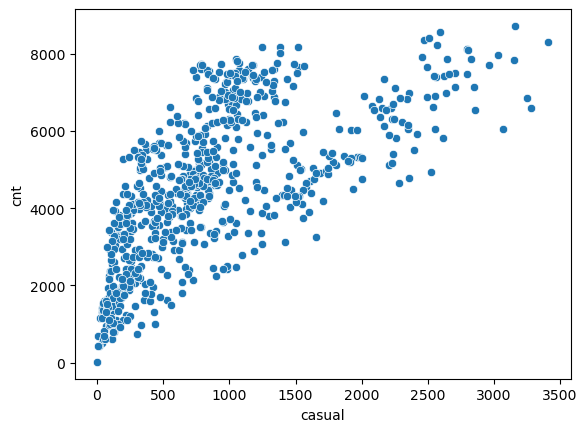

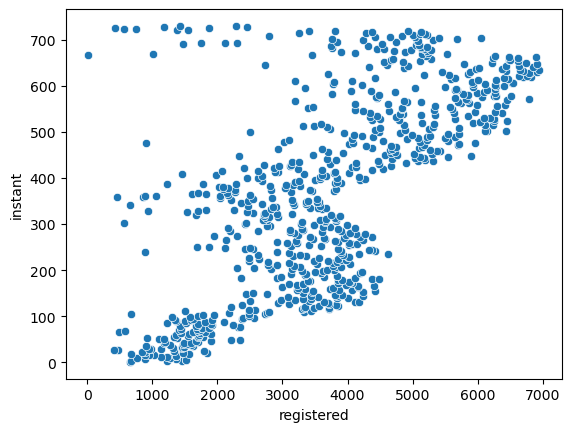

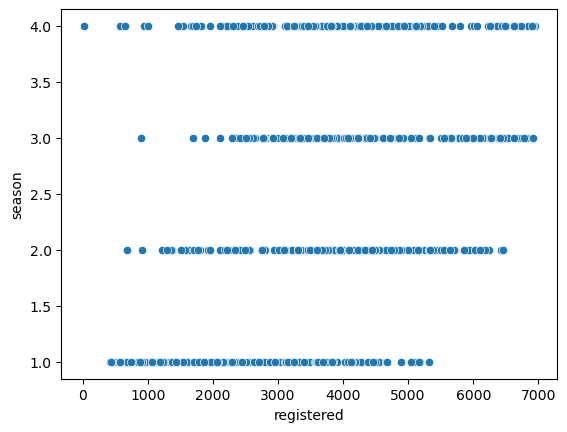

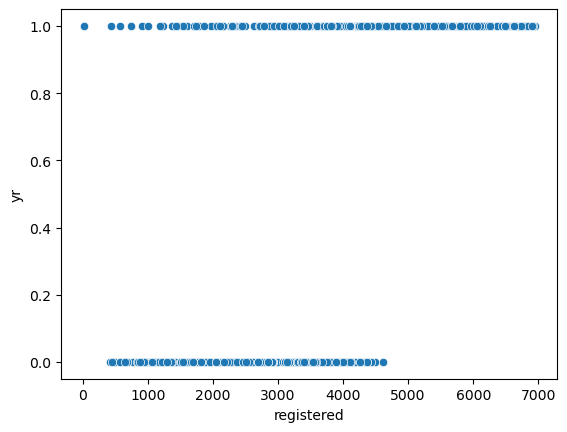

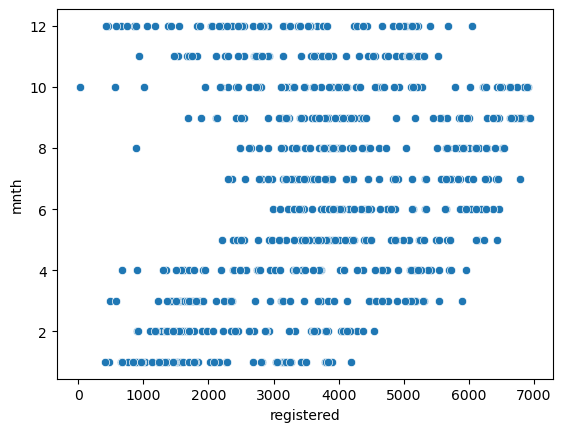

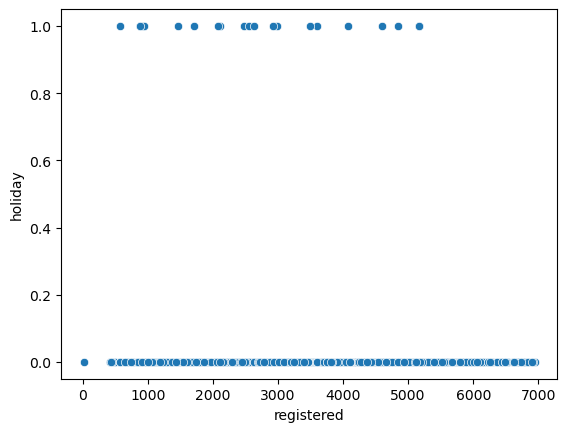

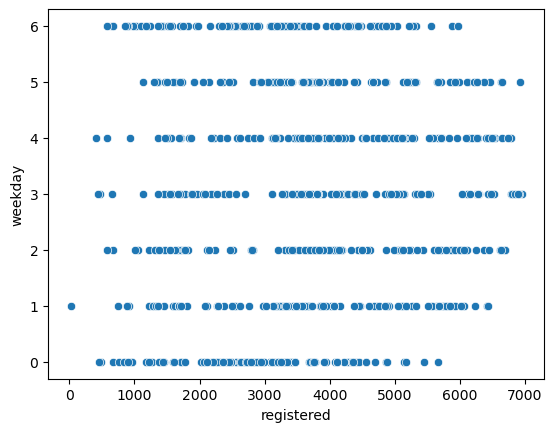

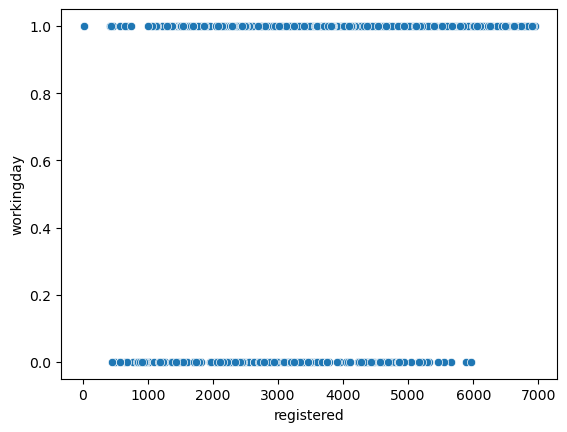

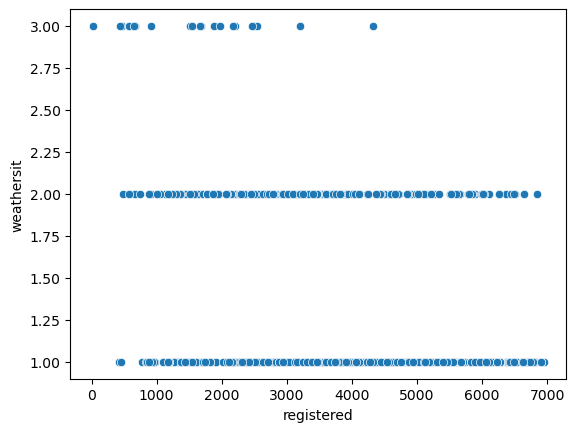

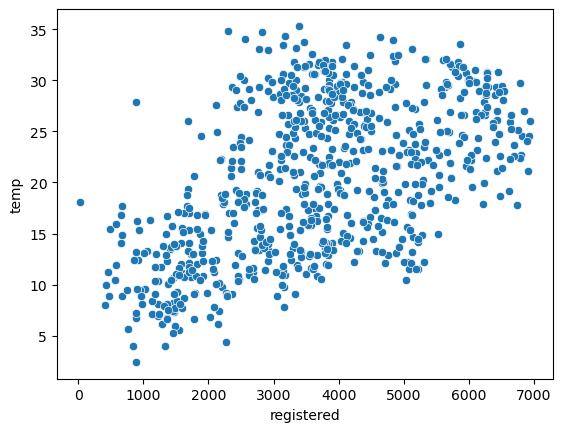

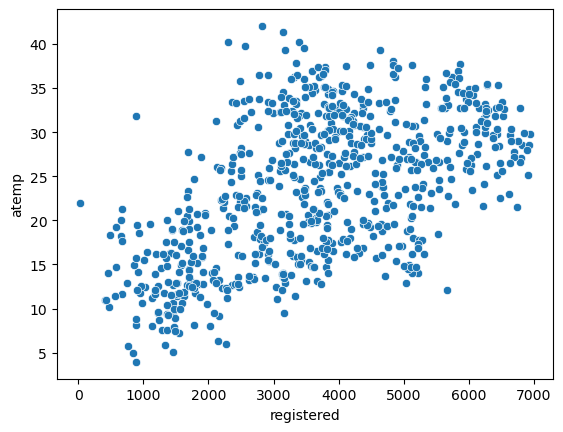

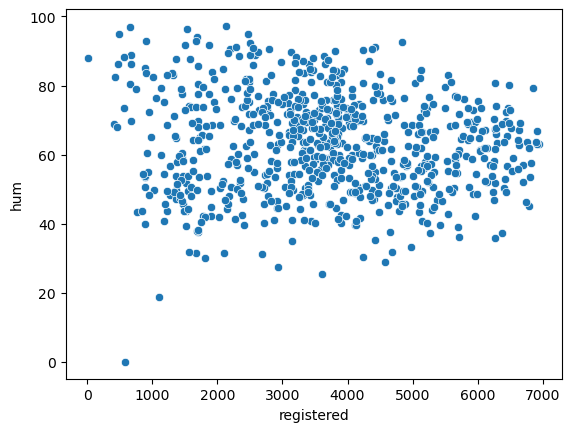

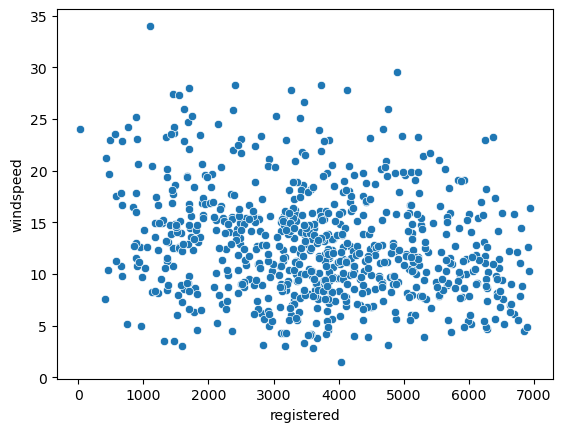

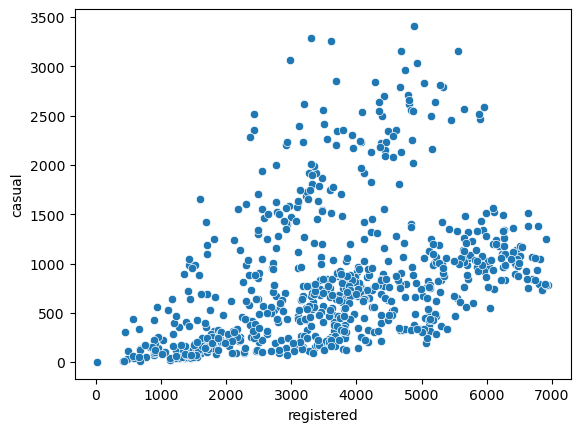

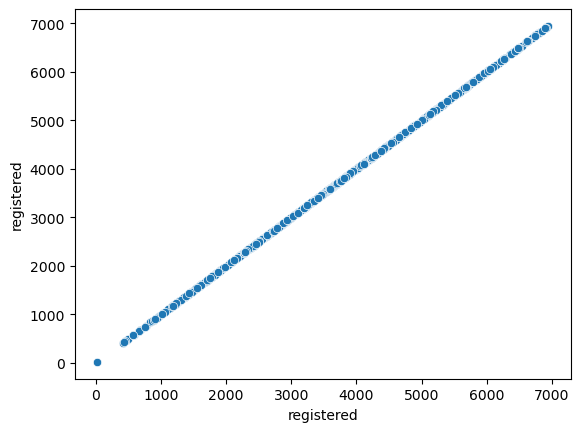

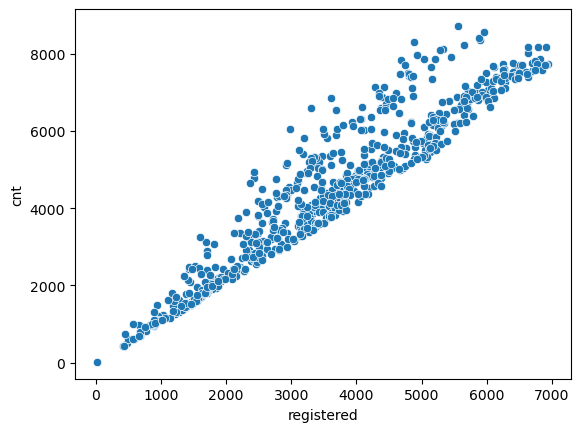

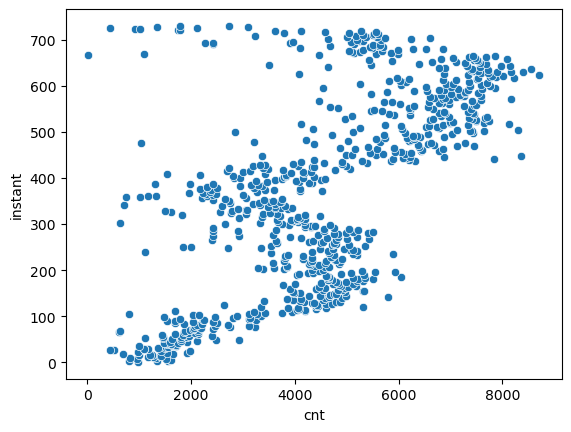

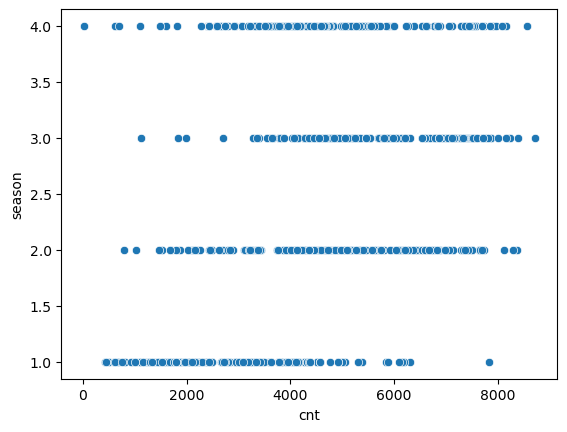

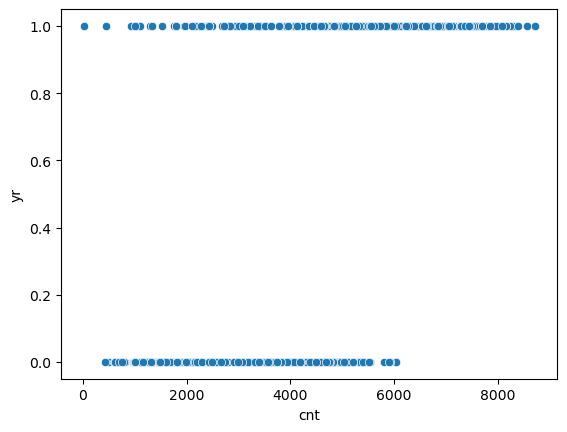

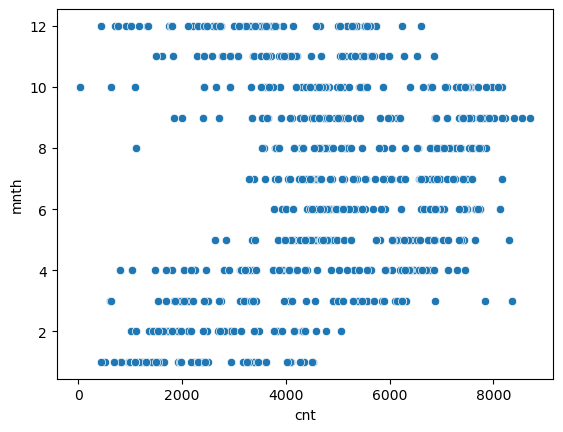

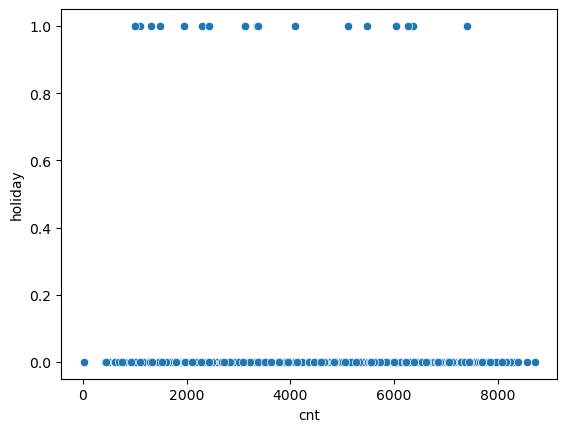

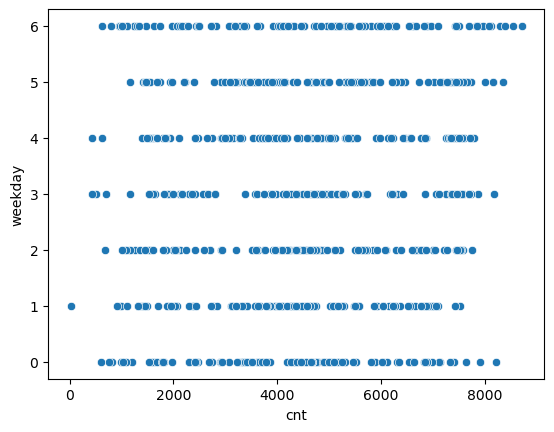

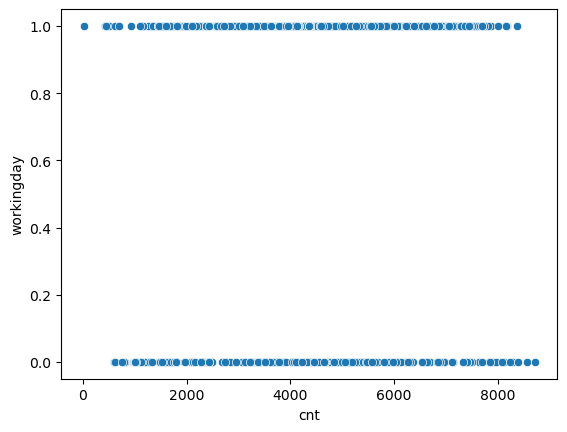

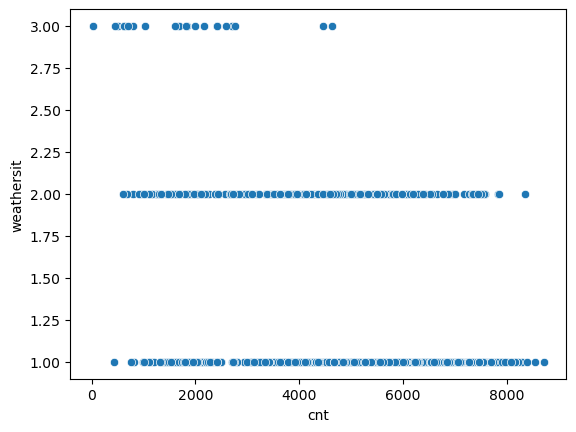

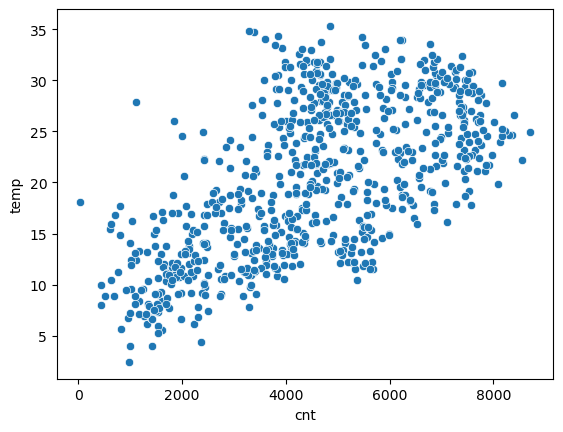

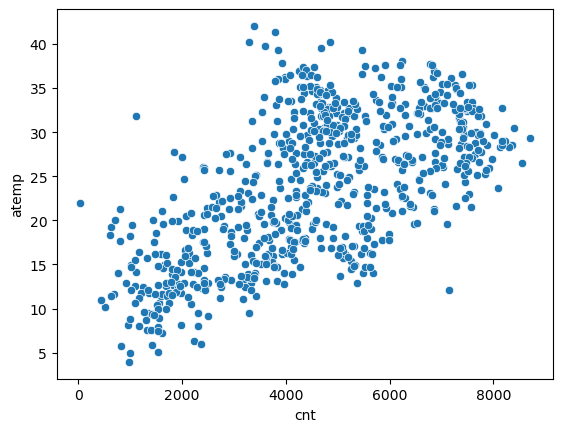

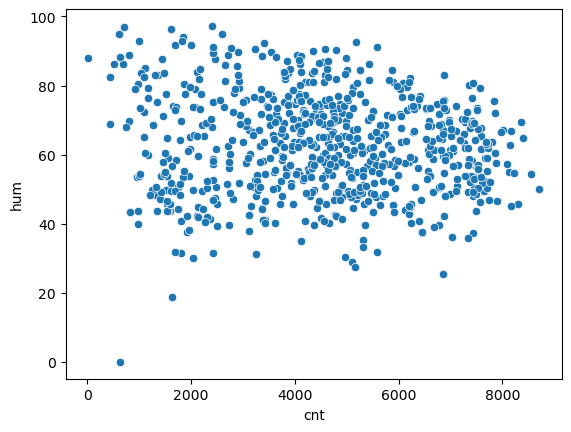

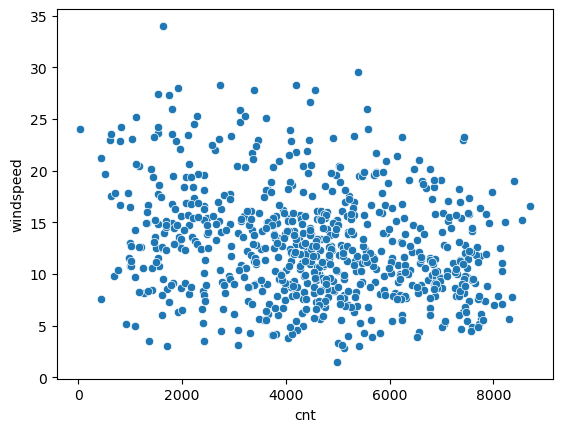

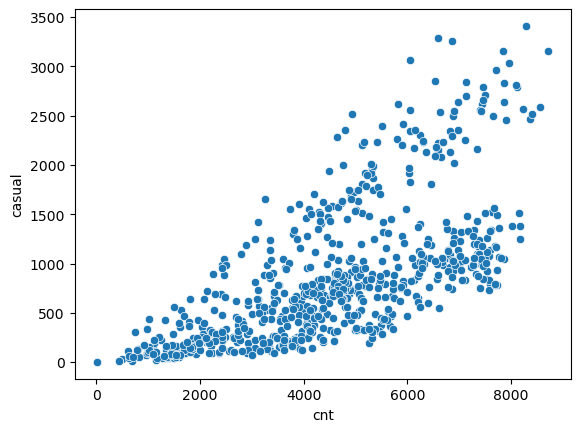

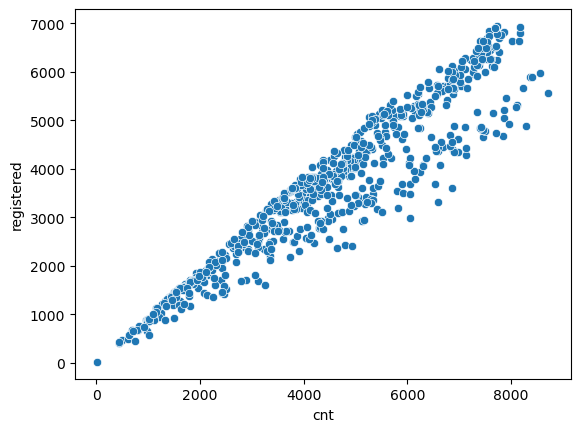

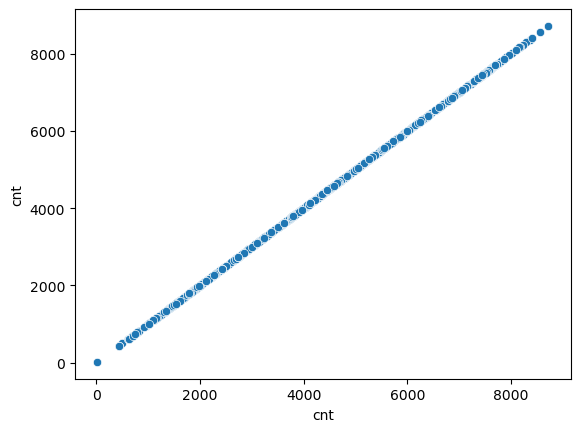

In [1015]:
for i in num_cols:
    for j in num_cols:
        sns.scatterplot(x = i,y = j,data = df,legend = 'full')
        plt.show()

In [1016]:
df['season'].value_counts(normalize = True)

season
3    0.257534
2    0.252055
1    0.246575
4    0.243836
Name: proportion, dtype: float64

In [1017]:
df['yr'].value_counts(normalize = True)

yr
0    0.5
1    0.5
Name: proportion, dtype: float64

In [1018]:
df['holiday'].value_counts(normalize = True)

holiday
0    0.971233
1    0.028767
Name: proportion, dtype: float64

In [1019]:
df['weathersit'].value_counts(normalize = True)

weathersit
1    0.634247
2    0.336986
3    0.028767
Name: proportion, dtype: float64

In [1020]:
df['weekday'].value_counts(normalize = True)

weekday
6    0.143836
0    0.143836
1    0.143836
2    0.142466
4    0.142466
5    0.142466
3    0.141096
Name: proportion, dtype: float64

In [1021]:
for i in df.columns:
    print(df[i].value_counts(normalize = True))

instant
1      0.00137
480    0.00137
482    0.00137
483    0.00137
484    0.00137
        ...   
246    0.00137
247    0.00137
248    0.00137
249    0.00137
730    0.00137
Name: proportion, Length: 730, dtype: float64
dteday
01-01-2018    0.00137
25-04-2019    0.00137
27-04-2019    0.00137
28-04-2019    0.00137
29-04-2019    0.00137
               ...   
03-09-2018    0.00137
04-09-2018    0.00137
05-09-2018    0.00137
06-09-2018    0.00137
31-12-2019    0.00137
Name: proportion, Length: 730, dtype: float64
season
3    0.257534
2    0.252055
1    0.246575
4    0.243836
Name: proportion, dtype: float64
yr
0    0.5
1    0.5
Name: proportion, dtype: float64
mnth
1     0.084932
3     0.084932
5     0.084932
7     0.084932
8     0.084932
10    0.084932
12    0.084932
4     0.082192
6     0.082192
9     0.082192
11    0.082192
2     0.076712
Name: proportion, dtype: float64
holiday
0    0.971233
1    0.028767
Name: proportion, dtype: float64
weekday
6    0.143836
0    0.143836
1    0.143836

In [1022]:
encoding = ['weathersit','season','mnth','weekday']

In [1023]:
df_new = pd.get_dummies(df, columns=encoding,drop_first=True)

In [1024]:
df_new.shape

(730, 34)

In [1025]:
## droppping some variable as there is no relevance of these variable in modelling
df_new.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)

In [1026]:
df_new.shape

(730, 30)

In [1027]:
## checking for duplicates
dups = df_new.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [1028]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   weathersit_2  730 non-null    bool   
 9   weathersit_3  730 non-null    bool   
 10  season_2      730 non-null    bool   
 11  season_3      730 non-null    bool   
 12  season_4      730 non-null    bool   
 13  mnth_2        730 non-null    bool   
 14  mnth_3        730 non-null    bool   
 15  mnth_4        730 non-null    bool   
 16  mnth_5        730 non-null    bool   
 17  mnth_6        730 non-null    bool   
 18  mnth_7        730 non-null    

### As scales were different for each feature

In [1029]:
from sklearn.preprocessing import MinMaxScaler


In [1030]:
scaler = MinMaxScaler()

In [1031]:
df_new[df_new.columns] = scaler.fit_transform(df_new[df_new.columns])

In [1032]:
df_new

yr  holiday  workingday      temp     atemp       hum  windspeed  \
0    0.0      0.0         0.0  0.355170  0.373517  0.828620   0.284606   
1    0.0      0.0         0.0  0.379232  0.360541  0.715771   0.466215   
2    0.0      0.0         1.0  0.171000  0.144830  0.449638   0.465740   
3    0.0      0.0         1.0  0.175530  0.174649  0.607131   0.284297   
4    0.0      0.0         1.0  0.209120  0.197158  0.449313   0.339143   
..   ...      ...         ...       ...       ...       ...        ...   
725  1.0      0.0         1.0  0.243025  0.193709  0.671380   0.675656   
726  1.0      0.0         1.0  0.241986  0.230993  0.606684   0.274350   
727  1.0      0.0         0.0  0.241986  0.214393  0.774208   0.210260   
728  1.0      0.0         0.0  0.245101  0.200348  0.497001   0.676936   
729  1.0      0.0         1.0  0.195259  0.189567  0.593830   0.273062   

          cnt  weathersit_2  weathersit_3  ...  mnth_9  mnth_10  mnth_11  \
0    0.110792           1.0           0.0  ...     0.0      0.0      0.0   
1    0.089623           1.0           0.0  ...     0.0      0.0      0.0   
2    0.152669           0.0           0.0  ...     0.0      0.0      0.0   
3    0.177174           0.0           0.0  ...     0.0      0.0      0.0   
4    0.181546           0.0           0.0  ...     0.0      0.0      0.0   
..        ...           ...           ...  ...     ...      ...      ...   
725  0.240681           1.0           0.0  ...     0.0      0.0      0.0   
726  0.353543           1.0           0.0  ...     0.0      0.0      0.0   
727  0.151749           1.0           0.0  ...     0.0      0.0      0.0   
728  0.204096           0.0           0.0  ...     0.0      0.0      0.0   
729  0.311436           1.0           0.0  ...     0.0      0.0      0.0   

     mnth_12  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  
0        0.0        0.0        0.0        0.0        0.0        0.0        1.0  
1        0.0        0.0        0.0        0.0        0.0        0.0        0.0  
2        0.0        1.0        0.0        0.0        0.0        0.0        0.0  
3        0.0        0.0        1.0        0.0        0.0        0.0        0.0  
4        0.0        0.0        0.0        1.0        0.0        0.0        0.0  
..       ...        ...        ...        ...        ...        ...        ...  
725      1.0        0.0        0.0        0.0        1.0        0.0        0.0  
726      1.0        0.0        0.0        0.0        0.0        1.0        0.0  
727      1.0        0.0        0.0        0.0        0.0        0.0        1.0  
728      1.0        0.0        0.0        0.0        0.0        0.0        0.0  
729      1.0        1.0        0.0        0.0        0.0        0.0        0.0  

[730 rows x 30 columns]

In [1033]:
X = df_new.drop('cnt', axis=1)

# Copy target into the y dataframe. 
y = df_new[['cnt']]

In [1034]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [1035]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [1036]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for yr is 0.23412700164192746
The coefficient for holiday is -5100119963468.457
The coefficient for workingday is -5100119963468.408
The coefficient for temp is 0.31305743476796033
The coefficient for atemp is 0.15825500563630596
The coefficient for hum is -0.19449783576529034
The coefficient for windspeed is -0.1733413875256853
The coefficient for weathersit_2 is -0.031620238996819816
The coefficient for weathersit_3 is -0.21458177535523162
The coefficient for season_2 is 0.1251801736585427
The coefficient for season_3 is 0.11922895947126988
The coefficient for season_4 is 0.17188730917523468
The coefficient for mnth_2 is 0.027764561630985105
The coefficient for mnth_3 is 0.04542710405455653
The coefficient for mnth_4 is 0.026412232112888543
The coefficient for mnth_5 is 0.03076636858735548
The coefficient for mnth_6 is 0.023634165055271498
The coefficient for mnth_7 is -0.05202391046933474
The coefficient for mnth_8 is 0.0012565608565229794
The coefficient for mnth_9 

In [1037]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.19758272594690862


In [1038]:
# R square on training data
regression_model.score(X_train, y_train)

0.8353607366220704

In [1039]:
# R square on testing data
regression_model.score(X_test, y_test)

0.8653137835643914

In [1040]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.08847336164409499

In [1041]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.08561326085893686

In [1042]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
628  1.0      0.0         1.0  0.672912  0.647000  0.687661   0.271790   
147  0.0      0.0         0.0  0.743521  0.700041  0.750214   0.428185   
429  1.0      0.0         1.0  0.248216  0.230988  0.469580   0.367953   
262  0.0      0.0         1.0  0.626185  0.594817  0.906170   0.232053   
546  1.0      0.0         0.0  0.942889  0.881512  0.533419   0.301270   

     weathersit_2  weathersit_3  season_2  ...  mnth_10  mnth_11  mnth_12  \
628           0.0           0.0       0.0  ...      0.0      0.0      0.0   
147           0.0           0.0       1.0  ...      0.0      0.0      0.0   
429           0.0           0.0       0.0  ...      0.0      0.0      0.0   
262           1.0           0.0       0.0  ...      0.0      0.0      0.0   
546           0.0           0.0       0.0  ...      0.0      0.0      0.0   

     weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  \
628        0.0        0.0        0.0        0.0        1.0        0.0   
147        0.0        0.0        0.0        0.0        0.0        1.0   
429        0.0        1.0        0.0        0.0        0.0        0.0   
262        0.0        1.0        0.0        0.0        0.0        0.0   
546        0.0        0.0        0.0        0.0        0.0        0.0   

          cnt  
628  0.937069  
147  0.544869  
429  0.452600  
262  0.416360  
546  0.633801  

[5 rows x 30 columns]

In [1043]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1044]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1045]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 6),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weathersit_2', False, 14),
 ('weathersit_3', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 15),
 ('mnth_3', False, 3),
 ('mnth_4', False, 16),
 ('mnth_5', False, 13),
 ('mnth_6', False, 17),
 ('mnth_7', False, 12),
 ('mnth_8', False, 19),
 ('mnth_9', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 20),
 ('mnth_12', False, 18),
 ('weekday_1', False, 7),
 ('weekday_2', False, 8),
 ('weekday_3', False, 10),
 ('weekday_4', False, 9),
 ('weekday_5', False, 11),
 ('weekday_6', False, 4)]

In [1046]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'weathersit_3', 'season_2',
       'season_3', 'season_4', 'mnth_9'],
      dtype='object')

In [1047]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'weathersit_2', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

In [1048]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)
X_train_lm.drop('holiday',axis = 1,inplace = True)
X_train_lm.drop('atemp',axis = 1,inplace = True)
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [1049]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     100.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.78e-186
Time:                        23:27:09   Log-Likelihood:                 556.59
No. Observations:                 547   AIC:                            -1057.
Df Residuals:                     519   BIC:                            -936.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2112      0.032      6.653   

In [1050]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [1051]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0          const  68.34
9       season_3  12.02
16        mnth_7  10.11
17        mnth_8   9.14
10      season_4   8.77
8       season_2   8.70
2     workingday   8.67
15        mnth_6   7.83
14        mnth_5   7.70
18        mnth_9   7.22
3           temp   7.10
24     weekday_3   6.45
23     weekday_2   6.41
13        mnth_4   6.30
26     weekday_5   6.25
25     weekday_4   6.18
20       mnth_11   6.02
19       mnth_10   5.92
22     weekday_1   5.38
21       mnth_12   3.24
12        mnth_3   2.58
4            hum   2.35
11        mnth_2   1.85
6   weathersit_2   1.74
27     weekday_6   1.58
7   weathersit_3   1.47
5      windspeed   1.29
1             yr   1.07

In [1052]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [1053]:
X_train.drop('holiday',axis = 1,inplace = True)
X_train.drop('atemp',axis = 1,inplace = True)

In [1054]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [1055]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for yr is 0.2338839146469617
The coefficient for workingday is 0.06707468436996213
The coefficient for temp is 0.4368261929225575
The coefficient for hum is -0.19701351312637716
The coefficient for windspeed is -0.19295974132226032
The coefficient for weathersit_2 is -0.03389271885190862
The coefficient for weathersit_3 is -0.22057375962699058
The coefficient for season_2 is 0.10706896358370156
The coefficient for season_3 is 0.09099825800571704
The coefficient for season_4 is 0.15616124081706034
The coefficient for mnth_2 is 0.022250453173405314
The coefficient for mnth_3 is 0.08228191687901684
The coefficient for mnth_4 is 0.039276427332762306
The coefficient for mnth_5 is 0.07201756002836841
The coefficient for mnth_6 is 0.03941276973880355
The coefficient for mnth_7 is -0.0018087993611145437
The coefficient for mnth_8 is 0.033573235990391734
The coefficient for mnth_9 is 0.11722854291466707
The coefficient for mnth_10 is 0.07352084903618505
The coefficient for mnth_

In [1056]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.21117302921944126


In [1057]:
# R square on training data
regression_model.score(X_train, y_train)

0.8390795875324693

In [1058]:
X_test.drop('holiday',axis = 1,inplace = True)
X_test.drop('atemp',axis = 1,inplace = True)

In [1059]:
# R square on testing data
regression_model.score(X_test, y_test)

0.8546804712211413

In [1060]:
for i,j in np.array(lr.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.21) * const + (0.23) * yr + (0.07) * workingday + (0.44) * temp + (-0.2) * hum + (-0.19) * windspeed + (-0.03) * weathersit_2 + (-0.22) * weathersit_3 + (0.11) * season_2 + (0.09) * season_3 + (0.16) * season_4 + (0.02) * mnth_2 + (0.08) * mnth_3 + (0.04) * mnth_4 + (0.07) * mnth_5 + (0.04) * mnth_6 + (-0.0) * mnth_7 + (0.03) * mnth_8 + (0.12) * mnth_9 + (0.07) * mnth_10 + (0.01) * mnth_11 + (0.0) * mnth_12 + (-0.04) * weekday_1 + (-0.04) * weekday_2 + (-0.02) * weekday_3 + (-0.02) * weekday_4 + (-0.02) * weekday_5 + (0.07) * weekday_6 + 

In [1061]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [1062]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)
X_train_lm.drop('holiday',axis = 1,inplace = True)
X_train_lm.drop('atemp',axis = 1,inplace = True)
X_train_lm.drop(['mnth_2','mnth_3','mnth_4','mnth_5','mnth_6','mnth_7','mnth_8','mnth_9','mnth_10','mnth_11','mnth_12'],axis = 1,inplace = True)
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [1063]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     145.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          6.70e-182
Time:                        23:27:10   Log-Likelihood:                 517.64
No. Observations:                 547   AIC:                            -1001.
Df Residuals:                     530   BIC:                            -928.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1890      0.032      5.943   

In [1064]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [1065]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0          const  60.76
2     workingday   8.47
13     weekday_3   6.30
12     weekday_2   6.25
15     weekday_5   6.07
14     weekday_4   6.01
11     weekday_1   5.24
9       season_3   4.92
3           temp   3.48
8       season_2   2.83
4            hum   2.15
10      season_4   1.96
6   weathersit_2   1.69
16     weekday_6   1.58
7   weathersit_3   1.44
5      windspeed   1.23
1             yr   1.05

In [1066]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [1067]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)
X_train_lm.drop('holiday',axis = 1,inplace = True)
X_train_lm.drop('atemp',axis = 1,inplace = True)
X_train_lm.drop(['season_2','season_3','season_4'],axis = 1,inplace = True)
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [1068]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     102.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.99e-180
Time:                        23:27:11   Log-Likelihood:                 534.40
No. Observations:                 547   AIC:                            -1019.
Df Residuals:                     522   BIC:                            -911.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2098      0.033      6.368   

In [1069]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [1070]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0          const  68.28
2     workingday   8.63
3           temp   6.90
21     weekday_3   6.42
20     weekday_2   6.38
13        mnth_7   6.34
23     weekday_5   6.21
22     weekday_4   6.14
14        mnth_8   5.39
19     weekday_1   5.35
12        mnth_6   5.02
15        mnth_9   4.09
11        mnth_5   4.00
10        mnth_4   2.75
16       mnth_10   2.74
4            hum   2.34
17       mnth_11   2.23
9         mnth_3   2.13
18       mnth_12   1.88
8         mnth_2   1.85
6   weathersit_2   1.73
24     weekday_6   1.58
7   weathersit_3   1.46
5      windspeed   1.28
1             yr   1.07

In [1071]:
X_train.drop('holiday',axis = 1,inplace = True)
X_train.drop('atemp',axis = 1,inplace = True)
X_train.drop(['season_2','season_3','season_4'],axis = 1,inplace = True)


In [1072]:
X_test.drop('holiday',axis = 1,inplace = True)
X_test.drop('atemp',axis = 1,inplace = True)
X_test.drop(['season_2','season_3','season_4'],axis = 1,inplace = True)

In [1073]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [1074]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for yr is 0.23479785089607255
The coefficient for workingday is 0.07678622474054264
The coefficient for temp is 0.4504651723138208
The coefficient for hum is -0.19340141087422083
The coefficient for windspeed is -0.20771577530551896
The coefficient for weathersit_2 is -0.03291816856344351
The coefficient for weathersit_3 is -0.2210727570211202
The coefficient for mnth_2 is 0.021844396980308968
The coefficient for mnth_3 is 0.12108827158554915
The coefficient for mnth_4 is 0.1434174042663172
The coefficient for mnth_5 is 0.17164853513698153
The coefficient for mnth_6 is 0.13289712924687325
The coefficient for mnth_7 is 0.07941333240130921
The coefficient for mnth_8 is 0.11555875200526182
The coefficient for mnth_9 is 0.21677919633534978
The coefficient for mnth_10 is 0.2242868060528639
The coefficient for mnth_11 is 0.1602742191513846
The coefficient for mnth_12 is 0.10485755607655887
The coefficient for weekday_1 is -0.04580802570111397
The coefficient for weekday_2 is 

In [1075]:
# R square on training data
regression_model.score(X_train, y_train)

0.8254800203022677

In [1076]:
# R square on testing data
regression_model.score(X_test, y_test)

0.8219089530905196

In [1077]:
for i,j in np.array(lr.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.21) * const + (0.23) * yr + (0.08) * workingday + (0.45) * temp + (-0.19) * hum + (-0.21) * windspeed + (-0.03) * weathersit_2 + (-0.22) * weathersit_3 + (0.02) * mnth_2 + (0.12) * mnth_3 + (0.14) * mnth_4 + (0.17) * mnth_5 + (0.13) * mnth_6 + (0.08) * mnth_7 + (0.12) * mnth_8 + (0.22) * mnth_9 + (0.22) * mnth_10 + (0.16) * mnth_11 + (0.1) * mnth_12 + (-0.05) * weekday_1 + (-0.04) * weekday_2 + (-0.03) * weekday_3 + (-0.03) * weekday_4 + (-0.03) * weekday_5 + (0.07) * weekday_6 + 

### Final Model features and Performance metrics

## training r square - 0.825
## testing r square - 0.822
## Final Equation - (0.21) * const + (0.23) * yr + (0.08) * workingday + (0.45) * temp + (-0.19) * hum + (-0.21) * windspeed + (-0.03) * weathersit_2 + (-0.22) * weathersit_3 + (0.02) * mnth_2 + (0.12) * mnth_3 + (0.14) * mnth_4 + (0.17) * mnth_5 + (0.13) * mnth_6 + (0.08) * mnth_7 + (0.12) * mnth_8 + (0.22) * mnth_9 + (0.22) * mnth_10 + (0.16) * mnth_11 + (0.1) * mnth_12 + (-0.05) * weekday_1 + (-0.04) * weekday_2 + (-0.03) * weekday_3 + (-0.03) * weekday_4 + (-0.03) * weekday_5 + (0.07) * weekday_6
## final list of variables

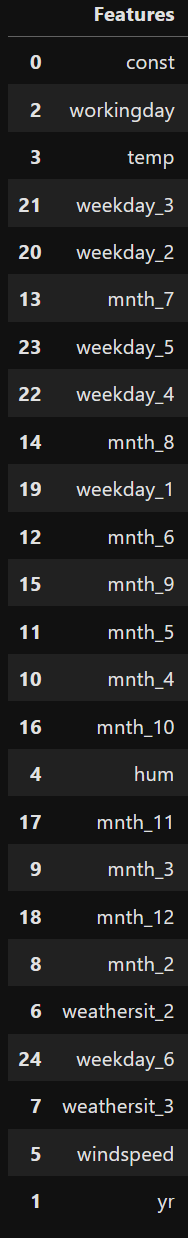

In [1078]:
y_train_predicted = pd.DataFrame(lr.predict(X_train_lm))

In [1079]:
y_train

cnt
628  0.937069
147  0.544869
429  0.452600
262  0.416360
546  0.633801
..        ...
645  0.627704
715  0.524965
72   0.232858
235  0.587667
37   0.194432

[547 rows x 1 columns]

In [1080]:
y_train_predicted.columns = ['cnt']

In [1081]:
import matplotlib.pyplot as plt
import seaborn as sns
a = y_train - y_train_predicted
a

cnt
628  0.118418
147 -0.006445
429 -0.091453
262 -0.069722
546 -0.149199
..        ...
645  0.068327
715  0.002748
72  -0.130481
235  0.090544
37  -0.030793

[547 rows x 1 columns]

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

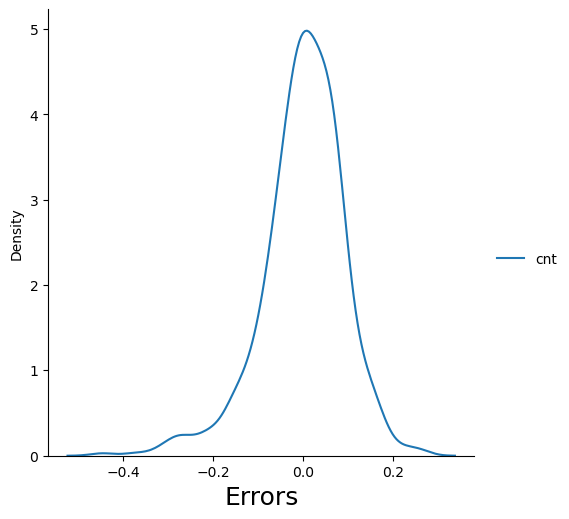

In [1082]:
fig = plt.figure()
sns.displot((y_train - y_train_predicted),kind = 'kde')
fig.suptitle('Error Terms', fontsize=20)  # Plot heading
plt.xlabel('Errors', fontsize=18)
